In [ ]:
from google.colab import files
import os
import shutil

import pandas as pd
import numpy as np
import datetime

from IPython.display import display
#import matplotlib.pyplot as plt
#import seaborn as sns

!pip install matplotlib
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
!pip install japanize_matplotlib
import japanize_matplotlib

from matplotlib.backends.backend_pdf import PdfPages
from scipy.stats import linregress
import seaborn as sns

!pip install scikit-learn
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm

from google.colab import drive
drive.mount('/content/drive')

import re
import math

import statsmodels.api as sm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
input_path = "/content/drive/MyDrive/椿本スプロケット/Data/"
df_pulleyA=pd.read_csv(input_path +"回帰分析テーブル_プーリ_201910-202209.csv",encoding="cp932")
df_pulleyB_teeth=pd.read_csv(input_path +"teeth+.csv",encoding="cp932")
df_pulleyB_typeD=pd.read_csv(input_path +"typeD.csv",encoding="cp932")

In [ ]:
df_groupB_1_1=pd.read_csv(input_path +"大形コンベヤスプロケット_アンローダー.csv",encoding="cp932")
df_groupB_1_2=pd.read_csv(input_path +"大形コンベヤスプロケット_エンジニアリング.csv",encoding="cp932")
df_groupB_1_3=pd.read_csv(input_path +"大形コンベヤスプロケット_シャフト組込み.csv",encoding="cp932")
df_groupB_1_4=pd.read_csv(input_path +"大形コンベヤスプロケット_リング替歯.csv",encoding="cp932")
df_groupB_1_5=pd.read_csv(input_path +"大形コンベヤスプロケット_水処理.csv",encoding="cp932")
df_groupB_1_6=pd.read_csv(input_path +"大形コンベヤスプロケット_替歯ブロック.csv",encoding="cp932")
df_groupB_1_7=pd.read_csv(input_path +"大形コンベヤスプロケット_分割.csv",encoding="cp932")
df_groupB_2_1=pd.read_csv(input_path +"ドライブスプロケットB_75歯以上.csv",encoding="cp932")
df_groupB_2_2=pd.read_csv(input_path +"ドライブスプロケットB_歯部サイズ違い.csv",encoding="cp932")
df_groupB_2_3=pd.read_csv(input_path +"ドライブスプロケットB_分割.csv",encoding="cp932")
df_groupB_A=pd.read_csv(input_path +"大形コンベヤスプロケット特型コンベヤ（Aグループ）.csv",encoding="cp932")
df_groupB_A_new=pd.read_csv(input_path +"特型コンベア_new.csv",encoding="cp932")

<ipython-input-5-9b4e6adea648>:11: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_groupB_A=pd.read_csv(input_path +"大形コンベヤスプロケット特型コンベヤ（Aグループ）.csv",encoding="cp932")


In [ ]:
len(df_groupB_1_3)

232

In [ ]:
len(df_groupB_1_7)

122

In [ ]:
df_groupB_1_1["type"]="大形コンベヤスプロケット_アンローダー"
df_groupB_1_2["type"]="大形コンベヤスプロケット_エンジニアリング"
df_groupB_1_3["type"]="大形コンベヤスプロケット_シャフト組込み"
df_groupB_1_4["type"]="大形コンベヤスプロケット_リング替歯"
df_groupB_1_5["type"]="大形コンベヤスプロケット_水処理"
df_groupB_1_6["type"]="大形コンベヤスプロケット_替歯ブロック"
df_groupB_1_7["type"]="大形コンベヤスプロケット_分割"
df_groupB_2_1["type"]="ドライブスプロケットB_75歯以上"
df_groupB_2_2["type"]="ドライブスプロケットB_歯部サイズ違い"
df_groupB_2_3["type"]="ドライブスプロケットB_分割"
dataframes_list_B1=[df_groupB_1_1,df_groupB_1_2,df_groupB_1_3,df_groupB_1_4,df_groupB_1_5,df_groupB_1_6,df_groupB_1_7]
dataframes_list_B2=[df_groupB_2_1,df_groupB_2_2,df_groupB_2_3]

In [ ]:
df_pulleyA['売上月'] = pd.to_datetime(df_pulleyA['売上月'], format="%Y年%m月")
df_pulleyB_teeth["売上月"] = pd.to_datetime(df_pulleyB_teeth['売上月'], format="%Y/%m/%d")
df_pulleyB_typeD["売上月"] = pd.to_datetime(df_pulleyB_typeD['売上月'], format="%Y/%m/%d")

# **メモ**

In [ ]:
#todo:
#プーリーA
  #のAQ、Q分けを見る⇒それぞれの回帰式
  #先方は半年間ごとで見直しを行っている。半年ずつの回帰式を出す必要ある？⇒そもそもなんで見直しをしているのか？見直しの差がどのぐらいある？そのため意味ある？
  #重回帰の重みを調整するべき？
  #もとの分類を分類してみるべき？
#プーリーB
  #グループの売上/質量分布

#done
#  #歯数などの抽出および相関⇒回帰式代入？⇒かなり重要そう

#相談内容：
#①先方から新しいデータおよび情報の共有
  #外れ値扱い手法の確認
  #その他情報
#新しいアプローチ：歯数、歯のサイズ、AQ、Q
#気になるところ
  #グループ分け方：先方の経験ベースで分けられて、また整理もしたことがあり、信用できるか？
  #TSP金額/質量とTSP金額と質量の相関係数値?
#今後の進め方について
  #グループ分けかつAQ、Q分けで見るべきですよね？
  #Bグループのまとめ処理、Bグループ
  #落とし所どうすべき？そもそも見積の標準化からするべきではない？逆になってない？

In [ ]:
#電話で確認すべき事項：
  #見積もり番号空欄排除されたかと思って、空欄は何？
    #見積もっていない⇒正しい値段とは限らわない
    #AQとQ両方
  #TSP金額と回帰式で予測した見積もり額の差を正規分布？その中差が3σ以外のものを捨てる？
    #⇒その前の回帰式を計算する際に外れ値の処理はなかった？
    #回帰式　再計算
  #半年間で見直しの差はイメージ的には大きいですか？
    #大きく変わるものではなさそう？⇒4月～9月

  #Bグループ　プーリーの　Bはカタログ歯数以上のものとD型のものをBグループ？その他には変わりないでしょうか？
    #カタログ以上であれば高め？その他の影響があるか？　範囲以外のもの112/120　金額が上がる　工程あんまり変わらないというイメージ　軽量化、にくるき？量が大きくなる、にくぬき？
    #D型のデータは少なさすぎだけど、その他の製品に何か違いありますか？　⇒形状変わったもの
    #売上数は1以上であれば割引とかがある？TSP単価を使っていいのか？
    #
    #売上数は多くなるのか？　割引がある⇒見積の方が分かるかもしれない　5個ぐらいから変わっていくかも

  #以前代理店別や地域別は紐付けられそう？
  #TSP金額/質量の計算方法は正しいかどうか？

In [ ]:
#もし["工程"、"材質"］などの条件が同じであれば質量当たりの価格は同じではないか？
  #グループ分けがそもそも正しいかどうか？必要であるかどうか？
  #⇒向こうのグループ分け方で行くべきなのか？改めてアプローチしに行くのか？
    #⇒あっちは経験ベースでやってたので？こっちはデータの傾向性やってみる？（同条件をグループ分けし、傾向性近いものをまとめるという形でいいのかな？）
#⇒半期ごとで見ないといけないのかな？
#　⇒半期ごとのデータのバラツキを抑える方法があれば全体的に見てもいい？そもそも値上げだけじゃない？
#歯数と歯の大きさはパラメータとして追加できるかどうか？質量との相関性もある程度あるので、どう判断すればいいのか？

In [ ]:
#目的？⇒見積もり式をより正しく出す
  #外れ値の処理⇒（傾向性上、前回落としたところ）
  #グルーピング：改めてグループ分けし、より単回帰に適用させるようにする？
    #割引あり、なし分割？
    #データ傾向性上分割？
  #計算式：単回帰だけではなく、他の方法のアプローチ？

#売上/質量⇒何のためだったっけ？

# **function**

## grouping

In [ ]:
def grouping(df):
  #group1
  condition = (
      (df['品名'].str.contains('A-')) |
      (df['品名'].str.contains('AF-')) |
      (df['品名'].str.contains('AQ-')) |
      (df['品名'].str.contains('B-')) |
      (df['品名'].str.contains('BF-')) |
      (df['品名'].str.contains('BQ-')) |
      (df['品名'].str.contains('C-')) |
      (df['品名'].str.contains('CF-')) |
      (df['品名'].str.contains('CQ-'))
  ) & (
      (df['材質'].str.contains('S..C')) |
      (df['材質'].str.contains('SS'))
  ) & (
      (df['A'] == 0) &
      (df['A2'] == 0) &
      (df['A3'] == 0) &
      (df['AB'] == 0) &
      (df['AFT'] == 0) &
      (df['AFT2'] == 0) &
      (df['L'] == 1) &
      (df['DR'] == 0) &
      (df['MDR'] == 0) &
      (df['DT'] == 0) &
      (df['DT2'] == 0) &
      (df['MD'] == 0) &
      (df['MD2'] == 0) &
      (df['MDT'] == 0) &
      (df['LD'] == 0) &
      (df['KB'] == 0) &
      (df['KC'] == 0) &
      (df['L2'] == 0) &
      (df['L3'] == 0) &
      (df['LA'] == 0) &
      (df['DSR'] == 0)
  )

  df_group1=df[condition]
  print(len(df_group1))

  condition = (
      (df['品名'].str.contains('A-')) |
      (df['品名'].str.contains('AF-')) |
      (df['品名'].str.contains('AQ-')) |
      (df['品名'].str.contains('B-')) |
      (df['品名'].str.contains('BF-')) |
      (df['品名'].str.contains('BQ-')) |
      (df['品名'].str.contains('C-')) |
      (df['品名'].str.contains('CF-')) |
      (df['品名'].str.contains('CQ-'))
  ) & (
      (df['材質'].str.contains('S..C')) |
      (df['材質'].str.contains('SS'))
  ) & (
      (df['A'] == 0) &
      (df['A2'] == 0) &
      (df['A3'] == 0) &
      (df['AB'] == 0) &
      (df['AFT'] == 0) &
      (df['AFT2'] == 0) &
      ((df['L2'] == 1) | (df['L3'] == 1) | (df['LA'] == 1) | (df['KB'] == 1) | (df['KC'] == 1) | (df['DR'] == 1) |
      (df['MDR'] == 1) | (df['DT'] == 1) | (df['DT2'] == 1) | (df['MD'] == 1) | (df['MD2'] == 1) | (df['MDT'] == 1) |
      (df['LD'] == 1))
  )
  df_group2=df[condition]
  print(len(df_group2))

  condition = (
      (df['品名'].str.contains('A-')) |
      (df['品名'].str.contains('AF-')) |
      (df['品名'].str.contains('AQ-')) |
      (df['品名'].str.contains('B-')) |
      (df['品名'].str.contains('BF-')) |
      (df['品名'].str.contains('BQ-')) |
      (df['品名'].str.contains('C-')) |
      (df['品名'].str.contains('CF-')) |
      (df['品名'].str.contains('CQ-'))
  ) & (
      df['材質'].str.contains('SUS')
  ) & (
      (df['A'] == 0) &
      (df['A2'] == 0) &
      (df['A3'] == 0) &
      (df['AB'] == 0) &
      (df['AFT'] == 0) &
      (df['AFT2'] == 0) &
      (df['L'] == 1) &
      (df['DR'] == 0) &
      (df['MDR'] == 0) &
      (df['DT'] == 0) &
      (df['DT2'] == 0) &
      (df['MD'] == 0) &
      (df['MD2'] == 0) &
      (df['MDT'] == 0) &
      (df['LD'] == 0) &
      (df['KB'] == 0) &
      (df['KC'] == 0) &
      (df['L2'] == 0) &
      (df['L3'] == 0) &
      (df['LA'] == 0) &
      (df['DSR'] == 0)
  )
  df_group3=df[condition]
  print(len(df_group3))

  condition = (
      (df['品名'].str.contains('A-')) |
      (df['品名'].str.contains('AF-')) |
      (df['品名'].str.contains('AQ-')) |
      (df['品名'].str.contains('B-')) |
      (df['品名'].str.contains('BF-')) |
      (df['品名'].str.contains('BQ-')) |
      (df['品名'].str.contains('C-')) |
      (df['品名'].str.contains('CF-')) |
      (df['品名'].str.contains('CQ-'))
  ) & (
      df['材質'].str.contains('SUS')
  ) & (
      (df['A'] == 0) &
      (df['A2'] == 0) &
      (df['A3'] == 0) &
      (df['AB'] == 0) &
      (df['AFT'] == 0) &
      (df['AFT2'] == 0) &
      ((df['L2'] == 1) | (df['L3'] == 1) | (df['LA'] == 1) | (df['KB'] == 1) | (df['KC'] == 1) | (df['DR'] == 1) | (df['MDR'] == 1) |
      (df['DT'] == 1) | (df['DT2'] == 1) | (df['MD'] == 1) | (df['MD2'] == 1) | (df['MDT'] == 1) | (df['LD'] == 1))
  )
  df_group4=df[condition]
  print(len(df_group4))

  condition = (
      (df['品名'].str.contains('A-')) |
      (df['品名'].str.contains('AF-')) |
      (df['品名'].str.contains('AQ-')) |
      (df['品名'].str.contains('B-')) |
      (df['品名'].str.contains('BF-')) |
      (df['品名'].str.contains('BQ-')) |
      (df['品名'].str.contains('C-')) |
      (df['品名'].str.contains('CF-')) |
      (df['品名'].str.contains('CQ-'))
  ) & (
      df['材質'].str.contains('A')
  ) & (
      (df['A'] == 0) &
      (df['A2'] == 0) &
      (df['A3'] == 0) &
      (df['AB'] == 0) &
      (df['AFT'] == 0) &
      (df['AFT2'] == 0) &
      (df['L'] == 1) &
      (df['DR'] == 0) &
      (df['MDR'] == 0) &
      (df['DT'] == 0) &
      (df['DT2'] == 0) &
      (df['MD'] == 0) &
      (df['MD2'] == 0) &
      (df['MDT'] == 0) &
      (df['LD'] == 0) &
      (df['KB'] == 0) &
      (df['KC'] == 0) &
      (df['L2'] == 0) &
      (df['L3'] == 0) &
      (df['LA'] == 0) &
      (df['DSR'] == 0)
  )
  df_group5=df[condition]
  print(len(df_group5))

  condition = (
      (df['品名'].str.contains('A-')) |
      (df['品名'].str.contains('AF-')) |
      (df['品名'].str.contains('AQ-')) |
      (df['品名'].str.contains('B-')) |
      (df['品名'].str.contains('BF-')) |
      (df['品名'].str.contains('BQ-')) |
      (df['品名'].str.contains('C-')) |
      (df['品名'].str.contains('CF-')) |
      (df['品名'].str.contains('CQ-'))
  ) & (
      df['材質'].str.contains('A')
  ) & (
      (df['A'] == 0) &
      (df['A2'] == 0) &
      (df['A3'] == 0) &
      (df['AB'] == 0) &
      (df['AFT'] == 0) &
      (df['AFT2'] == 0) &
      ((df['L2'] == 1) | (df['L3'] == 1) | (df['LA'] == 1) | (df['KB'] == 1) | (df['KC'] == 1) | (df['DR'] == 1) | (df['MDR'] == 1) |
      (df['DT'] == 1) | (df['DT2'] == 1) | (df['MD'] == 1) | (df['MD2'] == 1) | (df['MDT'] == 1) | (df['LD'] == 1))
  )

  # 条件に合致する行を抽出
  df_group6 = df[condition]
  print(len(df_group6))

  dataframes_list=[df_group1,df_group2,df_group3,df_group4,df_group5,df_group6]
  return dataframes_list

In [ ]:
def regression_plot(df,title):
  #回帰モデルで切片計算
  y = df["TSP単価"]
  x = sm.add_constant(df["質量"])

  model = sm.OLS(y, x)
  results = model.fit()

  results.params[0]#切片b
  results.params[1]#係数a
  y_pred = results.predict(x)
  r2 = r2_score(y, y_pred)
  print(results.params[0],results.params[1],r2)
  print(results.pvalues["質量"],results.tvalues["質量"])#P-valueT-value

  plt.scatter(x["質量"], y, color='blue', label='Data')
  plt.plot(x, x * results.params[1] + results.params[0], color='red')

  plt.title(title)
  plt.xlabel('質量')
  plt.ylabel('TSP単価')
  plt.legend()

def regression_plot_double(df1,df2,title,data1,data2):
#回帰モデルで切片計算
  y = df1["TSP単価"]
  x = sm.add_constant(df1["質量"])

  model = sm.OLS(y, x)
  results = model.fit()

  results.params[0]#切片b
  results.params[1]#係数a
  y_pred = results.predict(x)
  r2 = r2_score(y, y_pred)
  print(results.params[0],results.params[1],r2)
  print(results.pvalues["質量"],results.tvalues["質量"])#P-valueT-value

  plt.scatter(x["質量"], y, color='blue', label=data1)
  plt.plot(x, x * results.params[1] + results.params[0], color='blue')

  y = df2["TSP単価"]
  x = sm.add_constant(df2["質量"])

  model = sm.OLS(y, x)
  results = model.fit()

  results.params[0]#切片b
  results.params[1]#係数a
  y_pred = results.predict(x)
  r2 = r2_score(y, y_pred)
  print(results.params[0],results.params[1],r2)
  print(results.pvalues["質量"],results.tvalues["質量"])#P-valueT-value

  plt.scatter(x["質量"], y, color='red', label=data2)
  plt.plot(x, x * results.params[1] + results.params[0], color='red')

  plt.title(title)
  plt.xlabel('質量')
  plt.ylabel('TSP単価')
  plt.legend()



## 歯数抽出

In [ ]:
def extract_strings(input_string):
    match = re.search(r'PT(.*?)P(.*?)M', input_string)
    if match:
        string1 = match.group(1)
        string2 = match.group(2)
        return string1, string2
    else:
        return None

def extract_teeth(df_pulley):
  for i in range(len(df_pulley)):
    result = extract_strings(df_pulley.loc[i,"品名"])
    df_pulley.loc[i,"歯数"]=result[0]#PM歯数
    df_pulley.loc[i,"歯大きさ"]=result[1]#M大きさ
    df_pulley["TSP金額/質量"]=df_pulley["TSP単価"]/df_pulley["質量"]

  df_pulley['歯数'] = df_pulley['歯数'].apply(lambda x: x.replace('U', ''))
  df_pulley["歯数"]=df_pulley["歯数"].astype(int)
  df_pulley["歯大きさ"]=df_pulley["歯大きさ"].astype(int)

extract_teeth(df_pulleyA)
extract_teeth(df_pulleyB_teeth)
extract_teeth(df_pulleyB_typeD)


In [ ]:
df_pulleyB=pd.concat([df_pulleyB_teeth,df_pulleyB_typeD]).reset_index(drop=True)

## preprocessing

In [ ]:
#前処理
def df_Preprocessing(df):
  df = df[
    (df["A"] == 0) & (df["A2"] == 0) & (df["A3"] == 0) &
    (df["AB"] == 0) & (df["AB2"] == 0) & (df["AB3"] == 0) &
    (df["AFT"] == 0) & (df["AFT2"] == 0) & (df["AL"] == 0) &
    (df["AR"] == 0) & (df["AR2"] == 0) & (df["BR"] == 0) &
    (df["DEC"] == 0) & (df["DEC2"] == 0) & (df["EWC"] == 0) &
    (df["F"] == 0) & (df["F2"] == 0) & (df["F3"] == 0) &
    (df["F4"] == 0) & (df["F5"] == 0) & (df["FA"] == 0) &
    (df["FBC"] == 0) & (df["FPC"] == 0) & (df["GE"] == 0) &
    (df["GI"] == 0) & (df["GS"] == 0) & (df["HAL"] == 0) &
    (df["HB"] == 0) & (df["HC"] == 0) & (df["HN"] == 0) &
    (df["HNT"] == 0) & (df["HQ2"] == 0) & (df["HQT"] == 0) &
    (df["HS"] == 0) & (df["HS2"] == 0) & (df["HSB"] == 0) &
    (df["HTR"] == 0) & (df["HTS"] == 0) & (df["HV"] == 0) &
    (df["HWA"] == 0) & (df["KS"] == 0) & (df["KW"] == 0) &
    (df["LK"] == 0) & (df["LKD"] == 0) & (df["LQ"] == 0) &
    (df["LR"] == 0) & (df["LT"] == 0) & (df["LTD"] == 0) &
    (df["MKDT"] == 0) & (df["NEP"] == 0) & (df["NEP2"] == 0) &
    (df["NEP3"] == 0) & (df["SCH"] == 0) & (df["SD"] == 0) &
    (df["SLE"] == 0) & (df["SLL"] == 0) & (df["SLL2"] == 0) &
    (df["SLT"] == 0) & (df["SLT2"] == 0) & (df["SOB"] == 0) &
    (df["SPK"] == 0) & (df["SPL"] == 0) & (df["SPM"] == 0) &
    (df["SRD"] == 0) & (df["STE"] == 0) & (df["SWC"] == 0) &
    (df["SWC2"] == 0) & (df["WM"] == 0) & (df["WT"] == 0) &
    ((df["MT"] == 1) | (df["T"] == 1) |(df["ST"]==1))]

  df=df[df["見積番号"].str.contains("Q")]
  df=df[df["品名"].str.contains("TK")]
  df=df.drop_duplicates(subset=['見積番号', '品名'], keep='first')

  # df=df[df["品名"].str.contains("P2M|P3M|P5M|P8M|P14M")]

  return df

# **相関係数DL**

In [ ]:
df_pulleyA.corr().reset_index(drop=False).to_csv('correlation_A.csv',encoding="cp932",index = False)
from google.colab import files
files.download('correlation_A.csv')

<ipython-input-15-72ca91de53ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_pulleyA.corr().reset_index(drop=False).to_csv('correlation_A.csv',encoding="cp932",index = False)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_pulleyA[["TSP単価","質量","歯数","歯大きさ","TSP金額/質量"]].corr()

,TSP単価,質量,歯数,歯大きさ,TSP金額/質量
TSP単価,1.000000,0.741525,0.521605,0.212325,-0.043468
質量,0.741525,1.000000,0.567011,0.466587,-0.137083
歯数,0.521605,0.567011,1.000000,-0.069897,-0.123430
歯大きさ,0.212325,0.466587,-0.069897,1.000000,-0.207091
TSP金額/質量,-0.043468,-0.137083,-0.123430,-0.207091,1.000000


In [ ]:
df_pulleyB_teeth.corr().reset_index(drop=False).to_csv('correlation_B_teeth.csv',encoding="cp932",index = False)
from google.colab import files
files.download('correlation_B_teeth.csv')

<ipython-input-17-013a7f1338f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_pulleyB_teeth.corr().reset_index(drop=False).to_csv('correlation_B_teeth.csv',encoding="cp932",index = False)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_pulleyB_teeth[["TSP単価","質量","歯数","歯大きさ","TSP金額/質量"]].corr()

,TSP単価,質量,歯数,歯大きさ,TSP金額/質量
TSP単価,1.000000,0.716031,0.337563,0.866887,-0.311374
質量,0.716031,1.000000,0.241941,0.858179,-0.579336
歯数,0.337563,0.241941,1.000000,0.446418,-0.686806
歯大きさ,0.866887,0.858179,0.446418,1.000000,-0.684410
TSP金額/質量,-0.311374,-0.579336,-0.686806,-0.684410,1.000000


In [ ]:
df_pulleyB_typeD.corr().reset_index(drop=False).to_csv('correlation_B_typeD.csv',encoding="cp932",index = False)
from google.colab import files
files.download('correlation_B_typeD.csv')

<ipython-input-19-24aae0eeb429>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_pulleyB_typeD.corr().reset_index(drop=False).to_csv('correlation_B_typeD.csv',encoding="cp932",index = False)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **AQ、Q分け**

Aグループ

In [ ]:
#Agroup処理　group分け
df_pulleyA_pre=df_Preprocessing(df_pulleyA)

df_grouped_A=grouping(df_pulleyA_pre)

for i in df_grouped_A:
  i=i.drop_duplicates(subset=['TSP金額', '質量'], keep='first')

83
233
0
5
26
61


In [ ]:
group1_AQ = df_grouped_A[0][df_grouped_A[0]["見積番号"].str.contains("AQ")]
group1_Q = df_grouped_A[0][~df_grouped_A[0]["見積番号"].str.contains("AQ")]
group2_AQ = df_grouped_A[1][df_grouped_A[1]["見積番号"].str.contains("AQ")]
group2_Q = df_grouped_A[1][~df_grouped_A[1]["見積番号"].str.contains("AQ")]
group3_AQ = df_grouped_A[2][df_grouped_A[2]["見積番号"].str.contains("AQ")]
group3_Q = df_grouped_A[2][~df_grouped_A[2]["見積番号"].str.contains("AQ")]
group4_AQ = df_grouped_A[3][df_grouped_A[3]["見積番号"].str.contains("AQ")]
group4_Q = df_grouped_A[3][~df_grouped_A[3]["見積番号"].str.contains("AQ")]
group5_AQ = df_grouped_A[4][df_grouped_A[4]["見積番号"].str.contains("AQ")]
group5_Q = df_grouped_A[4][~df_grouped_A[4]["見積番号"].str.contains("AQ")]
group6_AQ = df_grouped_A[5][df_grouped_A[5]["見積番号"].str.contains("AQ")]
group6_Q = df_grouped_A[5][~df_grouped_A[5]["見積番号"].str.contains("AQ")]


In [ ]:
grouped_AQ=[group1_AQ,group2_AQ,group3_AQ,group4_AQ,group5_AQ,group6_AQ]
grouped_Q=[group1_Q,group2_Q,group3_Q,group4_Q,group5_Q,group6_Q]

# **grouped_AQ_Q Plot**

**散布図&回帰直線**

In [ ]:
# df_result=pd.DataFrame(columns=["group","切片b","係数a","TSP調整切片b","TSP調整係数a","P-value","T-value","Adj. R-squared",
#                                 "Mean Absolute Error","Mean Squared Error","R2"],index=range(6))

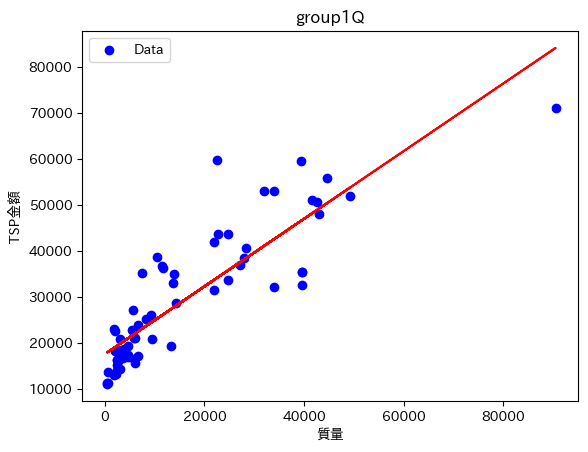

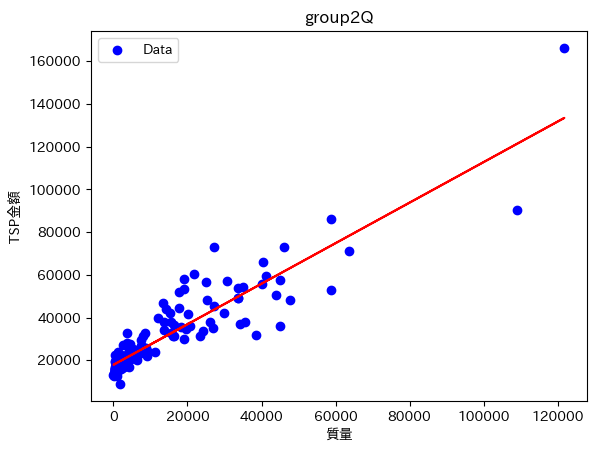

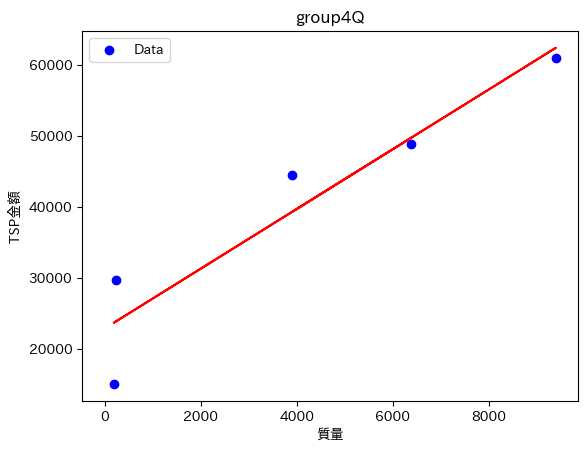

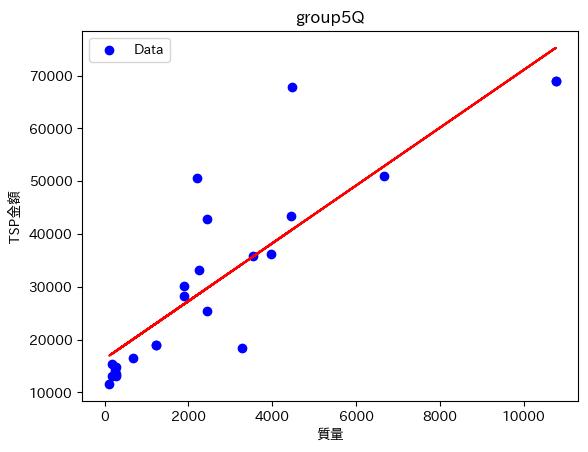

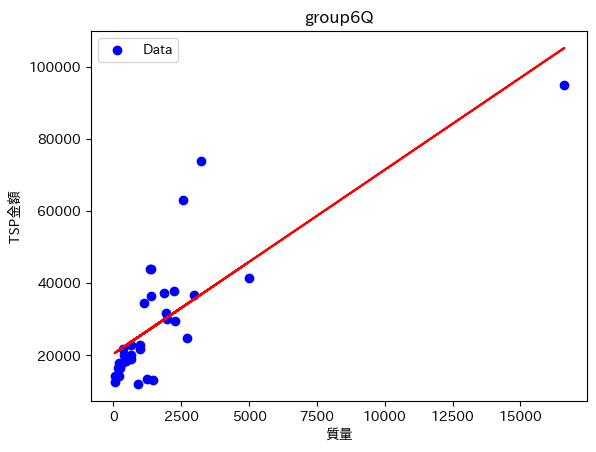

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_result=pd.DataFrame(columns=["group","切片b","係数a","TSP調整切片b","TSP調整係数a","P-value","T-value","Adj. R-squared",
                                "Mean Absolute Error","Mean Squared Error","R2"],index=range(6))

dataframes_list=grouped_Q

for df_count in range(len(dataframes_list)):
  x = dataframes_list[df_count]["質量"]
  df_result.iloc[df_count,0]="group"+str(df_count+1)
  if len(x)>=2:
    y = dataframes_list[df_count]["TSP金額"]
    x = sm.add_constant(x)

    model = sm.OLS(y, x)
    results = model.fit()

    # print(results.summary())

    TSP_cost = dataframes_list[df_count]["TSP金額"].sum()
    D_cost = dataframes_list[df_count]["DC金額"].sum()
    df_result.iloc[df_count,1]=results.params[0]#切片b
    df_result.iloc[df_count,2]=results.params[1]#係数a
    df_result.iloc[df_count,3]=results.params[0]/(TSP_cost / D_cost)#TSP調整切片
    df_result.iloc[df_count,4]=results.params[1]/(TSP_cost / D_cost)#TSP調整係数
    df_result.iloc[df_count,5]=results.pvalues["質量"]#P-value
    df_result.iloc[df_count,6]=results.tvalues["質量"]#T-value
    df_result.iloc[df_count,7]=results.rsquared_adj#Adj. R-squared

    # モデルの結果を使用して予測値を計算
    y_pred = results.predict(x)

    # 評価指標を計算
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    df_result.iloc[df_count,8]=mae
    df_result.iloc[df_count,9]=mse
    df_result.iloc[df_count,10]=r2

    plt.scatter(x["質量"], y, color='blue', label='Data')
    plt.plot(x, x * df_result.iloc[df_count,2] + df_result.iloc[df_count,1], color='red')

    plt.title("group"+str(df_count+1)+"Q")
    plt.xlabel('質量')
    # plt.xlim(0,100000)
    plt.ylabel('TSP金額')
    # plt.ylim(0,800000)
    plt.legend()
    plt.show()

df_result.to_csv('reslut.csv',encoding="cp932",index = False)
files.download('reslut.csv')

**ヒストグラム**

<ipython-input-25-6dbf9fcbb02c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_list[i]["(TSP金額-切片)/質量"]=(dataframe_list[i]["TSP金額"]-results.params[0])/dataframe_list[i]["質量"]


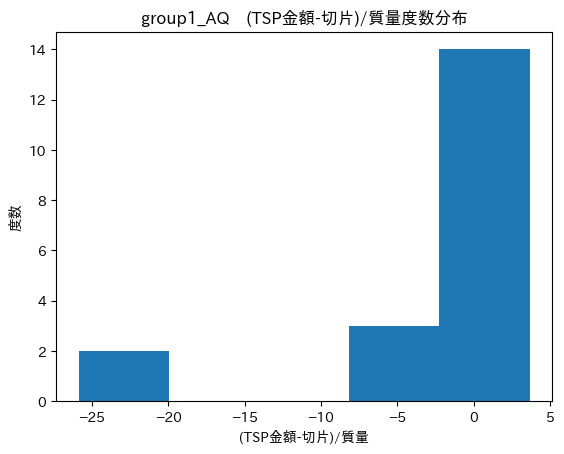

<ipython-input-25-6dbf9fcbb02c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_list[i]["(TSP金額-切片)/質量"]=(dataframe_list[i]["TSP金額"]-results.params[0])/dataframe_list[i]["質量"]


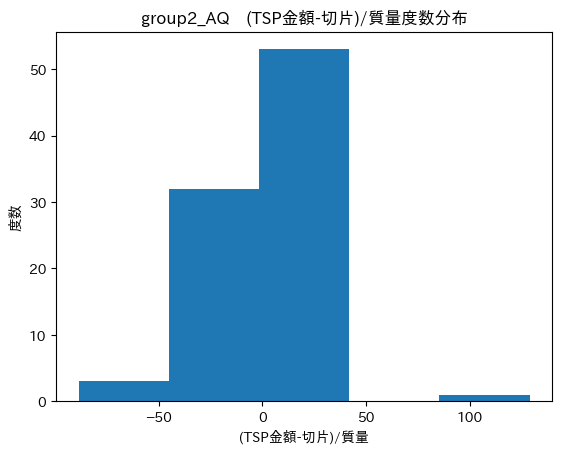

<ipython-input-25-6dbf9fcbb02c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_list[i]["(TSP金額-切片)/質量"]=(dataframe_list[i]["TSP金額"]-results.params[0])/dataframe_list[i]["質量"]


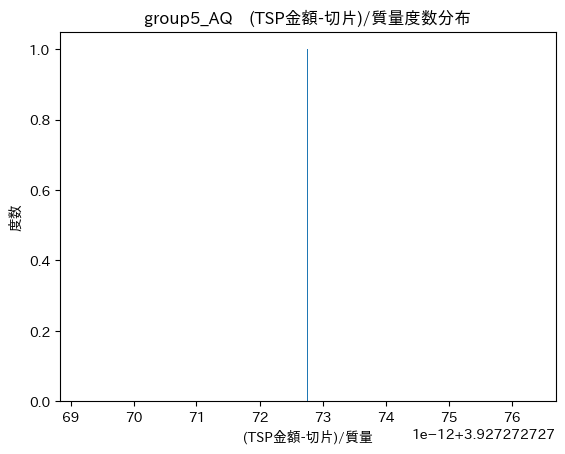

<ipython-input-25-6dbf9fcbb02c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_list[i]["(TSP金額-切片)/質量"]=(dataframe_list[i]["TSP金額"]-results.params[0])/dataframe_list[i]["質量"]


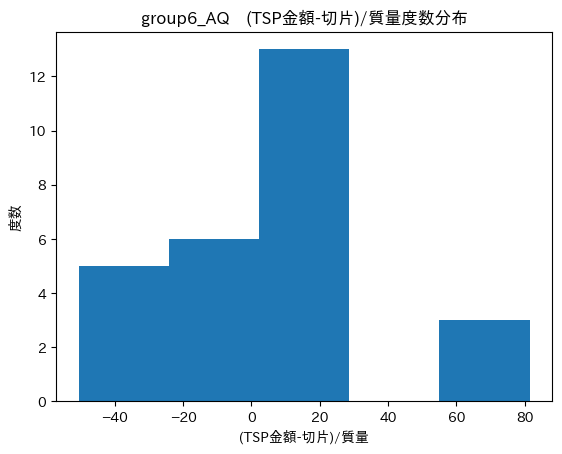

In [ ]:
dataframe_list=grouped_AQ

for i in range(len(dataframe_list)):
  if len(dataframe_list[i])>=2:
    y = dataframe_list[i]["TSP金額"]
    x = sm.add_constant(dataframe_list[i]["質量"])

    model = sm.OLS(y, x)
    results = model.fit()
    results.params[0]#切片b

    dataframe_list[i]["(TSP金額-切片)/質量"]=(dataframe_list[i]["TSP金額"]-results.params[0])/dataframe_list[i]["質量"]

    plt.hist(dataframe_list[i]["(TSP金額-切片)/質量"], bins=5)
    plt.title("group"+str(i+1)+"_AQ　(TSP金額-切片)/質量度数分布")
    # plt.xlim(-100,100)
    # plt.ylim(0, 80)
    plt.xlabel('(TSP金額-切片)/質量')
    plt.ylabel('度数')
    plt.show()

**時系列**

In [ ]:
month_list=df_pulleyA["売上月"].drop_duplicates().to_list()

for i in month_list:
  selected_rows = df_pulleyA[df_pulleyA['売上月'].dt.to_period("M") == i.to_period("M")]
  # 回帰分析を実施
  X = sm.add_constant(selected_rows['質量'])
  y = selected_rows['TSP単価']
  model = sm.OLS(y, X).fit()

  # 切片を取得して新しい列に保存
  selected_rows["(TSP金額-切片)/質量"] = (selected_rows["TSP単価"]-model.params['const'])/selected_rows["質量"]
  selected_rows["TSP金額/質量"] = selected_rows["TSP単価"]/selected_rows["質量"]

  # 元のデータフレームに変更を反映
  df_pulleyA.loc[selected_rows.index, "(TSP金額-切片)/質量"] = selected_rows["(TSP金額-切片)/質量"]
  df_pulleyA.loc[selected_rows.index, "TSP金額/質量"] = selected_rows["TSP金額/質量"]

<ipython-input-26-35e5ee20dda3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows["(TSP金額-切片)/質量"] = (selected_rows["TSP単価"]-model.params['const'])/selected_rows["質量"]
<ipython-input-26-35e5ee20dda3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows["TSP金額/質量"] = selected_rows["TSP単価"]/selected_rows["質量"]
<ipython-input-26-35e5ee20dda3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [ ]:
month_list=df_pulleyB["売上月"].drop_duplicates().to_list()

for i in month_list:
  selected_rows = df_pulleyB[df_pulleyB['売上月'].dt.to_period("M") == i.to_period("M")]
  # 回帰分析を実施
  X = sm.add_constant(selected_rows['質量'])
  y = selected_rows['TSP単価']
  model = sm.OLS(y, X).fit()

  # 切片を取得して新しい列に保存
  try:
    selected_rows["(TSP金額-切片)/質量"] = (selected_rows["TSP単価"]-model.params['const'])/selected_rows["質量"]
  except:
    selected_rows["(TSP金額-切片)/質量"] = np.nan

  selected_rows["TSP金額/質量"] = selected_rows["TSP単価"]/selected_rows["質量"]

  # 元のデータフレームに変更を反映
  df_pulleyB.loc[selected_rows.index, "(TSP金額-切片)/質量"] = selected_rows["(TSP金額-切片)/質量"]
  df_pulleyB.loc[selected_rows.index, "TSP金額/質量"] = selected_rows["TSP金額/質量"]

<ipython-input-27-b441faa9fef3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows["(TSP金額-切片)/質量"] = np.nan
<ipython-input-27-b441faa9fef3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows["TSP金額/質量"] = selected_rows["TSP単価"]/selected_rows["質量"]
<ipython-input-27-b441faa9fef3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
df_pulleyA_AQ = df_pulleyA[df_pulleyA["見積番号"].str.contains("AQ")]
df_pulleyA_Q = df_pulleyA[~df_pulleyA["見積番号"].str.contains("AQ")]
df_pulleyB_AQ = df_pulleyB[df_pulleyB["見積番号"].str.contains("AQ")]
df_pulleyB_Q = df_pulleyB[~df_pulleyB["見積番号"].str.contains("AQ")]

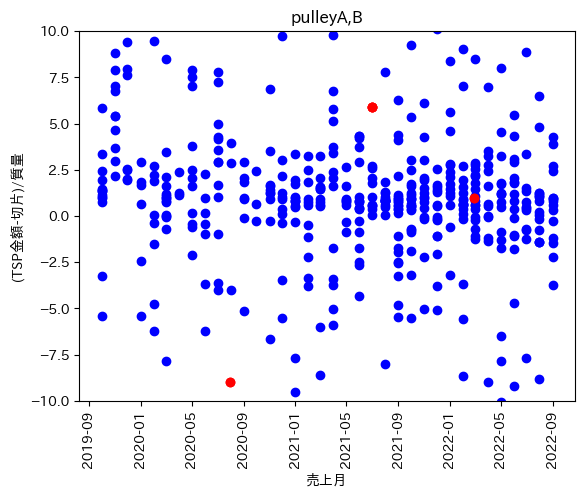

In [ ]:
# df['売上月'] = pd.to_datetime(df['売上月'])
plt.plot_date(df_pulleyA.reset_index()['売上月'], df_pulleyA.reset_index()['(TSP金額-切片)/質量'],label='pulleyA', color='blue')
plt.plot_date(df_pulleyB.reset_index()['売上月'], df_pulleyB.reset_index()['(TSP金額-切片)/質量'],label='pulleyB', color='red')

# グラフにタイトルと軸ラベルを追加
plt.title('pulleyA,B')
plt.xlabel('売上月')
plt.ylabel('(TSP金額-切片)/質量')

plt.ylim(-10, 10)

plt.xticks(rotation=90)

plt.show()

#確率密度
#価格変動の情報があるかどうか？

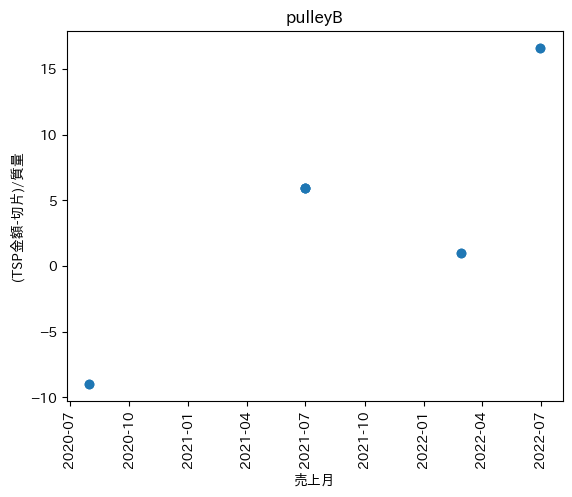

In [ ]:
df=df_pulleyB.reset_index()

# df['売上月'] = pd.to_datetime(df['売上月'])
plt.plot_date(df['売上月'], df['(TSP金額-切片)/質量'])

# グラフにタイトルと軸ラベルを追加
plt.title('pulleyB')
plt.xlabel('売上月')
plt.ylabel('(TSP金額-切片)/質量')

# plt.xlim(df['売上月'].min(), df['売上月'].max())

plt.xticks(rotation=90)

plt.show()

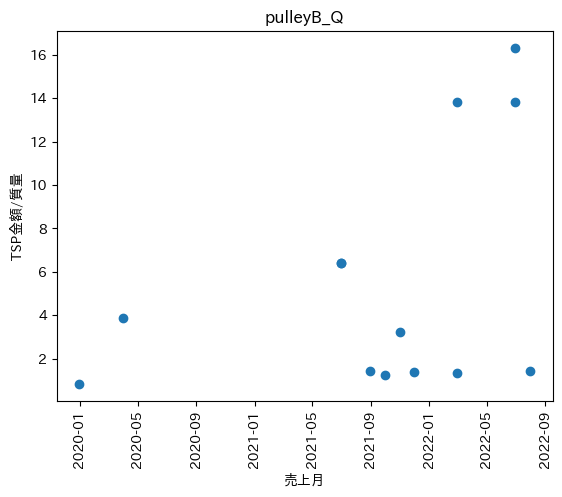

In [ ]:
df=df_pulleyB_Q.reset_index()

# df['売上月'] = pd.to_datetime(df['売上月'])
plt.plot_date(df['売上月'], df["TSP金額/質量"])

# グラフにタイトルと軸ラベルを追加
plt.title('pulleyB_Q')
plt.xlabel('売上月')
plt.ylabel("TSP金額/質量")

# plt.xlim(df['売上月'].min(), df['売上月'].max())

plt.xticks(rotation=90)

plt.show()

In [ ]:
df.loc[1,'売上月']

Timestamp('2021-11-30 00:00:00')

# **Total Graph Plot**

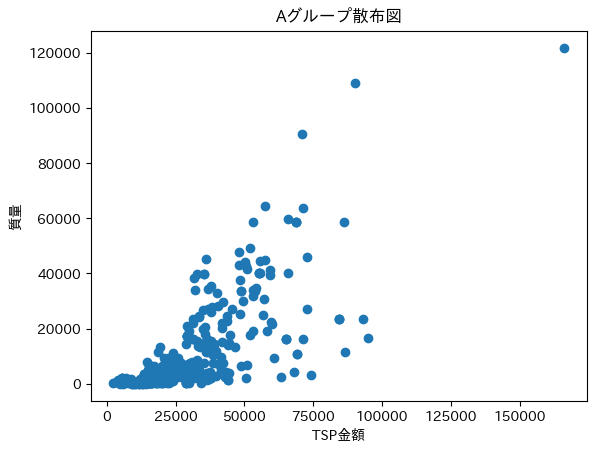

In [ ]:
plt.scatter(df_pulleyA_pre['TSP単価'], df_pulleyA_pre['質量'])
plt.title('Aグループ散布図')
plt.xlabel('TSP金額')
plt.ylabel('質量')
plt.show()

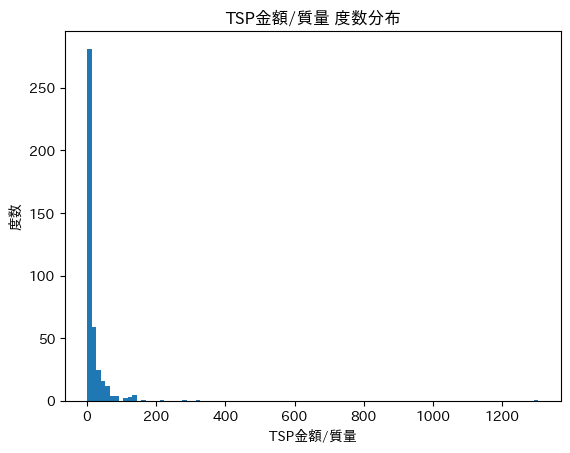

In [ ]:
plt.hist(df_pulleyA_pre['TSP金額/質量'], bins=100)
plt.title('TSP金額/質量 度数分布')
# plt.xlim(0, 350)
# plt.ylim(0, 80)
plt.xlabel('TSP金額/質量')
plt.ylabel('度数')
plt.show()

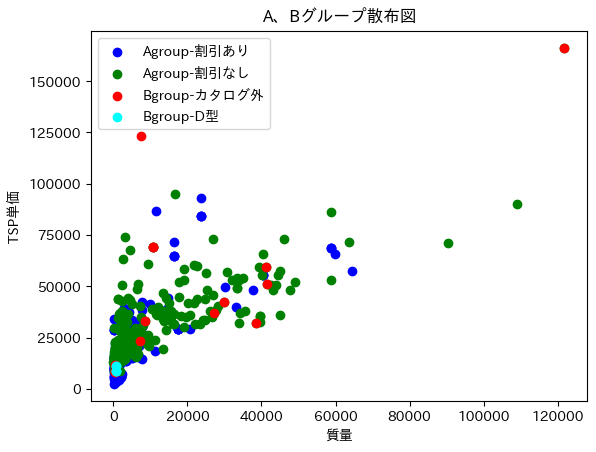

In [ ]:
plt.scatter(df_pulleyA_pre[df_pulleyA_pre["見積番号"].str.contains("AQ")]['質量'],
            df_pulleyA_pre[df_pulleyA_pre["見積番号"].str.contains("AQ")]['TSP単価'],
            color='blue', label='Agroup-割引あり')
plt.scatter(df_pulleyA_pre[~df_pulleyA_pre["見積番号"].str.contains("AQ")]['質量'],
            df_pulleyA_pre[~df_pulleyA_pre["見積番号"].str.contains("AQ")]['TSP単価'],
            color='green', label='Agroup-割引なし')
plt.scatter(df_pulleyB_teeth['質量'], df_pulleyB_teeth['TSP単価'], color='red', label='Bgroup-カタログ外')
plt.scatter(df_pulleyB_typeD['質量'], df_pulleyB_typeD['TSP単価'], color='cyan', label='Bgroup-D型')

# グラフにタイトルと軸ラベルを追加
plt.title('A、Bグループ散布図')
plt.xlabel('質量')
plt.ylabel('TSP単価')

# 凡例を表示
plt.legend()

# グラフを表示
plt.show()

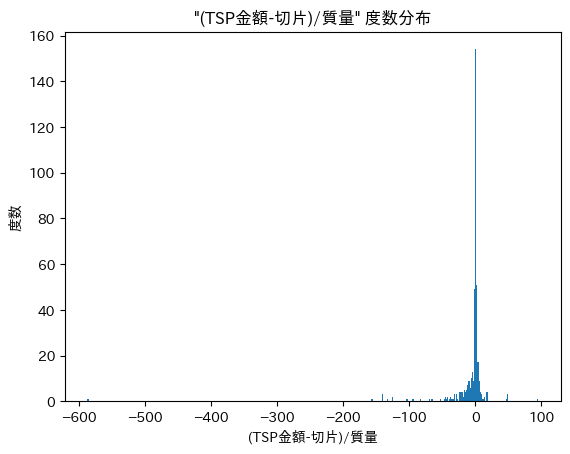

In [ ]:
y = df_pulleyA_pre["TSP金額"]
x = sm.add_constant(df_pulleyA_pre["質量"])

model = sm.OLS(y, x)
results = model.fit()
results.params[0]#切片b

df_pulleyA_pre["(TSP金額-切片)/質量"]=(df_pulleyA_pre["TSP金額"]-results.params[0])/df_pulleyA_pre["質量"]
plt.hist(df_pulleyA_pre["(TSP金額-切片)/質量"], bins=400)
plt.title('"(TSP金額-切片)/質量" 度数分布')
# plt.xlim(-100,100)
# plt.ylim(0, 80)
plt.xlabel('(TSP金額-切片)/質量')
plt.ylabel('度数')
plt.show()

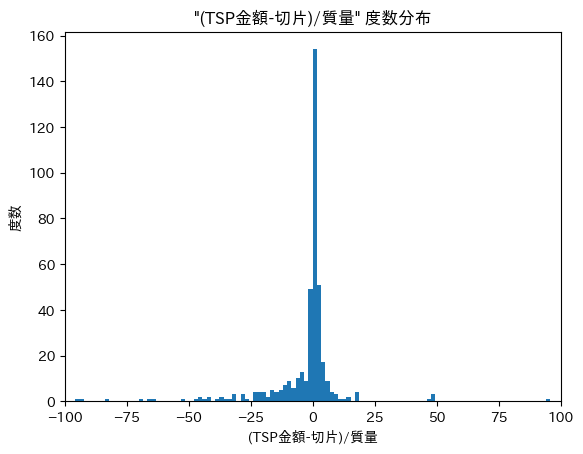

# **graph:AグループAQ、Q**

In [ ]:
#AQ
len(df_pulleyA_pre[df_pulleyA_pre["見積番号"].str.contains("AQ")])

142

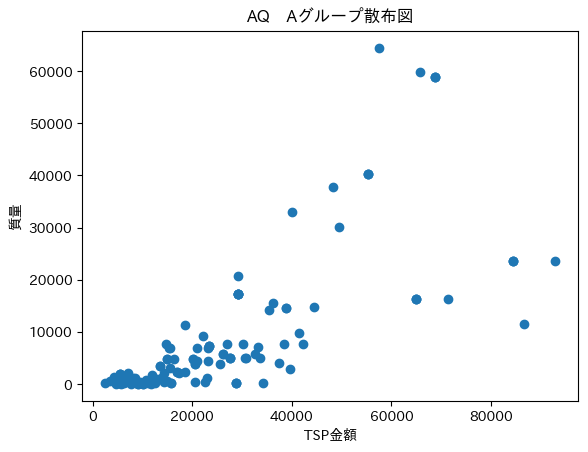

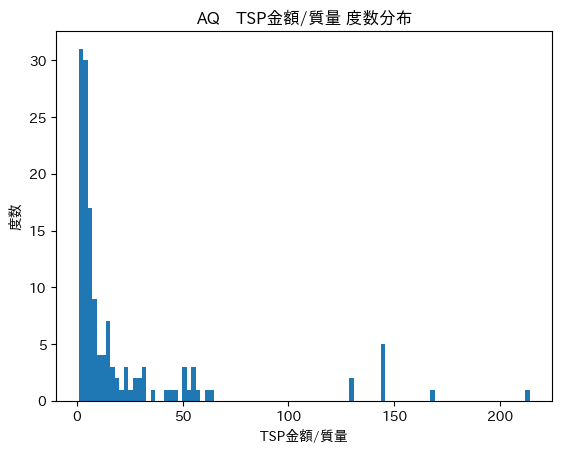

In [ ]:
plt.scatter(df_pulleyA_pre[df_pulleyA_pre["見積番号"].str.contains("AQ")]['TSP単価'], df_pulleyA_pre[df_pulleyA_pre["見積番号"].str.contains("AQ")]['質量'])
plt.title('AQ　Aグループ散布図')
plt.xlabel('TSP金額')
plt.ylabel('質量')
plt.show()

plt.hist(df_pulleyA_pre[df_pulleyA_pre["見積番号"].str.contains("AQ")]['TSP金額/質量'], bins=100)
plt.title('AQ　TSP金額/質量 度数分布')
# plt.xlim(0, 350)
# plt.ylim(0, 80)
plt.xlabel('TSP金額/質量')
plt.ylabel('度数')
plt.show()

In [ ]:
#Q
len(df_pulleyA_pre[~df_pulleyA_pre["見積番号"].str.contains("AQ")])

274

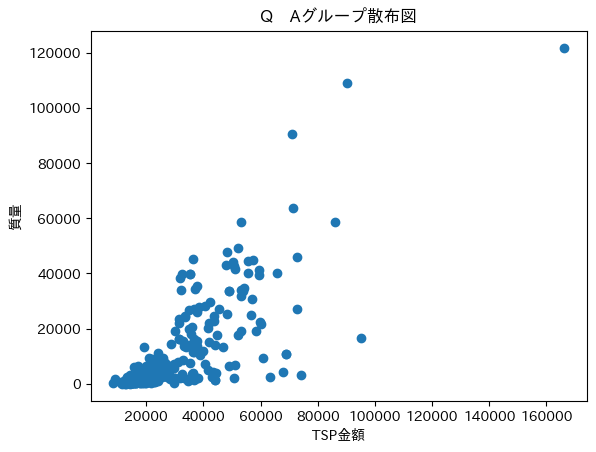

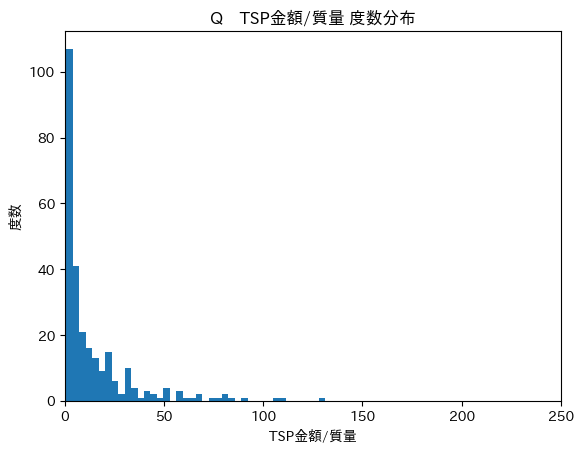

In [ ]:
plt.scatter(df_pulleyA_pre[~df_pulleyA_pre["見積番号"].str.contains("AQ")]['TSP単価'], df_pulleyA_pre[~df_pulleyA_pre["見積番号"].str.contains("AQ")]['質量'])
plt.title('Q　Aグループ散布図')
plt.xlabel('TSP金額')
plt.ylabel('質量')
plt.show()

plt.hist(df_pulleyA_pre[~df_pulleyA_pre["見積番号"].str.contains("AQ")]['TSP金額/質量'], bins=400)
plt.title('Q　TSP金額/質量 度数分布')
plt.xlim(0, 250)
# plt.ylim(0, 80)
plt.xlabel('TSP金額/質量')
plt.ylabel('度数')
plt.show()

B_teeth

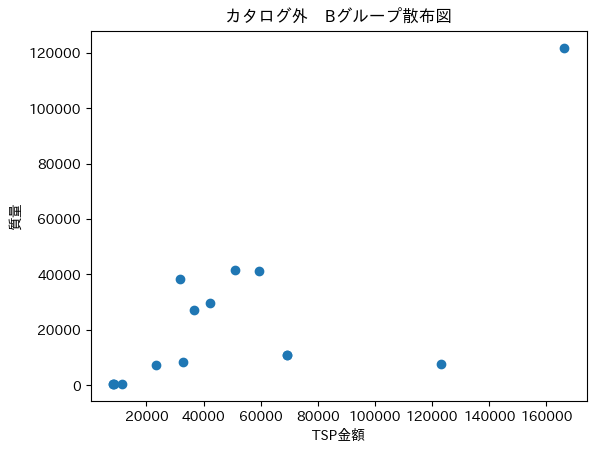

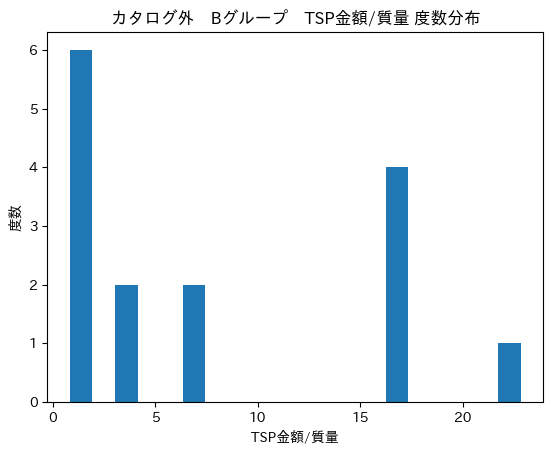

In [ ]:
plt.scatter(df_pulleyB_teeth['TSP単価'], df_pulleyB_teeth['質量'])
plt.title('カタログ外　Bグループ散布図')
plt.xlabel('TSP金額')
plt.ylabel('質量')
plt.show()

plt.hist(df_pulleyB_teeth['TSP金額/質量'], bins=20)
plt.title('カタログ外　Bグループ　TSP金額/質量 度数分布')
# plt.xlim(0, 250)
# plt.ylim(0, 80)
plt.xlabel('TSP金額/質量')
plt.ylabel('度数')
plt.show()

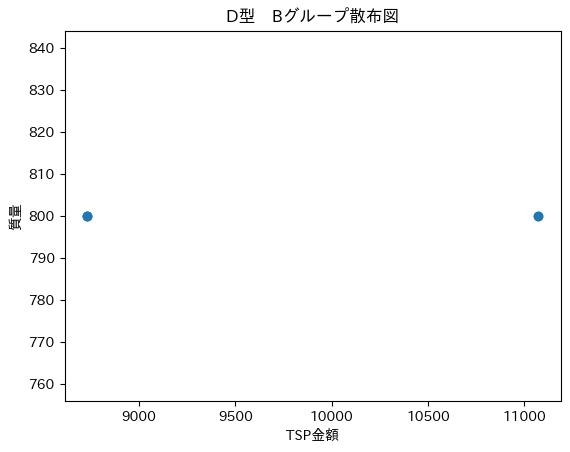

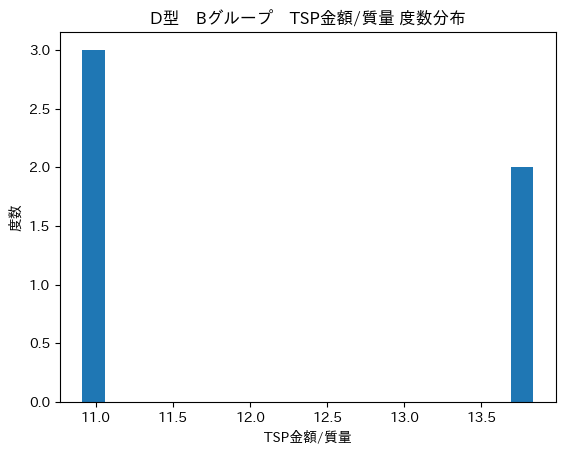

In [ ]:
plt.scatter(df_pulleyB_typeD['TSP単価'], df_pulleyB_typeD['質量'])
plt.title('D型　Bグループ散布図')
plt.xlabel('TSP金額')
plt.ylabel('質量')
plt.show()

plt.hist(df_pulleyB_typeD['TSP金額/質量'], bins=20)
plt.title('D型　Bグループ　TSP金額/質量 度数分布')
# plt.xlim(0, 250)
# plt.ylim(0, 80)
plt.xlabel('TSP金額/質量')
plt.ylabel('度数')
plt.show()

In [ ]:
df_pulleyB_typeD[["TSP単価","質量"]]

,TSP単価,質量
0,11070,800
1,11070,800
2,8730,800
3,8730,800
4,8730,800


TSP金額/質量

# **group2_Q simulation**

In [ ]:
group2_Q=group2_Q.reset_index(drop=True)

In [ ]:
#回帰モデルで切片計算
y = group2_Q["TSP金額"]
x = sm.add_constant(group2_Q["質量"])

model = sm.OLS(y, x)
results = model.fit()

results.params[0]#切片b
results.params[1]#係数a
y_pred = results.predict(x)
r2 = r2_score(y, y_pred)
print(results.params[0],results.params[1],r2)

17876.43729289389 0.9489897509183529 0.8250439599852901


前後10%はずれ除外用

In [ ]:
##-------------------------------------------信頼区間計算用--------------------------------------------

# group2_Q["(TSP金額-切片)/質量"] = (group2_Q["TSP金額"] - 17876.43729289389) / group2_Q["質量"]
# data = group2_Q["(TSP金額-切片)/質量"]
# # group2_Q["TSP金額/質量"] = group2_Q["TSP金額"] / group2_Q["質量"]
# # data = group2_Q["TSP金額/質量"]
# # データの平均と標準偏差を計算
# mean_value = np.mean(data)
# std_dev = np.std(data)

# # 95%信頼区間を計算
# confidence_interval = norm.interval(0.95, loc=mean_value, scale=std_dev)

# # 95%信頼区間内のデータを抽出
# data_in_interval = data[(data >= confidence_interval[0]) & (data <= confidence_interval[1])]

# # 95%信頼区間外のデータを抽出
# data_outside_interval = data[(data < confidence_interval[0]) | (data > confidence_interval[1])]

# # 抽出されたデータに対応する元データを抽出
# selected_rows_in_interval = group2_Q.loc[data_in_interval.index]
# selected_rows_outside_interval = group2_Q.loc[data_outside_interval.index]

# # # 結果を表示
# # print("95%信頼区間内のデータ:")
# # print(data_in_interval)

# # print("\n95%信頼区間外のデータ:")
# # print(data_outside_interval)

# # print("\n95%信頼区間内のデータに対応する元データ:")
# # print(selected_rows_in_interval)

# # print("\n95%信頼区間外のデータに対応する元データ:")
# # print(selected_rows_outside_interval)


In [ ]:
# len(selected_rows_in_interval)

In [ ]:
# group2_Q=selected_rows_in_interval

In [ ]:
len(group2_Q)

144

In [ ]:
# group2_Q["(TSP金額-切片)/質量"]

In [ ]:
# #------------------信頼区間data plot用---------------------

# # plt.figure(figsize=(20, 16))
# x = sm.add_constant(group2_Q["質量"])
# y = group2_Q["TSP金額"]

# plt.scatter(x["質量"], y, color='blue',label="95%信頼区間")
# plt.scatter(sm.add_constant(selected_rows_outside_interval["質量"])["質量"], selected_rows_outside_interval["TSP金額"], color='red',label="信頼区間外")
# plt.plot(x, x * 0.948989750918352 + 17876.4372928938, color='blue',label="全データ回帰")
# plt.plot(x, x * 0.9439900257562932+ 18080.82126439838, color="red",label=f"95%信頼区間回帰")

# plt.xlabel('質量')
# # plt.xlim(80000,)
# plt.ylabel('TSP金額')
# # plt.ylim(80000,)
# # plt.legend(["data_all","data_most_frequent", "全データ回帰",f"peak{i}"] )
# plt.legend()
# plt.show()


In [ ]:
# #------------------データ前後10%とる-------------------------

# # 列の選択
# group2_Q["(TSP金額-切片)/質量"]=(group2_Q["TSP金額"]-17876.43729289389)/group2_Q["質量"]
# data = group2_Q["(TSP金額-切片)/質量"]

# # データを昇順にソートし、元のDataFrameのインデックスも取得
# sorted_indices = np.argsort(data)
# sorted_data = data.iloc[sorted_indices]

# # データ数
# total_data_points = len(sorted_data)

# # 前後5%のデータを除いたデータを抽出
# filtered_data = sorted_data.iloc[int(0.1 * total_data_points):int(0.9 * total_data_points)]

# # フィルター後のデータに対応する元のDataFrameの行を取得
# filtered_rows = group2_Q.iloc[sorted_indices[int(0.1 * total_data_points):int(0.90 * total_data_points)]]

In [ ]:
# filtered_rows

In [ ]:
# #回帰モデルで切片計算
# y = filtered_rows["TSP金額"]
# x = sm.add_constant(filtered_rows["質量"])

# model = sm.OLS(y, x)
# results = model.fit()

# results.params[0]#切片b
# results.params[1]#係数a
# y_pred = results.predict(x)
# r2 = r2_score(y, y_pred)
# print(results.params[0],results.params[1],r2)

In [ ]:
# #回帰モデルで切片計算
# y = group2_Q["TSP金額"]
# x = sm.add_constant(group2_Q["質量"])

# model = sm.OLS(y, x)
# results = model.fit()

# results.params[0]#切片b
# results.params[1]#係数a
# y_pred = results.predict(x)
# r2 = r2_score(y, y_pred)
# print(results.params[0],results.params[1],r2)

In [ ]:
# #回帰モデルで切片計算
# y = group2_Q.drop(index=80)["TSP金額"]
# x = sm.add_constant(group2_Q.drop(index=80)["質量"])

# model = sm.OLS(y, x)
# results = model.fit()

# results.params[0]#切片b
# results.params[1]#係数a
# y_pred = results.predict(x)
# r2 = r2_score(y, y_pred)
# print(results.params[0],results.params[1],r2)

In [ ]:
# #----------------------前後5%data plot用--------------------------
# # plt.figure(figsize=(20, 16))
# x = sm.add_constant(group2_Q["質量"])
# y = group2_Q["TSP金額"]

# plt.scatter(x["質量"], y, color='blue',label="排除")
# plt.scatter(sm.add_constant(group2_Q.drop(index=80)["質量"])["質量"],group2_Q.drop(index=80)["TSP金額"], color='red',label="その他データ")
# # plt.scatter(sm.add_constant(filtered_rows["質量"])["質量"], filtered_rows["TSP金額"], color='red',label="80%")
# plt.plot(x, x * 0.948989750918352 + 17876.4372928938, color='blue',label="全データ回帰")
# # plt.plot(x, x * 0.9457664169225207+ 17589.291685228436, color="red",label=f"排除後回帰")
# plt.plot(x, x * 0.8586341825703698+ 18757.792220635187, color="red",label=f"排除後回帰")
# plt.xlabel('質量')
# # plt.xlim(80000,)
# plt.ylabel('TSP金額')
# # plt.ylim(80000,)
# # plt.legend(["data_all","data_most_frequent", "全データ回帰",f"peak{i}"] )
# plt.legend()
# plt.show()


In [ ]:
group2_Q.iloc[80:81,:]

,売上月,注番,生産計画番号,見積番号,受注番号,受注品名,納品書番号,分類,品番,品名コード,...,ZIT,ZK,ZKN,ZKNK,ZKNS,ZS,ZT,歯数,歯大きさ,TSP金額/質量
80,2021-11-01,BT5-8F064B,44408200,Q21100265,7048101,PT120P14M100A-TK,700318,NaN,NaN,TPT217980K00-0,...,0,0,0,0,0,0,0,120,14,1.364666


In [ ]:
#はずれ確認用
group2_Q_sorted = group2_Q.sort_values("(TSP金額-切片)/質量")
group2_Q_sorted.to_csv('reslut.csv',encoding="cp932",index = True)
files.download('reslut.csv')

KeyError: '(TSP金額-切片)/質量'

In [ ]:
df_result_b=pd.DataFrame(columns=["intercept","最頻値","範囲"],index=range(10000))

KeyboardInterrupt: 

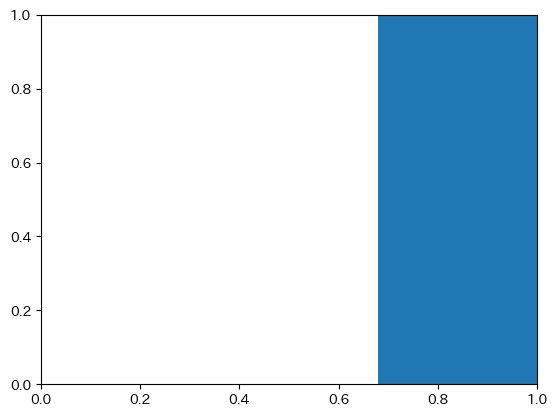

In [ ]:
from google.colab import files

intercept=results.params[0]

pdf_filename = "output_graphs.pdf"
pdf_pages = PdfPages(pdf_filename)

k=0

with PdfPages(pdf_filename) as pdf_pages:
    k = 0
    for i in np.arange(intercept - 15000, intercept + 15000, 10):
        for j in range(len(group2_Q)):
            # 計算
            group2_Q["(TSP金額-切片)/質量"] = (group2_Q["TSP金額"] - i) / group2_Q["質量"]

        # 新しい図を作成
        plt.close()  # 既存の図を閉じる

        plt.figure()

        # プロット
        values, edges, _ = plt.hist(group2_Q["(TSP金額-切片)/質量"], bins=200)
        bin_center = (edges[:-1] + edges[1:]) / 2  # ヒストグラムのビンの中心を計算
        plt.title("group2_Q intercept:" + str(i))
        plt.xlim(-50, 50)
        plt.xlabel('(TSP金額-切片)/質量')
        plt.ylabel('度数')

        # プロットをPDFページに保存
        pdf_pages.savefig()

        # 最頻値、度数、範囲の計算
        most_frequent_index = np.argmax(values)
        most_frequent_value = bin_center[most_frequent_index]
        frequency = values[most_frequent_index]
        # value_range = (bin_center[most_frequent_index - 1], bin_center[most_frequent_index + 1])
        # if 0 < most_frequent_index < len(bin_center) - 1:
        #     value_range = (bin_center[most_frequent_index - 1], bin_center[most_frequent_index + 1])
        #     df_result_b.loc[k, "範囲"] = f"{value_range[0]} - {value_range[1]}"
        # else:
        #     # 範囲外の場合の処理を追加（例えば、エラーメッセージを表示するなど）
        #     print("範囲外のインデックスです。")
        #     value_range = None  # または適切なデフォルト値を設定

        # DataFrameに保存
        df_result_b.loc[k, "intercept"] = i
        df_result_b.loc[k, "最頻値"] = most_frequent_value
        df_result_b.loc[k, "度数"] = frequency
        # df_result_b.loc[k, "範囲"] = f"{value_range[0]} - {value_range[1]}"

        k += 1

# PDFファイルをダウンロード
files.download(pdf_filename)

# 結果を表示
print(df_result_b)


In [ ]:
df_result_b=pd.DataFrame(columns=["intercept","度数","start","end"],index=range(10000))

In [ ]:
#20231101調整 bins of lenth
intercept=results.params[0]

k=0

for i in np.arange(intercept - 15000, intercept+15000, 10):
  # 計算
  group2_Q["(TSP金額-切片)/質量"] = (group2_Q["TSP金額"] - i) / group2_Q["質量"]

  # ビンの幅を指定
  bin_width = 1

  # データ範囲を計算
  data_min = min(group2_Q["(TSP金額-切片)/質量"])
  data_max = max(group2_Q["(TSP金額-切片)/質量"])

  # # ビンの境界を生成
  # bins = np.arange(data_min, data_max + bin_width, bin_width)
  # プロット
  # values, edges, _ = plt.hist(group2_Q["(TSP金額-切片)/質量"], bins=bins)
  # bin_center = (edges[:-1] + edges[1:]) / 2  # ヒストグラムのビンの中心を計算
  # # 最頻値、度数、範囲の計算
  # most_frequent_index = np.argmax(values)
  # most_frequent_value = bin_center[most_frequent_index]
  # frequency = values[most_frequent_index]

  # ビンの境界を生成
  bins = np.arange(data_min, data_max + bin_width, bin_width)
  # ヒストグラムの計算
  hist, bin_edges = np.histogram(group2_Q["(TSP金額-切片)/質量"], bins=bins)
  # 最大のデータ数とそのデータ範囲を取得
  max_count = max(hist)
  max_bin_index = np.argmax(hist)

  # データ範囲の開始と終了を取得
  bin_start = bin_edges[max_bin_index]
  bin_end = bin_edges[max_bin_index + 1]

  # DataFrameに保存
  df_result_b.loc[k, "intercept"] = i
  df_result_b.loc[k, "度数"] = max_count
  df_result_b.loc[k, "start"] = bin_start
  df_result_b.loc[k, "end"] = bin_end

  k+=1

  print(i)
  print(max_count)
  print(bin_start)
  print(bin_end)
# 結果を表示
print(df_result_b)


ストリーミング出力は最後の 5000 行に切り捨てられました。
0.35627071061094284
1.3562707106109428
20416.43729289389
53
0.35627071061094284
1.3562707106109428
20426.43729289389
53
0.35627071061094284
1.3562707106109428
20436.43729289389
53
0.35627071061094284
1.3562707106109428
20446.43729289389
53
0.35627071061094284
1.3562707106109428
20456.43729289389
53
0.35627071061094284
1.3562707106109428
20466.43729289389
53
0.35627071061094284
1.3562707106109428
20476.43729289389
53
0.35627071061094284
1.3562707106109428
20486.43729289389
53
0.35627071061094284
1.3562707106109428
20496.43729289389
53
0.35627071061094284
1.3562707106109428
20506.43729289389
53
0.35627071061094284
1.3562707106109428
20516.43729289389
53
0.35627071061094284
1.3562707106109428
20526.43729289389
53
0.35627071061094284
1.3562707106109428
20536.43729289389
54
0.35627071061094284
1.3562707106109428
20546.43729289389
54
0.35627071061094284
1.3562707106109428
20556.43729289389
54
0.35627071061094284
1.3562707106109428
20566.43729289389
54
0.356270

In [ ]:
df_result_b.to_csv('reslut.csv',encoding="cp932",index = False)
files.download('reslut.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **調整＆検証**

In [ ]:
# df_simulation_result=pd.read_csv(input_path +"simulation_result.csv",encoding="cp932")
# df_simulation_result=df_simulation_result.sort_values(by='度数', ascending=False)
# df_simulation_result=pd.read_csv(input_path +"result_df (2).csv",encoding="cp932")
df_simulation_result=pd.read_csv(input_path +"simulation_reslut_bin1.csv",encoding="cp932")

extract 10peak

In [ ]:
#peak10
# df_index0=df_simulation_result[df_simulation_result["intercept"]==15436.43729].index
# df_index1=df_simulation_result[df_simulation_result["intercept"]==15636.43729].index
# df_index2=df_simulation_result[df_simulation_result["intercept"]==15886.43729].index
# df_index3=df_simulation_result[df_simulation_result["intercept"]==16046.43729].index
# df_index4=df_simulation_result[df_simulation_result["intercept"]==16386.43729].index
# df_index5=df_simulation_result[df_simulation_result["intercept"]==16716.43729].index
# df_index6=df_simulation_result[df_simulation_result["intercept"]==17166.43729].index
# df_index7=df_simulation_result[df_simulation_result["intercept"]==17806.43729].index
# df_index8=df_simulation_result[df_simulation_result["intercept"]==18646.43729].index
# df_index9=df_simulation_result[df_simulation_result["intercept"]==19726.43729].index

# df_peak = df_simulation_result.loc[df_index0].append(df_simulation_result.loc[df_index1])
# df_peak = df_peak.append(df_simulation_result.loc[df_index2])
# df_peak = df_peak.append(df_simulation_result.loc[df_index3])
# df_peak = df_peak.append(df_simulation_result.loc[df_index4])
# df_peak = df_peak.append(df_simulation_result.loc[df_index5])
# df_peak = df_peak.append(df_simulation_result.loc[df_index6])
# df_peak = df_peak.append(df_simulation_result.loc[df_index7])
# df_peak = df_peak.append(df_simulation_result.loc[df_index8])
# df_peak = df_peak.append(df_simulation_result.loc[df_index9])

# df_peak=df_peak.reset_index(drop=True)

# df_index0=df_simulation_result[df_simulation_result["intercept"]==15386.43729].index
# df_index1=df_simulation_result[df_simulation_result["intercept"]==15396.43729].index
# df_index2=df_simulation_result[df_simulation_result["intercept"]==15406.43729].index
# df_index3=df_simulation_result[df_simulation_result["intercept"]==15416.43729].index
# df_index4=df_simulation_result[df_simulation_result["intercept"]==15426.43729].index
# df_index5=df_simulation_result[df_simulation_result["intercept"]==15436.43729].index
# df_index6=df_simulation_result[df_simulation_result["intercept"]==15446.43729].index

# df_peak = df_simulation_result.loc[df_index0].append(df_simulation_result.loc[df_index1])
# df_peak = df_peak.append(df_simulation_result.loc[df_index2])
# df_peak = df_peak.append(df_simulation_result.loc[df_index3])
# df_peak = df_peak.append(df_simulation_result.loc[df_index4])
# df_peak = df_peak.append(df_simulation_result.loc[df_index5])
# df_peak = df_peak.append(df_simulation_result.loc[df_index6])


#bin_len()
#0.2
# df_peak = df_simulation_result.loc[df_simulation_result.index.isin([1237])]
#0.3
# df_peak = df_simulation_result.loc[df_simulation_result.index.isin([1170, 1173,1176,1237,1240,1258])]
#0.4
# df_peak = df_simulation_result.loc[df_simulation_result.index.isin([1170, 1172,1174,1176])]
#0.5
# df_peak = df_simulation_result.loc[df_simulation_result.index.isin([1158, 1159,1160,1161])]
#0.6
# df_peak = df_simulation_result.loc[df_simulation_result.index.isin([1169, 1172,1175,1178,1181,1184,1240,1243])]
#0.7
# df_peak = df_simulation_result.loc[df_simulation_result.index.isin([1245, 1252])]
#0.8
# df_peak = df_simulation_result.iloc[1244:1245,:]  ?
#0.9
# df_peak = df_simulation_result.iloc[1240:1241,:]
#1
df_peak = df_simulation_result.iloc[1251:1257]

df_peak=df_peak.reset_index(drop=True)
#-2

In [ ]:
df_peak

,intercept,度数,start,end
0,15386.43729,75,0.356271,1.356271
1,15396.43729,75,0.356271,1.356271
2,15406.43729,75,0.356271,1.356271
3,15416.43729,75,0.356271,1.356271
4,15426.43729,75,0.356271,1.356271
5,15436.43729,75,0.356271,1.356271


In [ ]:
df_peak.loc[0,"intercept"]

15386.43729

最頻値list作成

In [ ]:
#データ参照
# intercept=results.params[0]
intercept_list=df_peak["intercept"].tolist()
df_list=[]
for i in range(len(df_peak)):
  group2_Q["(TSP金額-切片)/質量"] = (group2_Q["TSP金額"] - df_peak.loc[i,"intercept"]) / group2_Q["質量"]

  most_frequent_data = group2_Q[(group2_Q["(TSP金額-切片)/質量"] >= df_peak.loc[i,"start"]) & (group2_Q["(TSP金額-切片)/質量"]  < df_peak.loc[i,"end"])]
  most_frequent_data = most_frequent_data#.reset_index(drop=True)
  df_list.append(most_frequent_data)
  # 結果を表示

  print("intercept：",df_peak.loc[i,"intercept"],"度数",df_peak.loc[i,"度数"],len(most_frequent_data))

intercept： 15386.43729 度数 75 75
intercept： 15396.43729 度数 75 75
intercept： 15406.43729 度数 75 75
intercept： 15416.43729 度数 75 75
intercept： 15426.43729 度数 75 75
intercept： 15436.43729 度数 75 75


In [ ]:
# # df_1=most_frequent_data
# # df_2=most_frequent_data
# # df_3=most_frequent_data
# df_4=most_frequent_data

In [ ]:
df_result=pd.DataFrame(columns=["peak","切片b","係数a","TSP調整切片b","TSP調整係数a","P-value","T-value","Adj. R-squared",
                                "Mean Absolute Error","Mean Squared Error","R2","intercept_","valuenum_"],index=range(10))

dataframes_list=df_list

for df_count in range(len(dataframes_list)):
  x = dataframes_list[df_count]["質量"]
  df_result.iloc[df_count,0]="peak"+str(df_count+1)
  if len(x)>=2:
    y = dataframes_list[df_count]["TSP金額"]
    x = sm.add_constant(x)

    model = sm.OLS(y, x)
    results = model.fit()

    # print(results.summary())

    # TSP_cost = dataframes_list[df_count]["TSP金額"].sum()
    # D_cost = dataframes_list[df_count]["DC金額"].sum()
    df_result.iloc[df_count,1]=results.params[0]#切片b
    df_result.iloc[df_count,2]=results.params[1]#係数a
    # df_result.iloc[df_count,3]=results.params[0]/(TSP_cost / D_cost)#TSP調整切片
    # df_result.iloc[df_count,4]=results.params[1]/(TSP_cost / D_cost)#TSP調整係数
    df_result.iloc[df_count,5]=results.pvalues["質量"]#P-value
    df_result.iloc[df_count,6]=results.tvalues["質量"]#T-value
    df_result.iloc[df_count,7]=results.rsquared_adj#Adj. R-squared

    # モデルの結果を使用して予測値を計算
    y_pred = results.predict(x)

    # 評価指標を計算
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    df_result.iloc[df_count,8]=mae
    df_result.iloc[df_count,9]=mse
    df_result.iloc[df_count,10]=r2
    df_result.iloc[df_count,11]=df_peak.loc[df_count,"intercept"]
    df_result.iloc[df_count,12]=df_peak.loc[df_count,"度数"]

    # plt.scatter(x["質量"], y, color='blue', label='Data')
    # plt.plot(x, x * df_result.iloc[df_count,2] + df_result.iloc[df_count,1], color='red')

    # plt.title("group"+str(df_count+1))
    # plt.xlabel('質量')
    # # plt.xlim(0,100000)
    # plt.ylabel('TSP金額')
    # # plt.ylim(0,800000)
    # plt.legend()
    # plt.show()

# df_result.to_csv('reslut.csv',encoding="cp932",index = False)
# files.download('reslut.csv')

In [ ]:
#step1 4samples
df_result=df_result.dropna(how="all",axis=1)

In [ ]:
df_result

,peak,切片b,係数a,P-value,T-value,Adj. R-squared,Mean Absolute Error,Mean Squared Error,R2,intercept_,valuenum_
0,peak1,15072.644588,0.951555,0.0,23.296643,0.879818,4487.687506,65823478.408098,0.881442,15386.43729,75
1,peak2,15072.644588,0.951555,0.0,23.296643,0.879818,4487.687506,65823478.408098,0.881442,15396.43729,75
2,peak3,15072.644588,0.951555,0.0,23.296643,0.879818,4487.687506,65823478.408098,0.881442,15406.43729,75
3,peak4,15072.644588,0.951555,0.0,23.296643,0.879818,4487.687506,65823478.408098,0.881442,15416.43729,75
4,peak5,15072.644588,0.951555,0.0,23.296643,0.879818,4487.687506,65823478.408098,0.881442,15426.43729,75
5,peak6,15072.644588,0.951555,0.0,23.296643,0.879818,4487.687506,65823478.408098,0.881442,15436.43729,75
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_result.to_csv('reslut.csv',encoding="cp932",index = False)
files.download('reslut.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cmap = get_cmap('tab20')

<ipython-input-75-3cab0c623866>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')


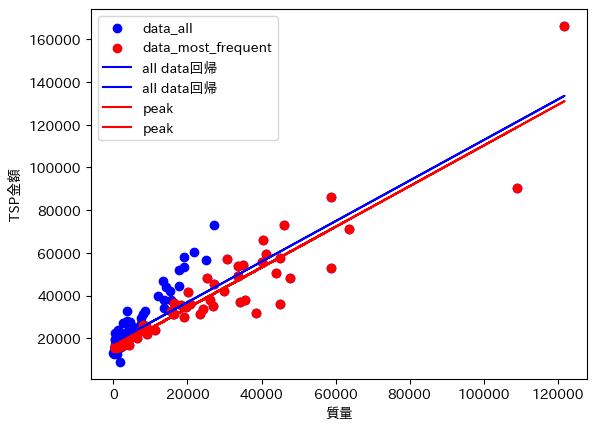

In [ ]:
#-----------------------------peakおよびdata_allグラフplot---------------------------------------

# plt.figure(figsize=(20, 16))
i=0
x = sm.add_constant(group2_Q["質量"])
y = group2_Q["TSP金額"]

plt.scatter(x["質量"], y, color='blue',label="data_all")
plt.scatter(sm.add_constant(df_list[i]["質量"])["質量"], df_list[i]["TSP金額"], color='red',label="data_most_frequent")
plt.plot(x, x * 0.948989750918352 + 17876.4372928938, color='blue',label="all data回帰")
plt.plot(sm.add_constant(df_list[i]["質量"]), sm.add_constant(df_list[i]["質量"]) * df_result.loc[i,"係数a"]
         + df_result.loc[i,"切片b"], color="red",label=f"peak")

plt.xlabel('質量')
# plt.xlim(80000,)
plt.ylabel('TSP金額')
# plt.ylim(80000,)
# plt.legend(["data_all","data_most_frequent", "全データ回帰",f"peak{i}"] )
plt.legend()
plt.show()


各peakと元回帰の比較

In [ ]:
# #----------------------------------------peak数の多い場合用------------------------------------------------------
# #----------多分使わない---------

# utput_directory = "output_images"
# os.makedirs(output_directory, exist_ok=True)

# for i in range(len(df_result)):
#   # plt.figure(figsize=(20, 16))
#   x = sm.add_constant(group2_Q["質量"])
#   y = group2_Q["TSP金額"]
#   plt.scatter(x["質量"], y, color='blue',label="data_all")
#   plt.scatter(sm.add_constant(df_list[i]["質量"])["質量"], df_list[i]["TSP金額"], color='red',label="data_most_frequent")
#   plt.plot(x, x * 0.948989750918352 + 17876.4372928938, color='red',label="全データ回帰")
#   plt.plot(x, x * df_result.loc[i,"係数a"] + df_result.loc[i,"切片b"], color=cmap(i),label=f"peak{i}")

#   plt.xlabel('質量')
#   # plt.xlim(80000,)
#   plt.ylabel('TSP金額')
#   # plt.ylim(80000,)
#   # plt.legend(["data_all","data_most_frequent", "全データ回帰",f"peak{i}"] )
#   plt.legend()
#   # plt.show()
#   #アウトプット
#   image_filename = os.path.join(output_directory, f"peak_{i + 1}.png")
#   plt.savefig(image_filename)
#   plt.close()

# # Zipファイルにまとめてダウンロード
# shutil.make_archive(output_directory, 'zip', output_directory)
# # ダウンロード用のリンクを表示
# zip_filename = f"{output_directory}.zip"
# files.download(zip_filename)
# # 画像保存ディレクトリを削除
# shutil.rmtree(output_directory)

In [ ]:
# x = sm.add_constant(df_list[2140]["質量"])
# y = df_list[2140]["TSP金額"]

# model = sm.OLS(y, x)
# results = model.fit()

# plt.scatter(x["質量"], y, color='blue', label='Data')
# plt.plot(x, x * results.params[1] + results.params[0], color='red')

# # plt.title("group"+str(df_count+1))
# plt.xlabel('質量')
# # plt.xlim(80000,)
# plt.ylabel('TSP金額')
# # plt.ylim(80000,)
# plt.legend()
# plt.show()

In [ ]:
# df_result.to_csv('result_df.csv',encoding="cp932",index = False)
# from google.colab import files
# files.download('result_df.csv')

bin=1 bule and red compare

In [ ]:
df_list[0]

,売上月,注番,生産計画番号,見積番号,受注番号,受注品名,納品書番号,分類,品番,品名コード,...,ZK,ZKN,ZKNK,ZKNS,ZS,ZT,歯数,歯大きさ,TSP金額/質量,(TSP金額-切片)/質量
0,2019-11-01,NT5-69390,28075000,Q19110011,4419781,PT56P14M40A-SL-TK,435656,NaN,NaN,0QV570A56A00,...,0,0,0,0,0,0,56,14,1.573822,0.768249
1,2019-11-01,TT1116208,27724100,Q19040976,4365681,PT36P14M40A-SL-TK,430906,NaN,NaN,TPT215142K01-0,...,0,0,0,0,0,0,36,14,3.272727,1.120778
2,2019-11-01,TT1116207,27724700,Q19040978,4365701,PT40P14M40A-SL-TK,430284,NaN,NaN,TPT215143K01-0,...,0,0,0,0,0,0,40,14,2.523454,0.883109
3,2019-11-01,FWFB91515,27556100,Q19100040,4311561,PT112P8M25A-SL-TK,428846,NaN,NaN,TPT215676K01-0,...,0,0,0,0,0,0,112,8,2.230769,1.291426
4,2019-12-01,JNNOT01749,28897200,Q19120104,4561281,PT29P8M40AF-SL-TK,449575,NaN,NaN,TPT215110K01-0,...,0,0,0,0,0,0,29,8,13.350000,0.527969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2022-07-01,YTK-7D177C,49544400,Q22060062,7858471,PT84P8M60B-TK,782286,J11,NaN,TPT218580K00-0,...,0,0,0,0,0,0,84,8,1.767123,0.986482
135,2022-07-01,TT1116745E,49434400,Q22050550,7841011,PT40P14M40A-SL-TK,778017,J31,NaN,TPT218589K01-0,...,0,0,0,0,0,0,40,14,2.429204,0.727164
139,2022-08-01,SSS2201076,50145500,Q22060399,7957811,PT44P14M85AF-SL-TK,788076,J31,NaN,TPT218659K01-0,...,0,0,0,0,0,0,44,14,2.063241,1.303042
140,2022-08-01,FWFB11800,49121100,Q21100647,7624531,PT112P8M60A-SL-TK,788022,J31,NaN,TPT216635K01-0,...,0,0,0,0,0,0,112,8,1.608294,1.149271


In [ ]:
#17876.43729289389 0.9489897509183529

group2_Q=group2_Q.reset_index(drop=True)
group2_Q["(TSP金額-切片)/質量"]=(group2_Q["TSP金額"]-17876.43729289389)/group2_Q["質量"]
group2_Q=group2_Q.drop(columns=["(TSP金額-切片)/質量"])

df_list[0]=df_list[0].drop(columns=["(TSP金額-切片)/質量"])

df_dropped=group2_Q.drop(df_list[0].index)
df_not_drop=df_list[0]

df_list=[df_dropped,df_not_drop]

In [ ]:
df_list[0]

,売上月,注番,生産計画番号,見積番号,受注番号,受注品名,納品書番号,分類,品番,品名コード,...,ZIT,ZK,ZKN,ZKNK,ZKNS,ZS,ZT,歯数,歯大きさ,TSP金額/質量
6,2019-12-01,NWNE94239,28460900,Q19110356,4470271,PT32P14M60B-SL-TK,441357,NaN,NaN,TPT215767K01-0,...,0,0,0,0,0,0,0,32,14,3.853960
7,2020-02-01,BT5-84506,29985800,Q20010438,4715751,PT72P5M15AF-SL-TK,469189,NaN,NaN,TPT209766K01-0,...,0,0,0,0,0,0,0,72,5,13.032468
8,2020-03-01,SWSC92536E,31103900,Q20020383,4868641,PT126P5M25BF-SL-TK,483874,NaN,NaN,TPT206387K01-0,...,0,0,0,0,0,0,0,126,5,3.869258
13,2020-05-01,DC0603569C,32155000,Q20040351,5059891,PT25P8M25AF-SL-TK,500856,NaN,NaN,TPT216285K01-0,...,0,0,0,0,0,0,0,25,8,30.857143
14,2020-05-01,FF110F302A,31948800,Q20030971,5031551,PT31P8M25AF-SL-TK,499660,NaN,NaN,TPT207461K01-0,...,0,0,0,0,0,0,0,31,8,20.477419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2022-07-01,VNHAW29002,49258100,Q22050419,7805611,PT80P8M40BF-SL-TK,775084,J11,NaN,TPT218569K01-0,...,0,0,0,0,0,0,0,80,8,3.501499
137,2022-08-01,KC0150796A,50451200,Q22070336,7996841,PT72P8M15B-SL-TK,791677,J31,NaN,TPT214361K00-0,...,0,0,0,0,0,0,0,72,8,4.773764
138,2022-08-01,KC0150795A,50445000,Q22070335,7996831,PT35P8M15B-SL-TK,791676,J31,NaN,TPT218692K01-0,...,0,0,0,0,0,0,0,35,8,21.555556
141,2022-08-01,MNAWN06568,50194000,Q22070075,7962681,PT80P5M15BF-TK,787450,J11,NaN,TPT218671K01-0,...,0,0,0,0,0,0,0,80,5,7.282443


In [ ]:
df_list[1]

,売上月,注番,生産計画番号,見積番号,受注番号,受注品名,納品書番号,分類,品番,品名コード,...,ZIT,ZK,ZKN,ZKNK,ZKNS,ZS,ZT,歯数,歯大きさ,TSP金額/質量
0,2019-11-01,NT5-69390,28075000,Q19110011,4419781,PT56P14M40A-SL-TK,435656,NaN,NaN,0QV570A56A00,...,0,0,0,0,0,0,0,56,14,1.573822
1,2019-11-01,TT1116208,27724100,Q19040976,4365681,PT36P14M40A-SL-TK,430906,NaN,NaN,TPT215142K01-0,...,0,0,0,0,0,0,0,36,14,3.272727
2,2019-11-01,TT1116207,27724700,Q19040978,4365701,PT40P14M40A-SL-TK,430284,NaN,NaN,TPT215143K01-0,...,0,0,0,0,0,0,0,40,14,2.523454
3,2019-11-01,FWFB91515,27556100,Q19100040,4311561,PT112P8M25A-SL-TK,428846,NaN,NaN,TPT215676K01-0,...,0,0,0,0,0,0,0,112,8,2.230769
4,2019-12-01,JNNOT01749,28897200,Q19120104,4561281,PT29P8M40AF-SL-TK,449575,NaN,NaN,TPT215110K01-0,...,0,0,0,0,0,0,0,29,8,13.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2022-07-01,YTK-7D177C,49544400,Q22060062,7858471,PT84P8M60B-TK,782286,J11,NaN,TPT218580K00-0,...,0,0,0,0,0,0,0,84,8,1.767123
135,2022-07-01,TT1116745E,49434400,Q22050550,7841011,PT40P14M40A-SL-TK,778017,J31,NaN,TPT218589K01-0,...,0,0,0,0,0,0,0,40,14,2.429204
139,2022-08-01,SSS2201076,50145500,Q22060399,7957811,PT44P14M85AF-SL-TK,788076,J31,NaN,TPT218659K01-0,...,0,0,0,0,0,0,0,44,14,2.063241
140,2022-08-01,FWFB11800,49121100,Q21100647,7624531,PT112P8M60A-SL-TK,788022,J31,NaN,TPT216635K01-0,...,0,0,0,0,0,0,0,112,8,1.608294


In [ ]:
df_list[1].to_csv('df2.csv',encoding="cp932",index = False)
files.download('df2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_result=pd.DataFrame(columns=["peak","切片b","係数a","TSP調整切片b","TSP調整係数a","P-value","T-value","Adj. R-squared",
                                "Mean Absolute Error","Mean Squared Error","R2","intercept_","valuenum_"],index=range(2))

dataframes_list=df_list

for df_count in range(len(dataframes_list)):
  x = dataframes_list[df_count]["質量"]
  if len(x)>=2:
    y = dataframes_list[df_count]["TSP金額"]
    x = sm.add_constant(x)

    model = sm.OLS(y, x)
    results = model.fit()

    # print(results.summary())

    # TSP_cost = dataframes_list[df_count]["TSP金額"].sum()
    # D_cost = dataframes_list[df_count]["DC金額"].sum()
    df_result.iloc[df_count,1]=results.params[0]#切片b
    df_result.iloc[df_count,2]=results.params[1]#係数a
    # df_result.iloc[df_count,3]=results.params[0]/(TSP_cost / D_cost)#TSP調整切片
    # df_result.iloc[df_count,4]=results.params[1]/(TSP_cost / D_cost)#TSP調整係数
    df_result.iloc[df_count,5]=results.pvalues["質量"]#P-value
    df_result.iloc[df_count,6]=results.tvalues["質量"]#T-value
    df_result.iloc[df_count,7]=results.rsquared_adj#Adj. R-squared

    # モデルの結果を使用して予測値を計算
    y_pred = results.predict(x)

    # 評価指標を計算
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    df_result.iloc[df_count,8]=mae
    df_result.iloc[df_count,9]=mse
    df_result.iloc[df_count,10]=r2
    # df_result.iloc[df_count,11]=df_peak.loc[df_count,"intercept"]
    df_result.iloc[df_count,12]=len(dataframes_list[df_count])

    # plt.scatter(x["質量"], y, color='blue', label='Data')
    # plt.plot(x, x * df_result.iloc[df_count,2] + df_result.iloc[df_count,1], color='red')

    # plt.title("group"+str(df_count+1))
    # plt.xlabel('質量')
    # # plt.xlim(0,100000)
    # plt.ylabel('TSP金額')
    # # plt.ylim(0,800000)
    # plt.legend()
    # plt.show()

# df_result.to_csv('reslut.csv',encoding="cp932",index = False)
# files.download('reslut.csv')

In [ ]:
df_result.dropna(how="all")

,peak,切片b,係数a,TSP調整切片b,TSP調整係数a,P-value,T-value,Adj. R-squared,Mean Absolute Error,Mean Squared Error,R2,intercept_,valuenum_
0,NaN,15870.724157,1.889598,NaN,NaN,0.0,28.183874,0.921052,2928.566552,13746508.070972,0.922213,NaN,69
1,NaN,15072.644588,0.951555,NaN,NaN,0.0,23.296643,0.879818,4487.687506,65823478.408098,0.881442,NaN,75


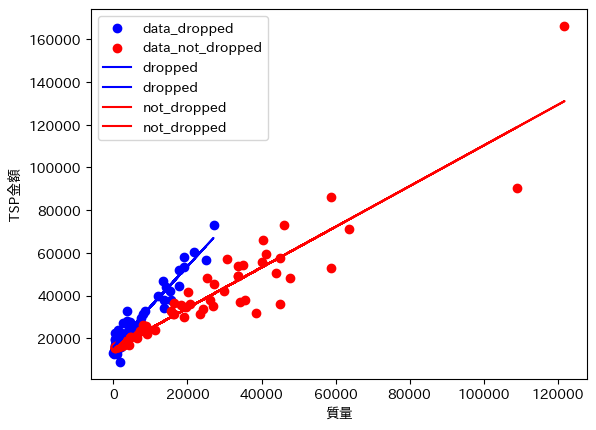

In [ ]:
# plt.figure(figsize=(20, 16))
# i=0
# x = sm.add_constant(df_list[0]["質量"])
# y = group2_Q["TSP金額"]

plt.scatter(sm.add_constant(df_list[0]["質量"])["質量"], df_list[0]["TSP金額"], color='blue',label="data_dropped")
plt.scatter(sm.add_constant(df_list[1]["質量"])["質量"], df_list[1]["TSP金額"], color='red',label="data_not_dropped")
plt.plot(sm.add_constant(df_list[0]["質量"]), sm.add_constant(df_list[0]["質量"]) * 1.889598 + 15870.724157, color='blue',label="dropped")
plt.plot(sm.add_constant(df_list[1]["質量"]), sm.add_constant(df_list[1]["質量"]) * 0.951555 + 15072.644588, color="red",label="not_dropped")

plt.xlabel('質量')
# plt.xlim(80000,)
plt.ylabel('TSP金額')
# plt.ylim(80000,)
# plt.legend(["data_all","data_most_frequent", "全データ回帰",f"peak{i}"] )
plt.legend()
plt.show()


In [ ]:
def plot_histogram(dataframe, column_name):
    # 指定された列のデータを取得
    x = dataframe[column_name]

    # ヒストグラムを描画
    plt.hist(x, bins='auto')

    # グラフにタイトルと軸ラベルを追加
    plt.title(f'Histogram {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')

    # グラフを表示
    plt.show()

In [ ]:
#いる？

df_dropped.iloc[:,31:-186]=df_dropped.iloc[:,31:-186].astype(float)

<ipython-input-89-a5754843a65a>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_dropped.iloc[:,31:-186]=df_dropped.iloc[:,31:-186].astype(float)


In [ ]:
#原材料～各工程原価

# df_dropped.iloc[:,31:-186]

In [ ]:
# plot_histogram(df_dropped, "歯大きさ")

In [ ]:
# plot_histogram(df_not_drop, "歯大きさ")

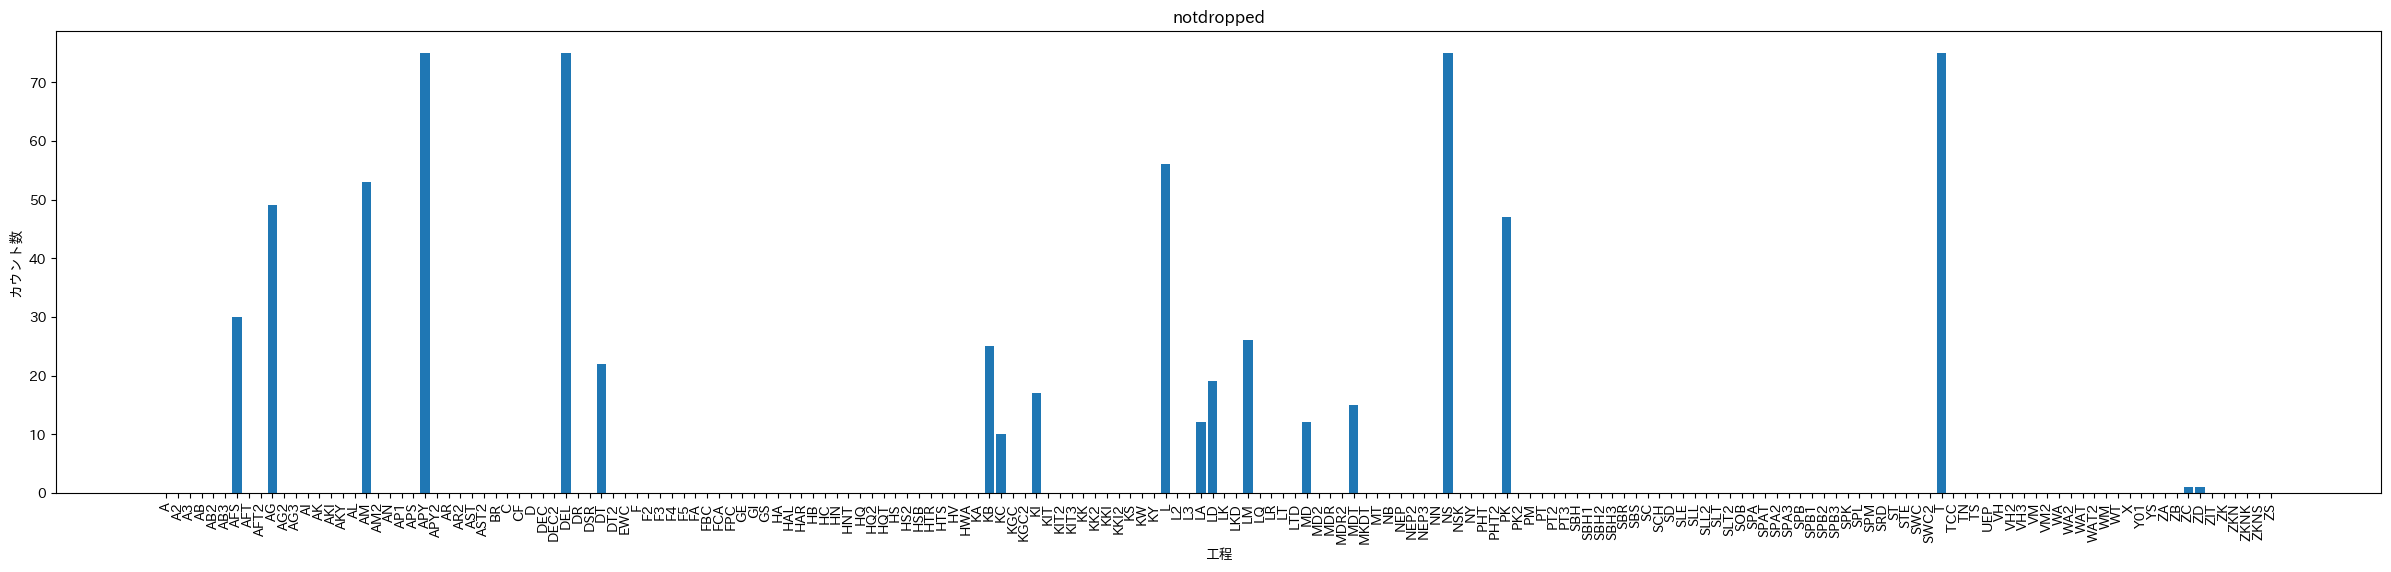

In [ ]:
#工程カウント

import matplotlib.pyplot as plt

def plot_ones_histogram(dataframe):
    plt.figure(figsize=(30, 6))
    # DataFrameの各列に対して1の数をカウント
    ones_counts = dataframe.iloc[:, 53:-4].sum()

    # ヒストグラムを描画
    plt.bar(ones_counts.index, ones_counts)

    # グラフにタイトルと軸ラベルを追加
    plt.title('notdropped')
    plt.xlabel('工程')
    plt.ylabel('カウント数')

    plt.xticks(rotation='vertical')
    # グラフを表示
    plt.show()

# 関数の使用例
plot_ones_histogram(df_not_drop)


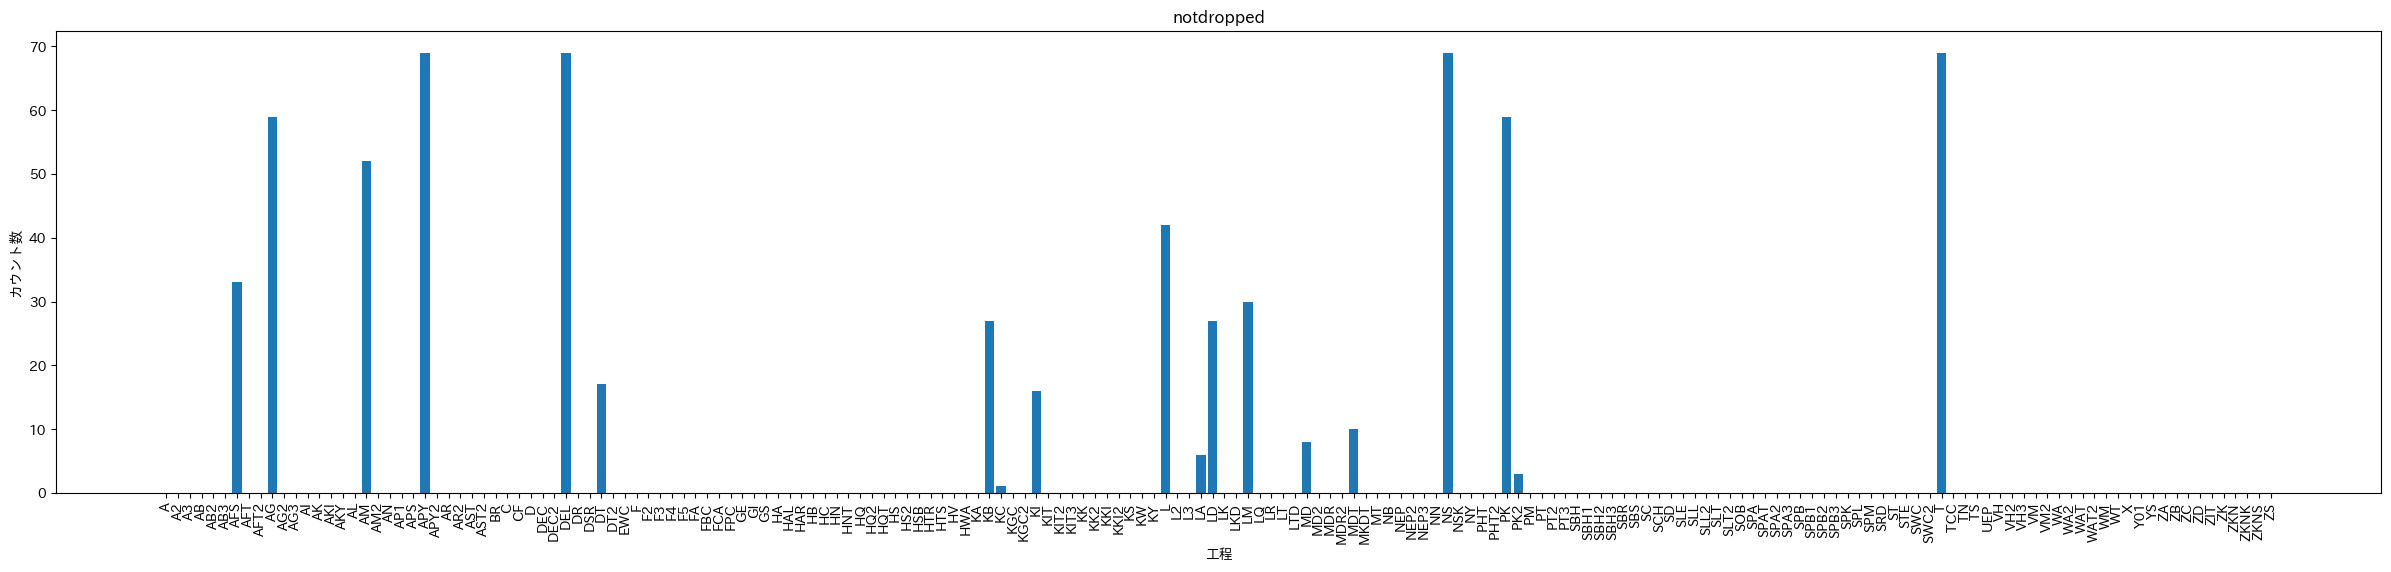

In [ ]:
plot_ones_histogram(df_dropped)

In [ ]:
# df_dropped.iloc[:,31:-186]
# df_not_drop.iloc[:,31:-187]

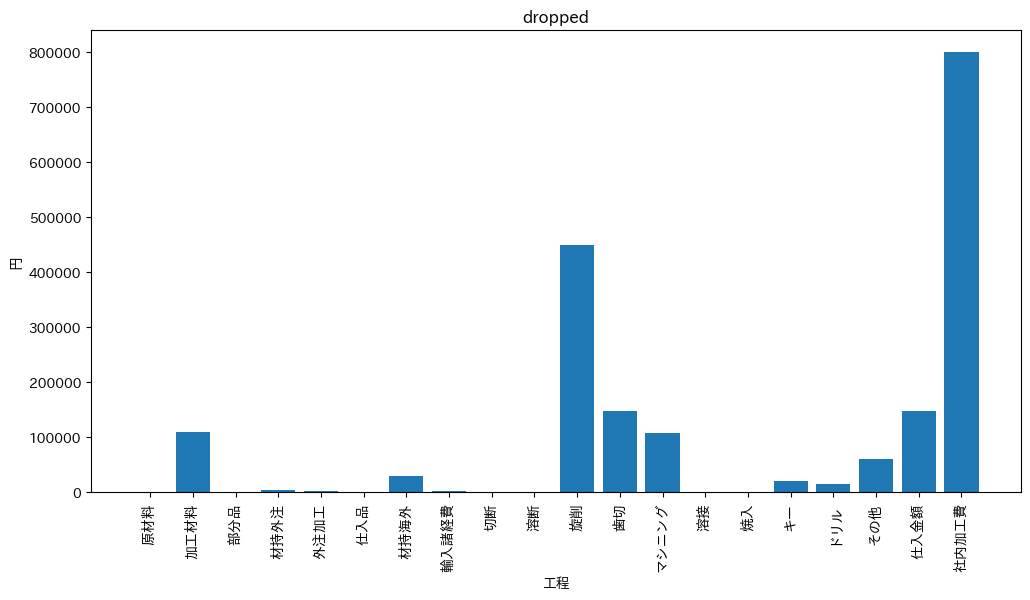

In [ ]:
import matplotlib.pyplot as plt

def plot_column_sums_histogram(dataframe):
    # 各列の合計を計算
    column_sums = dataframe.iloc[:, 31:-186].sum()
    # print(column_sums)
    # ヒストグラムを描画
    plt.figure(figsize=(12, 6))  # 画像サイズを設定
    plt.bar(column_sums.index, column_sums)

    # グラフにタイトルと軸ラベルを追加
    plt.title('dropped')
    plt.xlabel('工程')
    plt.ylabel('円')

    # x軸のラベルを立てる
    plt.xticks(rotation='vertical')

    # グラフを表示
    plt.show()

# 関数の使用例
plot_column_sums_histogram(df_dropped)


DC金額/TSP金額　（原価率）かけ

In [ ]:
# TSP_cost = group2_Q["TSP金額"].sum()
# D_cost = group2_Q["DC金額"].sum()

# #TSP金額から調整DC原価へ
# group2_Q["調整DC原価"]=group2_Q["TSP金額"]/(TSP_cost / D_cost)


# df_result=pd.DataFrame(columns=["peak","切片b","係数a","TSP調整切片b","TSP調整係数a","P-value","T-value","Adj. R-squared",
#                                 "Mean Absolute Error","Mean Squared Error","R2","intercept_","valuenum_"],index=range(2))

# #---------------------------質量・TSP金額---------------------------------
# x = group2_Q["質量"]
# y = group2_Q["TSP金額"]
# x = sm.add_constant(x)

# model = sm.OLS(y, x)
# results = model.fit()

# # print(results.summary())

# # TSP_cost = dataframes_list[df_count]["TSP金額"].sum()
# # D_cost = dataframes_list[df_count]["DC金額"].sum()
# df_result.iloc[0,1]=results.params[0]#切片b
# df_result.iloc[0,2]=results.params[1]#係数a
# df_result.iloc[0,3]=results.params[0]/(TSP_cost / D_cost)#TSP調整切片
# df_result.iloc[0,4]=results.params[1]/(TSP_cost / D_cost)#TSP調整係数
# df_result.iloc[0,5]=results.pvalues["質量"]#P-value
# df_result.iloc[0,6]=results.tvalues["質量"]#T-value
# df_result.iloc[0,7]=results.rsquared_adj#Adj. R-squared

# # モデルの結果を使用して予測値を計算
# y_pred = results.predict(x)

# # 評価指標を計算
# mae = mean_absolute_error(y, y_pred)
# mse = mean_squared_error(y, y_pred)
# r2 = r2_score(y, y_pred)
# df_result.iloc[0,8]=mae
# df_result.iloc[0,9]=mse
# df_result.iloc[0,10]=r2

# #---------------------------質量・調整DC原価---------------------------------
# x = group2_Q["質量"]
# y = group2_Q["調整DC原価"]
# x = sm.add_constant(x)

# model = sm.OLS(y, x)
# results = model.fit()

# # print(results.summary())

# df_result.iloc[1,1]=results.params[0]#切片b
# df_result.iloc[1,2]=results.params[1]#係数a
# # df_result.iloc[df_count,3]=results.params[0]/(TSP_cost / D_cost)#TSP調整切片
# # df_result.iloc[df_count,4]=results.params[1]/(TSP_cost / D_cost)#TSP調整係数
# df_result.iloc[1,5]=results.pvalues["質量"]#P-value
# df_result.iloc[1,6]=results.tvalues["質量"]#T-value
# df_result.iloc[1,7]=results.rsquared_adj#Adj. R-squared

# # モデルの結果を使用して予測値を計算
# y_pred = results.predict(x)

# # 評価指標を計算
# mae = mean_absolute_error(y, y_pred)
# mse = mean_squared_error(y, y_pred)
# r2 = r2_score(y, y_pred)
# df_result.iloc[1,8]=mae
# df_result.iloc[1,9]=mse
# df_result.iloc[1,10]=r2

# # plt.scatter(x["質量"], y, color='blue', label='Data')
# # plt.plot(x, x * df_result.iloc[df_count,2] + df_result.iloc[df_count,1], color='red')

# # plt.title("group"+str(df_count+1))
# # plt.xlabel('質量')
# # # plt.xlim(0,100000)
# # plt.ylabel('TSP金額')
# # # plt.ylim(0,800000)
# # plt.legend()
# # plt.show()

# df_result.to_csv('reslut.csv',encoding="cp932",index = False)
# files.download('reslut.csv')


In [ ]:
#  df_result

In [ ]:
# plt.scatter(sm.add_constant(group2_Q["質量"])["質量"], group2_Q["TSP金額"], color='blue', label='TSP金額')
# plt.plot(sm.add_constant(group2_Q["質量"]), sm.add_constant(group2_Q["質量"]) * 0.94899	 + 17876.437293, color='blue')

# plt.scatter(sm.add_constant(group2_Q["質量"])["質量"], group2_Q["調整DC原価"], color='red', label='DC原価')
# plt.plot(sm.add_constant(group2_Q["質量"]), sm.add_constant(group2_Q["質量"]) * 0.583706	 + 10995.470043, color='red')

# # plt.title("group"+str(df_count+1))
# plt.xlabel('質量')
# # # plt.xlim(0,100000)
# plt.ylabel('TSP金額(赤：調整DC原価)')
# # # plt.ylim(0,800000)
# plt.legend()
# plt.show()

**20231124データグループ確認用
（P14M,P8M）(歯数)（歯大きさ）**

型番名

In [ ]:
df_P14M=group2_Q[group2_Q["型番名"] == "P14M"].reset_index(drop=True)
df_P8M=group2_Q[group2_Q["型番名"] == "P8M"].reset_index(drop=True)
df_modelnumber_other=group2_Q[(group2_Q["型番名"] != "P14M") & (group2_Q["型番名"] != "P8M")].reset_index(drop=True)

In [ ]:
print(len(df_P14M))
print(len(df_P8M))
print(len(df_modelnumber_other))

44
65
35


In [ ]:
df_list_modelnumber=[df_P14M,df_P8M,df_modelnumber_other]
dataframes_list=df_list_modelnumber

df_result=pd.DataFrame(columns=["type","切片b","係数a","P-value","T-value","Adj. R-squared","Mean Absolute Error","Mean Squared Error","R2"],index=range(5))

for df_count in range(len(dataframes_list)):
  x = dataframes_list[df_count]["質量"]
  if len(x)>=2:
    y = dataframes_list[df_count]["TSP金額"]
    x = sm.add_constant(x)

    model = sm.OLS(y, x)
    results = model.fit()

    # TSP_cost = dataframes_list[df_count]["TSP金額"].sum()
    # D_cost = dataframes_list[df_count]["DC金額"].sum()
    df_result.iloc[df_count,0]=dataframes_list[df_count].loc[0,"型番名"]
    df_result.iloc[df_count,1]=results.params[0]#切片b
    df_result.iloc[df_count,2]=results.params[1]#係数a
    df_result.iloc[df_count,3]=results.pvalues["質量"]#P-value
    df_result.iloc[df_count,4]=results.tvalues["質量"]#T-value
    df_result.iloc[df_count,5]=results.rsquared_adj#Adj. R-squared

    # モデルの結果を使用して予測値を計算
    y_pred = results.predict(x)

    # 評価指標を計算
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    df_result.iloc[df_count,6]=mae
    df_result.iloc[df_count,7]=mse
    df_result.iloc[df_count,8]=r2

In [ ]:
df_result=df_result.dropna()
df_result.loc[2,"type"]="P5M+P3M"

<ipython-input-103-295a8767926c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result.loc[2,"type"]="P5M+P3M"


In [ ]:
df_result.to_csv('reslut.csv',encoding="cp932",index = False)
files.download('reslut.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# cmap = get_cmap('tab20')
list_color=["red","blue","green"]


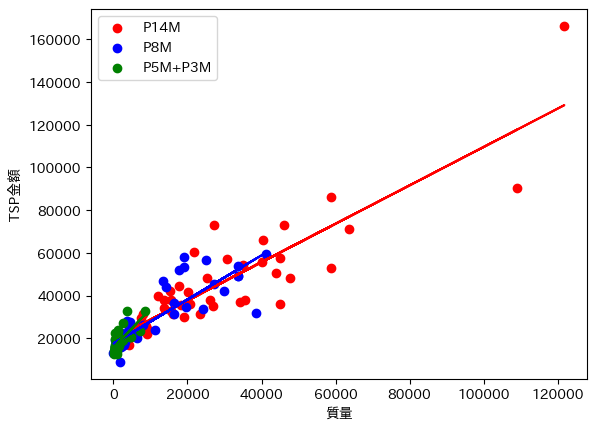

In [ ]:
for i in range(len(df_result)):
  plt.scatter(sm.add_constant(df_list_modelnumber[i]["質量"])["質量"], df_list_modelnumber[i]["TSP金額"], color=list_color[i], label=df_result.loc[i,"type"])
  plt.plot(sm.add_constant(df_list_modelnumber[i]["質量"]), sm.add_constant(df_list_modelnumber[i]["質量"]) * df_result.loc[i,"係数a"]	 + df_result.loc[i,"切片b"], color=list_color[i])

plt.xlabel('質量')
plt.ylabel('TSP金額')

plt.legend()
plt.show()

歯数

In [ ]:
#40 50

In [ ]:
df_tooth_30bigger=group2_Q[group2_Q["歯数"] > 30].reset_index(drop=True)
df_tooth_30smaller=group2_Q[group2_Q["歯数"] <= 30].reset_index(drop=True)
# df_tooth_40bigger=group2_Q[group2_Q["歯数"] > 40].reset_index(drop=True)
# df_tooth_40smaller=group2_Q[group2_Q["歯数"] <= 40].reset_index(drop=True)
# df_tooth_50bigger=group2_Q[group2_Q["歯数"] > 50].reset_index(drop=True)
# df_tooth_50smaller=group2_Q[group2_Q["歯数"] <= 50].reset_index(drop=True)

In [ ]:
print(len(df_tooth_40bigger))
print(len(df_tooth_40smaller))

NameError: name 'df_tooth_40bigger' is not defined

In [ ]:
# df_list=[df_tooth_40bigger,df_tooth_40smaller]
# df_list=[df_tooth_50bigger,df_tooth_50smaller]
df_list=[df_tooth_30bigger,df_tooth_30smaller]
dataframes_list=df_list

df_result=pd.DataFrame(columns=["type","切片b","係数a","P-value","T-value","Adj. R-squared","Mean Absolute Error","Mean Squared Error","R2"],index=range(5))

for df_count in range(len(dataframes_list)):
  x = dataframes_list[df_count]["質量"]
  if len(x)>=2:
    y = dataframes_list[df_count]["TSP金額"]
    x = sm.add_constant(x)

    model = sm.OLS(y, x)
    results = model.fit()

    # TSP_cost = dataframes_list[df_count]["TSP金額"].sum()
    # D_cost = dataframes_list[df_count]["DC金額"].sum()

    # list_typename=[">40","<=40"]
    # list_typename=[">50","<=50"]
    list_typename=[">30","<=30"]

    df_result.iloc[df_count,0]=list_typename[df_count]
    df_result.iloc[df_count,1]=results.params[0]#切片b
    df_result.iloc[df_count,2]=results.params[1]#係数a
    df_result.iloc[df_count,3]=results.pvalues["質量"]#P-value
    df_result.iloc[df_count,4]=results.tvalues["質量"]#T-value
    df_result.iloc[df_count,5]=results.rsquared_adj#Adj. R-squared

    # モデルの結果を使用して予測値を計算
    y_pred = results.predict(x)

    # 評価指標を計算
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    df_result.iloc[df_count,6]=mae
    df_result.iloc[df_count,7]=mse
    df_result.iloc[df_count,8]=r2

In [ ]:
df_result=df_result.dropna()
df_result

,type,切片b,係数a,P-value,T-value,Adj. R-squared,Mean Absolute Error,Mean Squared Error,R2
0,>30,18247.997413,0.939738,0.0,23.599583,0.81643,5911.088157,76679329.266348,0.817899
1,<=30,14790.168867,1.537359,0.0,8.578934,0.810264,1672.396201,4484680.35788,0.821425


In [ ]:
df_result.to_csv('reslut.csv',encoding="cp932",index = False)
files.download('reslut.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

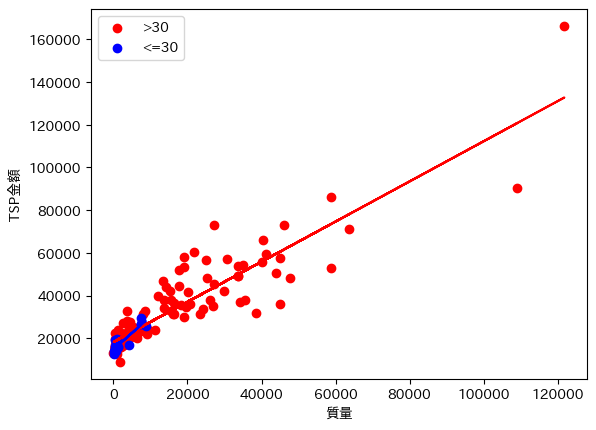

In [ ]:
for i in range(len(df_result)):
  plt.scatter(sm.add_constant(df_list[i]["質量"])["質量"], df_list[i]["TSP金額"], color=list_color[i], label=df_result.loc[i,"type"])
  plt.plot(sm.add_constant(df_list[i]["質量"]), sm.add_constant(df_list[i]["質量"]) * df_result.loc[i,"係数a"]	 + df_result.loc[i,"切片b"], color=list_color[i])

plt.xlabel('質量')
plt.ylabel('TSP金額')

plt.legend()
plt.show()

歯大きさ

In [ ]:
df_tooth_size_10bigger=group2_Q[group2_Q["歯大きさ"] > 10].reset_index(drop=True)
df_tooth_size_10smaller=group2_Q[group2_Q["歯大きさ"] <= 10].reset_index(drop=True)

In [ ]:
print(len(df_tooth_size_10bigger))
print(len(df_tooth_size_10smaller))

44
100


In [ ]:
df_list=[df_tooth_size_10bigger,df_tooth_size_10smaller]
dataframes_list=df_list

df_result=pd.DataFrame(columns=["type","切片b","係数a","P-value","T-value","Adj. R-squared","Mean Absolute Error","Mean Squared Error","R2"],index=range(5))

for df_count in range(len(dataframes_list)):
  x = dataframes_list[df_count]["質量"]
  if len(x)>=2:
    y = dataframes_list[df_count]["TSP金額"]
    x = sm.add_constant(x)

    model = sm.OLS(y, x)
    results = model.fit()

    # TSP_cost = dataframes_list[df_count]["TSP金額"].sum()
    # D_cost = dataframes_list[df_count]["DC金額"].sum()

    # list_typename=[">40","<=40"]
    # list_typename=[">50","<=50"]
    list_typename=[">10","<=10"]

    df_result.iloc[df_count,0]=list_typename[df_count]
    df_result.iloc[df_count,1]=results.params[0]#切片b
    df_result.iloc[df_count,2]=results.params[1]#係数a
    df_result.iloc[df_count,3]=results.pvalues["質量"]#P-value
    df_result.iloc[df_count,4]=results.tvalues["質量"]#T-value
    df_result.iloc[df_count,5]=results.rsquared_adj#Adj. R-squared

    # モデルの結果を使用して予測値を計算
    y_pred = results.predict(x)

    # 評価指標を計算
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    df_result.iloc[df_count,6]=mae
    df_result.iloc[df_count,7]=mse
    df_result.iloc[df_count,8]=r2

In [ ]:
df_result=df_result.dropna()
df_result

,type,切片b,係数a,P-value,T-value,Adj. R-squared,Mean Absolute Error,Mean Squared Error,R2
0,>10,19704.474645,0.898437,0.0,11.857542,0.764514,8757.61721,144311018.050355,0.769991
1,<=10,17069.808703,1.057772,0.0,17.134128,0.747177,3811.051228,33270221.865696,0.749731


In [ ]:
df_result.to_csv('reslut.csv',encoding="cp932",index = False)
files.download('reslut.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

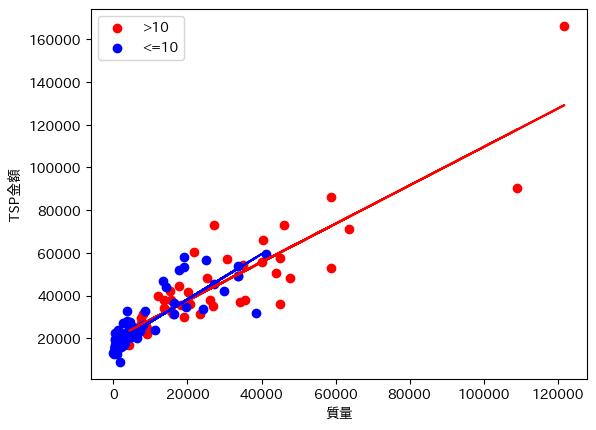

In [ ]:
for i in range(len(df_result)):
  plt.scatter(sm.add_constant(df_list[i]["質量"])["質量"], df_list[i]["TSP金額"], color=list_color[i], label=df_result.loc[i,"type"])
  plt.plot(sm.add_constant(df_list[i]["質量"]), sm.add_constant(df_list[i]["質量"]) * df_result.loc[i,"係数a"]	 + df_result.loc[i,"切片b"], color=list_color[i])

plt.xlabel('質量')
plt.ylabel('TSP金額')

plt.legend()
plt.show()

価格改定

In [ ]:
df_price_1=group2_Q[group2_Q["売上月"]<"2021-09-01"]
df_price_2=group2_Q[(group2_Q["売上月"]>="2021-09-01")&(group2_Q["売上月"]<"2022-10-01")]
# （価格改定は21/9と22/10の時点、10％程度上昇）

In [ ]:
print(len(df_price_1))
print(len(df_price_2))

62
82


In [ ]:
# df_price_2=df_price_2[df_price_2["質量"] <= 100000]
# df_price_2=df_price_2[df_price_2["型番名"] != "P3M"]
# df_price_2=df_price_2[df_price_2["型番名"] != "P5M"]

In [ ]:
df_list=[df_price_1,df_price_2]
dataframes_list=df_list

df_result=pd.DataFrame(columns=["type","切片b","係数a","P-value","T-value","Adj. R-squared","Mean Absolute Error","Mean Squared Error","R2"],index=range(5))

for df_count in range(len(dataframes_list)):
  x = dataframes_list[df_count]["質量"]
  if len(x)>=2:
    y = dataframes_list[df_count]["TSP金額"]
    x = sm.add_constant(x)

    model = sm.OLS(y, x)
    results = model.fit()

    # TSP_cost = dataframes_list[df_count]["TSP金額"].sum()
    # D_cost = dataframes_list[df_count]["DC金額"].sum()

    # list_typename=[">40","<=40"]
    # list_typename=[">50","<=50"]
    list_typename=["改定前","改定後"]

    df_result.iloc[df_count,0]=list_typename[df_count]
    df_result.iloc[df_count,1]=results.params[0]#切片b
    df_result.iloc[df_count,2]=results.params[1]#係数a
    df_result.iloc[df_count,3]=results.pvalues["質量"]#P-value
    df_result.iloc[df_count,4]=results.tvalues["質量"]#T-value
    df_result.iloc[df_count,5]=results.rsquared_adj#Adj. R-squared

    # モデルの結果を使用して予測値を計算
    y_pred = results.predict(x)

    # 評価指標を計算
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    df_result.iloc[df_count,6]=mae
    df_result.iloc[df_count,7]=mse
    df_result.iloc[df_count,8]=r2

In [ ]:
df_result=df_result.dropna()
df_result

,type,切片b,係数a,P-value,T-value,Adj. R-squared,Mean Absolute Error,Mean Squared Error,R2
0,改定前,17867.912576,0.782993,0.0,14.726808,0.779687,4801.552846,45761531.719019,0.783299
1,改定後,18591.875085,1.037841,0.0,22.971357,0.866707,5476.918032,69167554.805712,0.868352


In [ ]:
df_result.to_csv('reslut.csv',encoding="cp932",index = False)
files.download('reslut.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

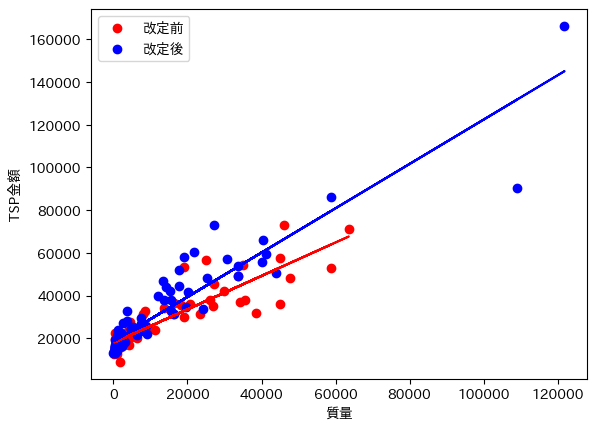

In [ ]:
for i in range(len(df_result)):
  plt.scatter(sm.add_constant(df_list[i]["質量"])["質量"], df_list[i]["TSP金額"], color=list_color[i], label=df_result.loc[i,"type"])
  plt.plot(sm.add_constant(df_list[i]["質量"]), sm.add_constant(df_list[i]["質量"]) * df_result.loc[i,"係数a"]	 + df_result.loc[i,"切片b"], color=list_color[i])

plt.xlabel('質量')
plt.ylabel('TSP金額')

plt.legend()
plt.show()

# **Bグループplot**

In [ ]:
df_groupB_1_1=pd.read_csv(input_path +"大形コンベヤスプロケット_アンローダー.csv",encoding="cp932")
df_groupB_1_2=pd.read_csv(input_path +"大形コンベヤスプロケット_エンジニアリング.csv",encoding="cp932")
df_groupB_1_3=pd.read_csv(input_path +"大形コンベヤスプロケット_シャフト組込み.csv",encoding="cp932")
df_groupB_1_4=pd.read_csv(input_path +"大形コンベヤスプロケット_リング替歯.csv",encoding="cp932")
df_groupB_1_5=pd.read_csv(input_path +"大形コンベヤスプロケット_水処理.csv",encoding="cp932")
df_groupB_1_6=pd.read_csv(input_path +"大形コンベヤスプロケット_替歯ブロック.csv",encoding="cp932")
df_groupB_1_7=pd.read_csv(input_path +"大形コンベヤスプロケット_分割.csv",encoding="cp932")
df_groupB_2_1=pd.read_csv(input_path +"ドライブスプロケットB_75歯以上.csv",encoding="cp932")
df_groupB_2_2=pd.read_csv(input_path +"ドライブスプロケットB_歯部サイズ違い.csv",encoding="cp932")
df_groupB_2_3=pd.read_csv(input_path +"ドライブスプロケットB_分割.csv",encoding="cp932")
dataframes_list_B1=[df_groupB_1_1,df_groupB_1_2,df_groupB_1_3,df_groupB_1_4,df_groupB_1_5,df_groupB_1_6,df_groupB_1_7]
dataframes_list_B2=[df_groupB_2_1,df_groupB_2_2,df_groupB_2_3]

In [ ]:
for i in dataframes_list_B1:
  print(len(i))

37
8
232
108
38
97
122


In [ ]:
for i in dataframes_list_B2:
  print(len(i))

170
68
42


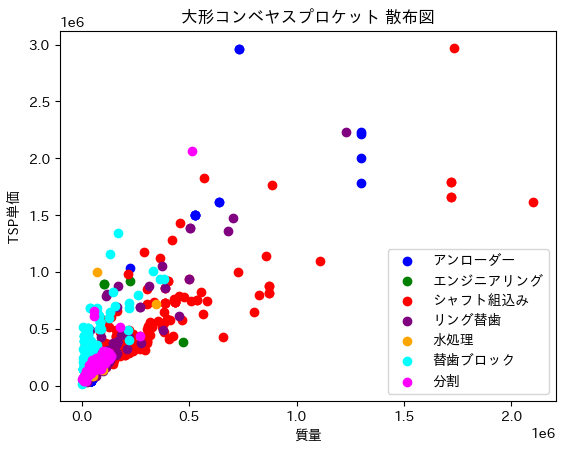

In [ ]:
plt.scatter(dataframes_list_B1[0]['質量'], dataframes_list_B1[0]['TSP単価'], color='blue', label='アンローダー')
plt.scatter(dataframes_list_B1[1]['質量'], dataframes_list_B1[1]['TSP単価'], color='green', label='エンジニアリング')
plt.scatter(dataframes_list_B1[2]['質量'], dataframes_list_B1[2]['TSP単価'], color='red', label='シャフト組込み')
plt.scatter(dataframes_list_B1[3]['質量'], dataframes_list_B1[3]['TSP単価'], color='purple', label='リング替歯')
plt.scatter(dataframes_list_B1[4]['質量'], dataframes_list_B1[4]['TSP単価'], color='orange', label='水処理')
plt.scatter(dataframes_list_B1[5]['質量'], dataframes_list_B1[5]['TSP単価'], color='cyan', label='替歯ブロック')
plt.scatter(dataframes_list_B1[6]['質量'], dataframes_list_B1[6]['TSP単価'], color='magenta', label='分割')

# グラフにタイトルと軸ラベルを追加
plt.title('大形コンベヤスプロケット 散布図')
plt.xlabel('質量')
plt.ylabel('TSP単価')

# 凡例を表示
plt.legend()

# グラフを表示
plt.show()

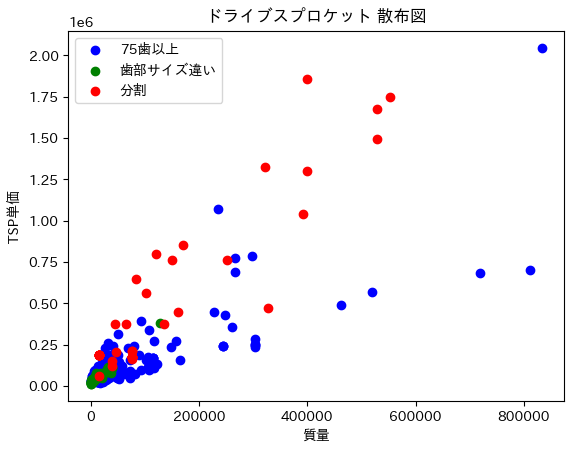

In [ ]:
plt.scatter(dataframes_list_B2[0]['質量'], dataframes_list_B2[0]['TSP単価'], color='blue', label='75歯以上')
plt.scatter(dataframes_list_B2[1]['質量'], dataframes_list_B2[1]['TSP単価'], color='green', label='歯部サイズ違い')
plt.scatter(dataframes_list_B2[2]['質量'], dataframes_list_B2[2]['TSP単価'], color='red', label='分割')

# グラフにタイトルと軸ラベルを追加
plt.title('ドライブスプロケット 散布図')
plt.xlabel('質量')
plt.ylabel('TSP単価')

# 凡例を表示
plt.legend()

# グラフを表示
plt.show()

分布、回帰直線

In [ ]:
output_directory = "output_images"
os.makedirs(output_directory, exist_ok=True)

#回帰、分布
df_result=pd.DataFrame(columns=["group","切片b","係数a","TSP調整切片b","TSP調整係数a","P-value","T-value","Adj. R-squared",
                                "Mean Absolute Error","Mean Squared Error","R2"],index=range(10))

# dataframes_list=dataframes_list_B1
dataframes_list=dataframes_list_B2

for df_count in range(len(dataframes_list)):
  x = dataframes_list[df_count]["質量"]
  df_result.iloc[df_count,0]="group"+str(df_count+1)
  if len(x)>=2:
    y = dataframes_list[df_count]["TSP単価"]
    x = sm.add_constant(x)

    model = sm.OLS(y, x)
    results = model.fit()

    # print(results.summary())

    TSP_cost = dataframes_list[df_count]["TSP単価"].sum()
    D_cost = dataframes_list[df_count]["DC金額"].sum()
    df_result.iloc[df_count,1]=results.params[0]#切片b
    df_result.iloc[df_count,2]=results.params[1]#係数a
    df_result.iloc[df_count,3]=results.params[0]/(TSP_cost / D_cost)#TSP調整切片
    df_result.iloc[df_count,4]=results.params[1]/(TSP_cost / D_cost)#TSP調整係数
    df_result.iloc[df_count,5]=results.pvalues["質量"]#P-value
    df_result.iloc[df_count,6]=results.tvalues["質量"]#T-value
    df_result.iloc[df_count,7]=results.rsquared_adj#Adj. R-squared

    # モデルの結果を使用して予測値を計算
    y_pred = results.predict(x)

    # 評価指標を計算
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    df_result.iloc[df_count,8]=mae
    df_result.iloc[df_count,9]=mse
    df_result.iloc[df_count,10]=r2

    plt.scatter(x["質量"], y, color='blue', label='Data')
    plt.plot(x, x * df_result.iloc[df_count,2] + df_result.iloc[df_count,1], color='red')

    plt.title("groupB 大形コンベヤスプロケット"+str(df_count+1))
    plt.xlabel('質量')
    # plt.xlim(0,100000)
    plt.ylabel('TSP単価')
    # plt.ylim(0,800000)
    plt.legend()

    #アウトプット
    image_filename = os.path.join(output_directory, f"groupB_graph_{df_count + 1}.png")
    plt.savefig(image_filename)
    plt.close()

    plt.show()
# Zipファイルにまとめてダウンロード
shutil.make_archive(output_directory, 'zip', output_directory)
# ダウンロード用のリンクを表示
zip_filename = f"{output_directory}.zip"
files.download(zip_filename)
# 画像保存ディレクトリを削除
shutil.rmtree(output_directory)

# df_result.to_csv('reslut.csv',encoding="cp932",index = False)
# files.download('reslut.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

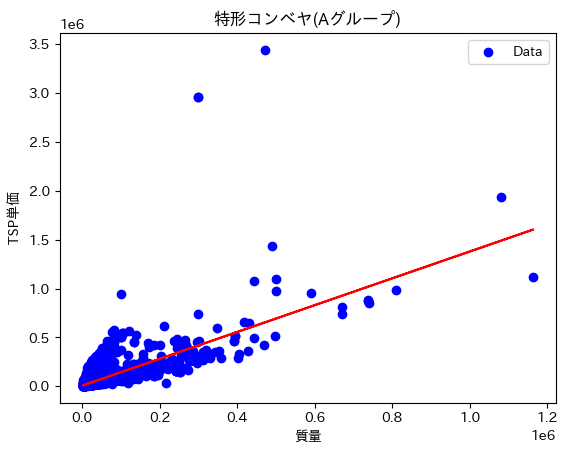

In [ ]:
y = df_groupB_A["TSP単価"]
x = sm.add_constant(df_groupB_A["質量"])

model = sm.OLS(y, x)
results = model.fit()

# print(results.summary())

TSP_cost = df_groupB_A["TSP単価"].sum()
D_cost = df_groupB_A["DC金額"].sum()
# df_result.iloc[df_count,1]=results.params[0]#切片b
# df_result.iloc[df_count,2]=results.params[1]#係数a
# df_result.iloc[df_count,3]=results.params[0]/(TSP_cost / D_cost)#TSP調整切片
# df_result.iloc[df_count,4]=results.params[1]/(TSP_cost / D_cost)#TSP調整係数
# df_result.iloc[df_count,5]=results.pvalues["質量"]#P-value
# df_result.iloc[df_count,6]=results.tvalues["質量"]#T-value
# df_result.iloc[df_count,7]=results.rsquared_adj#Adj. R-squared

# モデルの結果を使用して予測値を計算
y_pred = results.predict(x)

# 評価指標を計算
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
# df_result.iloc[df_count,8]=mae
# df_result.iloc[df_count,9]=mse
# df_result.iloc[df_count,10]=r2

plt.scatter(x["質量"], y, color='blue', label='Data')
plt.plot(x, x * results.params[1] + results.params[0], color='red')

plt.title("特形コンベヤ(Aグループ)")
plt.xlabel('質量')
# plt.xlim(0,100000)
plt.ylabel('TSP単価')
# plt.ylim(0,800000)
plt.legend()
plt.show()

度数-質量

In [ ]:
# dataframes_list=dataframes_list_B1
dataframes_list=dataframes_list_B2
# 大型コンベヤスプロケット
# ドライブスプロケット

output_directory = "output_images"
os.makedirs(output_directory, exist_ok=True)

for i in range(len(dataframes_list)):
  plt.hist(dataframes_list[i]["質量"], bins=30)
  plt.title("ドライブスプロケット"+str(i+1)+"質量度数分布")
  plt.xlabel('質量')
  plt.ylabel('頻度')

  #アウトプット
  image_filename = os.path.join(output_directory, f"groupB2_graph_{i + 1}.png")
  plt.savefig(image_filename)
  plt.close()

# Zipファイルにまとめてダウンロード
shutil.make_archive(output_directory, 'zip', output_directory)
# ダウンロード用のリンクを表示
zip_filename = f"{output_directory}.zip"
files.download(zip_filename)
# 画像保存ディレクトリを削除
shutil.rmtree(output_directory)
# plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

度数-材質

In [ ]:
#材質
dataframes_list=dataframes_list_B1
# dataframes_list=dataframes_list_B2
# 大型コンベヤスプロケット
# ドライブスプロケット

output_directory = "output_images"
os.makedirs(output_directory, exist_ok=True)

for i in range(len(dataframes_list)):
  plt.hist(dataframes_list[i]["材質"], bins=30)
  plt.title("大型コンベヤスプロケット"+str(i+1)+"材質分布")
  plt.xlabel('材質')
  plt.xticks(rotation='vertical')
  plt.ylabel('頻度')
  plt.subplots_adjust(bottom=0.35)

  #アウトプット
  image_filename = os.path.join(output_directory, f"groupB_graph_{i + 1}.png")
  plt.savefig(image_filename)
  plt.close()

# Zipファイルにまとめてダウンロード
shutil.make_archive(output_directory, 'zip', output_directory)
# ダウンロード用のリンクを表示
zip_filename = f"{output_directory}.zip"
files.download(zip_filename)
# 画像保存ディレクトリを削除
shutil.rmtree(output_directory)
# plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# dataframes_list=dataframes_list_B1
dataframes_list=dataframes_list_B2
for i in range(len(dataframes_list)):
  dataframes_list[i]["TSP単価/質量"]=dataframes_list[i]["TSP単価"]/dataframes_list[i]["質量"]

In [ ]:
#Yen/g
# dataframes_list=dataframes_list_B1
dataframes_list=dataframes_list_B2
# 大型コンベヤスプロケット
# ドライブスプロケット

output_directory = "output_images"
os.makedirs(output_directory, exist_ok=True)

for i in range(len(dataframes_list)):
  plt.hist(dataframes_list[i]["TSP単価/質量"], bins=30)
  plt.title("大型コンベヤスプロケット"+str(i+1)+"TSP単価/質量分布")
  plt.xlabel('TSP単価/質量')
  # plt.xticks(rotation='vertical')
  plt.ylabel('頻度')
  # plt.subplots_adjust(bottom=0.35)

  #アウトプット
  image_filename = os.path.join(output_directory, f"groupB2_graph_{i + 1}.png")
  plt.savefig(image_filename)
  plt.close()

# Zipファイルにまとめてダウンロード
shutil.make_archive(output_directory, 'zip', output_directory)
# ダウンロード用のリンクを表示
zip_filename = f"{output_directory}.zip"
files.download(zip_filename)
# 画像保存ディレクトリを削除
shutil.rmtree(output_directory)
# plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **BグループAR、R分けplot**

In [ ]:
df_groupB_1_1_AR = df_groupB_1_1[df_groupB_1_1["見積番号"].str.contains("AR")]
df_groupB_1_1_R = df_groupB_1_1[~df_groupB_1_1["見積番号"].str.contains("AR")]
df_groupB_1_2_AR = df_groupB_1_2[df_groupB_1_2["見積番号"].str.contains("AR")]
df_groupB_1_2_R = df_groupB_1_2[~df_groupB_1_2["見積番号"].str.contains("AR")]
df_groupB_1_3_AR = df_groupB_1_3[df_groupB_1_3["見積番号"].str.contains("AR")]
df_groupB_1_3_R = df_groupB_1_3[~df_groupB_1_3["見積番号"].str.contains("AR")]
df_groupB_1_4_AR = df_groupB_1_4[df_groupB_1_4["見積番号"].str.contains("AR")]
df_groupB_1_4_R = df_groupB_1_4[~df_groupB_1_4["見積番号"].str.contains("AR")]
df_groupB_1_5_AR = df_groupB_1_5[df_groupB_1_5["見積番号"].str.contains("AR")]
df_groupB_1_5_R = df_groupB_1_5[~df_groupB_1_5["見積番号"].str.contains("AR")]
df_groupB_1_6_AR = df_groupB_1_6[df_groupB_1_6["見積番号"].str.contains("AR")]
df_groupB_1_6_R = df_groupB_1_6[~df_groupB_1_6["見積番号"].str.contains("AR")]
df_groupB_1_7_AR = df_groupB_1_7[df_groupB_1_7["見積番号"].str.contains("AR")]
df_groupB_1_7_R = df_groupB_1_7[~df_groupB_1_7["見積番号"].str.contains("AR")]

df_groupB_2_1_AR = df_groupB_2_1[df_groupB_2_1["見積番号"].str.contains("AR")]
df_groupB_2_1_R = df_groupB_2_1[~df_groupB_2_1["見積番号"].str.contains("AR")]
df_groupB_2_2_AR = df_groupB_2_2[df_groupB_2_2["見積番号"].str.contains("AR")]
df_groupB_2_2_R = df_groupB_2_2[~df_groupB_2_2["見積番号"].str.contains("AR")]
df_groupB_2_3_AR = df_groupB_2_3[df_groupB_2_3["見積番号"].str.contains("AR")]
df_groupB_2_3_R = df_groupB_2_3[~df_groupB_2_3["見積番号"].str.contains("AR")]

df_groupB_1_AR=[df_groupB_1_1_AR,df_groupB_1_2_AR,df_groupB_1_3_AR,df_groupB_1_4_AR,df_groupB_1_5_AR,df_groupB_1_6_AR,df_groupB_1_7_AR]
df_groupB_1_R=[df_groupB_1_1_R,df_groupB_1_2_R,df_groupB_1_3_R,df_groupB_1_4_R,df_groupB_1_5_R,df_groupB_1_6_R,df_groupB_1_7_R]
df_groupB_2_AR=[df_groupB_2_1_AR,df_groupB_2_2_AR,df_groupB_2_3_AR]
df_groupB_2_R=[df_groupB_2_1_R,df_groupB_2_2_R,df_groupB_2_3_R]

In [ ]:
output_directory = "output_images"
os.makedirs(output_directory, exist_ok=True)

#回帰、分布
df_result=pd.DataFrame(columns=["group","切片b","係数a","TSP調整切片b","TSP調整係数a","P-value","T-value","Adj. R-squared",
                                "Mean Absolute Error","Mean Squared Error","R2"],index=range(10))

# dataframes_list=df_groupB_1_AR
# dataframes_list=df_groupB_1_R
# dataframes_list=df_groupB_2_AR
dataframes_list=df_groupB_2_R

for df_count in range(len(dataframes_list)):
  x = dataframes_list[df_count]["質量"]
  df_result.iloc[df_count,0]="group"+str(df_count+1)
  if len(x)>=2:
    y = dataframes_list[df_count]["TSP単価"]
    x = sm.add_constant(x)

    model = sm.OLS(y, x)
    results = model.fit()

    # print(results.summary())

    TSP_cost = dataframes_list[df_count]["TSP単価"].sum()
    D_cost = dataframes_list[df_count]["DC金額"].sum()
    df_result.iloc[df_count,1]=results.params[0]#切片b
    df_result.iloc[df_count,2]=results.params[1]#係数a
    df_result.iloc[df_count,3]=results.params[0]/(TSP_cost / D_cost)#TSP調整切片
    df_result.iloc[df_count,4]=results.params[1]/(TSP_cost / D_cost)#TSP調整係数
    df_result.iloc[df_count,5]=results.pvalues["質量"]#P-value
    df_result.iloc[df_count,6]=results.tvalues["質量"]#T-value
    df_result.iloc[df_count,7]=results.rsquared_adj#Adj. R-squared

    # モデルの結果を使用して予測値を計算
    y_pred = results.predict(x)

    # 評価指標を計算
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    df_result.iloc[df_count,8]=mae
    df_result.iloc[df_count,9]=mse
    df_result.iloc[df_count,10]=r2

    plt.scatter(x["質量"], y, color='blue', label='Data')
    plt.plot(x, x * df_result.iloc[df_count,2] + df_result.iloc[df_count,1], color='red')

    plt.title("groupB 大形コンベヤスプロケット"+str(df_count+1))
    #ドライブスプロケット
    plt.xlabel('質量')
    # plt.xlim(0,100000)
    plt.ylabel('TSP単価')
    # plt.ylim(0,800000)
    plt.legend()

    #アウトプット
    image_filename = os.path.join(output_directory, f"groupB_graph_{df_count + 1}.png")
    plt.savefig(image_filename)
    plt.close()

    plt.show()
# Zipファイルにまとめてダウンロード
shutil.make_archive(output_directory, 'zip', output_directory)
# ダウンロード用のリンクを表示
zip_filename = f"{output_directory}.zip"
files.download(zip_filename)
# 画像保存ディレクトリを削除
shutil.rmtree(output_directory)

df_result.to_csv('reslut.csv',encoding="cp932",index = False)
files.download('reslut.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **GroupB_simulation**

**function**

In [ ]:
def regression_plot(df,title):
  #回帰モデルで切片計算
  y = df["TSP単価"]
  x = sm.add_constant(df["質量"])

  model = sm.OLS(y, x)
  results = model.fit()

  results.params[0]#切片b
  results.params[1]#係数a
  y_pred = results.predict(x)
  r2 = r2_score(y, y_pred)
  print(results.params[0],results.params[1],r2)
  print(results.pvalues["質量"],results.tvalues["質量"])#P-valueT-value

  plt.scatter(x["質量"], y, color='blue', label='Data')
  plt.plot(x, x * results.params[1] + results.params[0], color='red')

  plt.title(title)
  plt.xlabel('質量')
  plt.ylabel('TSP単価')
  plt.legend()

def regression_plot_double(df1,df2,title,data1,data2):
  y = df1["TSP単価"]
  x = sm.add_constant(df1["質量"])

model = sm.OLS(y, x)
results = model.fit()

results.params[0]#切片b
results.params[1]#係数a
y_pred = results.predict(x)
r2 = r2_score(y, y_pred)
print(results.params[0],results.params[1],r2)
print(results.pvalues["質量"],results.tvalues["質量"])#P-valueT-value

plt.scatter(x["質量"], y, color='blue', label=data1)
plt.plot(x, x * results.params[1] + results.params[0], color='blue')

y = df2["TSP単価"]
x = sm.add_constant(df2["質量"])

model = sm.OLS(y, x)
results = model.fit()

results.params[0]#切片b
results.params[1]#係数a
y_pred = results.predict(x)
r2 = r2_score(y, y_pred)
print(results.params[0],results.params[1],r2)
print(results.pvalues["質量"],results.tvalues["質量"])#P-valueT-value

plt.scatter(x["質量"], y, color='red', label=data2)
plt.plot(x, x * results.params[1] + results.params[0], color='red')

plt.title(title)
plt.xlabel('質量')
plt.ylabel('TSP単価')
plt.legend()

142014.88414232584 1.2805299077306636 0.24441582575177412
0.04366421548778007 2.202768535632071


NameError: name 'data1' is not defined

**data整理**

In [ ]:
dataframes_list_B1=[df_groupB_1_1,df_groupB_1_2,df_groupB_1_3,df_groupB_1_4,df_groupB_1_5,df_groupB_1_6,df_groupB_1_7]
dataframes_list_B2=[df_groupB_2_1,df_groupB_2_2,df_groupB_2_3]

df_B1 = pd.concat(dataframes_list_B1, axis=0)
# dataframes_list_B2を結合
df_B2 = pd.concat(dataframes_list_B2, axis=0)
# df_B1とdf_B2を結合
df_B = pd.concat([df_B1, df_B2], axis=0)

#割引あり
df_B_AR = df_B[df_B["見積番号"].str.contains("AR")]
#割引なし
df_B_R = df_B[~df_B["見積番号"].str.contains("AR")]

#割引なし修正
df_B_AR_changed_rate3 = df_B_AR
df_B_AR_changed_rate3["TSP単価"] = df_B_AR_changed_rate3["TSP単価"]/0.97
#割引修正
df_B_changed_rate3 = pd.concat([df_B_R, df_B_AR_changed_rate3], axis=0)

df_B["売上月"] = pd.to_datetime(df_B["売上月"], format="%Y/%m/%d")
df_B_price_1=df_B[df_B["売上月"]<"2021-09-01"]
df_B_price_2=df_B[(df_B["売上月"]>="2021-09-01")&(df_B["売上月"]<"2022-10-01")]
# （価格改定は21/9と22/10の時点、10％程度上昇）
#価格改定修正
df_B_price_2["TSP単価"]=df_B_price_2["TSP単価"]*0.9
df_B_price=pd.concat([df_B_price_1,df_B_price_2],axis=0)

#割引あり
df_B_price_1_AR = df_B_price_1[df_B_price_1["見積番号"].str.contains("AR")]
#割引なし
df_B_price_1_R = df_B_price_1[~df_B_price_1["見積番号"].str.contains("AR")]
#割引あり
df_B_price_2_AR = df_B_price_2[df_B_price_2["見積番号"].str.contains("AR")]
#割引なし
df_B_price_2_R = df_B_price_2[~df_B_price_2["見積番号"].str.contains("AR")]

<ipython-input-144-56d7954c5865>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B_AR_changed_rate3["TSP単価"] = df_B_AR_changed_rate3["TSP単価"]/0.97
<ipython-input-144-56d7954c5865>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B_price_2["TSP単価"]=df_B_price_2["TSP単価"]*0.9


In [ ]:
len(df_B_price_2_R)

147

In [ ]:
# 単価を使って、計算した。
# 複数商品販売した場合に、割引が入っている可能性があるので、単価の差はどう修正すべき？
#
# 割引なしのものは1つのものが多い？

In [ ]:
# #Aグループ
# # df_pulleyA=df_pulleyA[df_pulleyA["TSP単価"]<1000000]
# #割引分け
# df_A_AR = df_pulleyA[df_pulleyA["見積番号"].str.contains("AQ")]
# df_A_R = df_pulleyA[~df_pulleyA["見積番号"].str.contains("AQ")]
# #割引修正
# df_A_AR_changed_rate3 = df_A_AR
# df_A_AR_changed_rate3["TSP単価"] = df_A_AR_changed_rate3["TSP単価"]/0.97
# df_A_changed_rate3 = pd.concat([df_A_R, df_A_AR_changed_rate3], axis=0)
# #価格改定分け
# # df_pulleyA["売上月"] = pd.to_datetime(df_pulleyA["売上月"], format="%Y/%m/%d")
# df_A_price_1=df_pulleyA[df_pulleyA["売上月"]<"2021-09-01"]
# df_A_price_2=df_pulleyA[(df_pulleyA["売上月"]>="2021-09-01")&(df_pulleyA["売上月"]<"2022-10-01")]
# # （価格改定は21/9と22/10の時点、10％程度上昇）
# #価格改定修正
# df_A_price_2["TSP単価"]=df_A_price_2["TSP単価"]*0.9
# df_A_price=pd.concat([df_A_price_1,df_A_price_2],axis=0)

**plot**

In [ ]:
#価格改定修正&未修正

In [ ]:
regression_plot(df_A_changed_rate3,"GroupA（2値削除）（割引あり修正）")

NameError: name 'df_A_changed_rate3' is not defined

In [ ]:
len(df_pulleyA)

573

In [ ]:
regression_plot_double(df_A_AR,df_A_R,"GroupA","割引あり（修正済み）","割引なし")

NameError: name 'df_A_AR' is not defined

In [ ]:
regression_plot_double(df_A_price_1,df_A_price_2,"価格改定","改定前","改定後")

NameError: name 'df_A_price_1' is not defined

**similation**

In [ ]:
len(df_B_R)

388

92179.00055053845 1.5830293179080686 0.7465893911321391
4.0703340412467625e-117 33.72268635853318


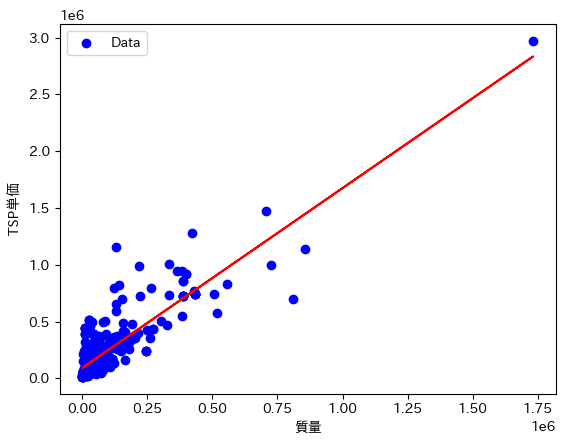

In [ ]:
regression_plot(df_B_R,"")

In [ ]:
df_result_b=pd.DataFrame(columns=["intercept","度数","start","end"],index=range(30000))

In [ ]:
df_result_b=pd.DataFrame(columns=["intercept","度数","start","end"],index=range(30000))

df_simulation=df_B_price_2_R
#B割引なし全体シミュレーション

intercept=92179.00055053845

k=0

for i in np.arange(intercept - 90000, intercept+90000, 10):
  # 計算
  df_simulation["(TSP単価-切片)/質量"] = (df_simulation["TSP単価"] - i) / df_simulation["質量"]

  # ビンの幅を指定
  bin_width = 1

  # データ範囲を計算
  data_min = min(df_simulation["(TSP単価-切片)/質量"])
  data_max = max(df_simulation["(TSP単価-切片)/質量"])

  # ビンの境界を生成
  bins = np.arange(data_min, data_max + bin_width, bin_width)
  # ヒストグラムの計算
  hist, bin_edges = np.histogram(df_simulation["(TSP単価-切片)/質量"], bins=bins)
  # 最大のデータ数とそのデータ範囲を取得
  max_count = max(hist)
  max_bin_index = np.argmax(hist)

  # データ範囲の開始と終了を取得
  bin_start = bin_edges[max_bin_index]
  bin_end = bin_edges[max_bin_index + 1]

  # DataFrameに保存
  df_result_b.loc[k, "intercept"] = i
  df_result_b.loc[k, "度数"] = max_count
  df_result_b.loc[k, "start"] = bin_start
  df_result_b.loc[k, "end"] = bin_end

  k+=1

  # print(i)
  # print(max_count)
  # print(bin_start)
  # print(bin_end)
# 結果を表示
print(df_result_b)


<ipython-input-156-082add375b6f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simulation["(TSP単価-切片)/質量"] = (df_simulation["TSP単価"] - i) / df_simulation["質量"]


         intercept   度数     start       end
0      2179.000551   41  1.800395  2.800395
1      2189.000551   41  1.800302  2.800302
2      2199.000551   41  1.800209  2.800209
3      2209.000551   41  1.800116  2.800116
4      2219.000551   41  1.800023  2.800023
...            ...  ...       ...       ...
29995          NaN  NaN       NaN       NaN
29996          NaN  NaN       NaN       NaN
29997          NaN  NaN       NaN       NaN
29998          NaN  NaN       NaN       NaN
29999          NaN  NaN       NaN       NaN

[30000 rows x 4 columns]


In [ ]:
df_result_b.to_csv('reslut.csv',encoding="cp932",index = False)
files.download('reslut.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_result_b=df_result_b.dropna()

In [ ]:
df_result_b

,intercept,度数,start,end
0,2179.000551,41,1.800395,2.800395
1,2189.000551,41,1.800302,2.800302
2,2199.000551,41,1.800209,2.800209
3,2209.000551,41,1.800116,2.800116
4,2219.000551,41,1.800023,2.800023
...,...,...,...,...
17995,182129.000551,24,0.53294,1.53294
17996,182139.000551,22,0.518234,1.518234
17997,182149.000551,22,0.503529,1.503529
17998,182159.000551,21,-0.511177,0.488823


Text(0, 0.5, '度数')

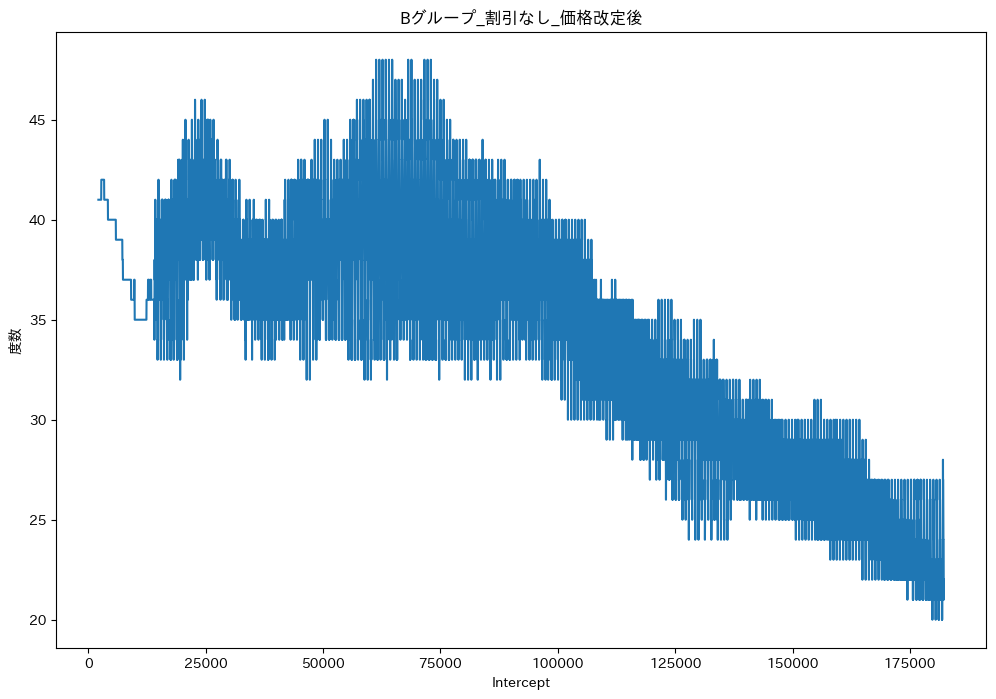

In [ ]:
# 折れ線グラフの描画
plt.figure(figsize=(12, 8))
plt.plot(df_result_b['intercept'], df_result_b['度数'],  linestyle='-')

# グラフの装飾
plt.title('Bグループ_割引なし_価格改定後')
plt.xlabel('Intercept')
plt.ylabel('度数')

In [ ]:
df_peak=df_result_b[df_result_b["度数"]==df_result_b["度数"].max()]
# df_peak=df_peak.reset_index(drop=True)
# df_peak=df_peak.iloc[212:,]
df_peak=df_peak.reset_index(drop=True)
df_peak

,intercept,度数,start,end
0,61309.000551,48,1.209411,2.209411
1,61989.000551,48,1.209411,2.209411
2,62679.000551,48,1.194705,2.194705
3,63359.000551,48,1.194705,2.194705
4,64039.000551,48,1.194705,2.194705
5,64049.000551,48,1.179999,2.179999
6,64719.000551,48,1.194705,2.194705
7,64729.000551,48,1.179999,2.179999
8,68139.000551,48,1.165293,2.165293
9,68829.000551,48,1.150587,2.150587


In [ ]:
df_peak=df_peak.reset_index(drop=True)

In [ ]:
df_peak

,intercept,度数,start,end
0,61309.000551,48,1.209411,2.209411
1,61989.000551,48,1.209411,2.209411
2,62679.000551,48,1.194705,2.194705
3,63359.000551,48,1.194705,2.194705
4,64039.000551,48,1.194705,2.194705
5,64049.000551,48,1.179999,2.179999
6,64719.000551,48,1.194705,2.194705
7,64729.000551,48,1.179999,2.179999
8,68139.000551,48,1.165293,2.165293
9,68829.000551,48,1.150587,2.150587


In [ ]:
#データ参照
# intercept=results.params[0]
intercept_list=df_peak["intercept"].tolist()
df_list=[]
for i in range(len(df_peak)):
  df_simulation["(TSP単価-切片)/質量"] = (df_simulation["TSP単価"] - df_peak.loc[i,"intercept"]) / df_simulation["質量"]

  most_frequent_data = df_simulation[(df_simulation["(TSP単価-切片)/質量"] >= df_peak.loc[i,"start"]) & (df_simulation["(TSP単価-切片)/質量"]  < df_peak.loc[i,"end"])]
  most_frequent_data = most_frequent_data#.reset_index(drop=True)
  df_list.append(most_frequent_data)
  # 結果を表示

  # print("intercept：",df_peak.loc[i,"intercept"],"度数",df_peak.loc[i,"度数"],len(most_frequent_data))

<ipython-input-164-24e8743c7eb2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simulation["(TSP単価-切片)/質量"] = (df_simulation["TSP単価"] - df_peak.loc[i,"intercept"]) / df_simulation["質量"]


In [ ]:
df_result=pd.DataFrame(columns=["peak","切片b","係数a","TSP調整切片b","TSP調整係数a","P-value","T-value","Adj. R-squared",
                                "Mean Absolute Error","Mean Squared Error","R2","intercept_","valuenum_"],index=range(len(df_peak)))

dataframes_list=df_list

for df_count in range(len(dataframes_list)):
  x = dataframes_list[df_count]["質量"]
  df_result.iloc[df_count,0]="peak"+str(df_count+1)
  if len(x)>=2:
    y = dataframes_list[df_count]["TSP単価"]
    x = sm.add_constant(x)

    model = sm.OLS(y, x)
    results = model.fit()

    # print(results.summary())

    # TSP_cost = dataframes_list[df_count]["TSP金額"].sum()
    # D_cost = dataframes_list[df_count]["DC金額"].sum()
    df_result.iloc[df_count,1]=results.params[0]#切片b
    df_result.iloc[df_count,2]=results.params[1]#係数a
    # df_result.iloc[df_count,3]=results.params[0]/(TSP_cost / D_cost)#TSP調整切片
    # df_result.iloc[df_count,4]=results.params[1]/(TSP_cost / D_cost)#TSP調整係数
    df_result.iloc[df_count,5]=results.pvalues["質量"]#P-value
    df_result.iloc[df_count,6]=results.tvalues["質量"]#T-value
    df_result.iloc[df_count,7]=results.rsquared_adj#Adj. R-squared

    # モデルの結果を使用して予測値を計算
    y_pred = results.predict(x)

    # 評価指標を計算
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    df_result.iloc[df_count,8]=mae
    df_result.iloc[df_count,9]=mse
    df_result.iloc[df_count,10]=r2
    df_result.iloc[df_count,11]=df_peak.loc[df_count,"intercept"]
    df_result.iloc[df_count,12]=df_peak.loc[df_count,"度数"]

df_result

,peak,切片b,係数a,TSP調整切片b,TSP調整係数a,P-value,T-value,Adj. R-squared,Mean Absolute Error,Mean Squared Error,R2,intercept_,valuenum_
0,peak1,82953.671207,1.534922,NaN,NaN,0.0,40.310721,0.971872,47249.459397,4769244743.728812,0.972471,61309.000551,48
1,peak2,82953.671207,1.534922,NaN,NaN,0.0,40.310721,0.971872,47249.459397,4769244743.728812,0.972471,61989.000551,48
2,peak3,82953.671207,1.534922,NaN,NaN,0.0,40.310721,0.971872,47249.459397,4769244743.728812,0.972471,62679.000551,48
3,peak4,82953.671207,1.534922,NaN,NaN,0.0,40.310721,0.971872,47249.459397,4769244743.728812,0.972471,63359.000551,48
4,peak5,82953.671207,1.534922,NaN,NaN,0.0,40.310721,0.971872,47249.459397,4769244743.728812,0.972471,64039.000551,48
5,peak6,82953.671207,1.534922,NaN,NaN,0.0,40.310721,0.971872,47249.459397,4769244743.728812,0.972471,64049.000551,48
6,peak7,82953.671207,1.534922,NaN,NaN,0.0,40.310721,0.971872,47249.459397,4769244743.728812,0.972471,64719.000551,48
7,peak8,82953.671207,1.534922,NaN,NaN,0.0,40.310721,0.971872,47249.459397,4769244743.728812,0.972471,64729.000551,48
8,peak9,84217.104147,1.532886,NaN,NaN,0.0,40.276302,0.971826,47173.442673,4754627603.958559,0.972425,68139.000551,48
9,peak10,84217.104147,1.532886,NaN,NaN,0.0,40.276302,0.971826,47173.442673,4754627603.958559,0.972425,68829.000551,48


In [ ]:
df_result.to_csv('result.csv',encoding="cp932",index = False)
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#17876.43729289389 0.9489897509183529

df_simulation=df_simulation.reset_index(drop=True)
df_simulation["(TSP単価-切片)/質量"]=(df_simulation["TSP単価"]-df_result.loc[0,"intercept_"])/df_simulation["質量"]
df_simulation=df_simulation.drop(columns=["(TSP単価-切片)/質量"])

# df_list[0]=df_list[0].drop(columns=["(TSP単価-切片)/質量"])

df_dropped=df_simulation.drop(df_list[0].index)
df_not_drop=df_list[0]

df_list=[df_dropped,df_not_drop]

KeyError: '[170, 173, 174, 189, 190, 191, 198, 199, 200, 201, 221, 222, 223, 224, 230, 231] not found in axis'

In [ ]:
len(df_list[0])

48

In [ ]:


regression_plot_double(df_list[0],df_list[1],"割引なし_価格改定後","dropped","not_dropped")

In [ ]:
type_counts = df_list[1]["type"].value_counts()
# バーを描画
plt.bar(type_counts.index, type_counts.values)
plt.xlabel("Type")
plt.xticks(rotation='vertical')
plt.ylabel("Frequency")
plt.title("Bar Chart of Type Column")
plt.show()

KeyError: 'type'

In [ ]:
dataframes_list_B1=[df_groupB_1_1,df_groupB_1_2,df_groupB_1_3,df_groupB_1_4,df_groupB_1_5,df_groupB_1_6,df_groupB_1_7]
dataframes_list_B2=[df_groupB_2_1,df_groupB_2_2,df_groupB_2_3]

In [ ]:
len(df_B_price_2_R)

147

In [ ]:
df_plt=df_B_price_2_R
# df_plt=df_list[1]

# "type" 列から重複を削除してユニークな値を取得
unique_types = df_plt["type"].drop_duplicates()

# グループごとに異なる色を指定
color_palette = plt.cm.get_cmap("tab10", len(unique_types))

# タイプと色の対応を辞書にまとめる
color_dict = dict(zip(unique_types, color_palette(range(len(unique_types)))))

# 散布図を描画
plt.figure(figsize=(10, 6))

# タイプごとにデータをプロット
for type_value in unique_types:
    type_data = df_plt[df_plt["type"] == type_value]
    plt.scatter(type_data["質量"], type_data["TSP単価"], label=type_value, color=color_dict[type_value])

plt.title('')
plt.xlabel('質量')
plt.ylabel('単価')
plt.legend(title='Type')  # 凡例を追加
plt.show()


KeyError: 'type'

In [ ]:
type_counts = df_B_price_2_R["type"].value_counts()
# バーを描画
plt.bar(type_counts.index, type_counts.values)
plt.xlabel("Type")
plt.xticks(rotation='vertical')
plt.ylabel("Frequency")
plt.title("Bar Chart of Type Column")
plt.show()

KeyError: 'type'

In [ ]:
import matplotlib.pyplot as plt

# "type" 列から重複を削除してユニークな値を取得
unique_types = df_B_price_2_R["type"].drop_duplicates()

# バーを描画
type_counts = df_B_price_2_R["type"].value_counts()
plt.bar(type_counts.index, type_counts.values,)

# バーの上に数字を描画
for i, v in enumerate(type_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.xlabel("Type")
plt.xticks(rotation='vertical')
plt.ylabel("Frequency")
plt.title("価格改定後_割引なし_商品群および度数")
plt.show()


KeyError: 'type'

# **B製品群plot&修正plot**

In [ ]:
dataframes_list_B1=[df_groupB_1_1,df_groupB_1_2,df_groupB_1_3,df_groupB_1_4,df_groupB_1_5,df_groupB_1_6,df_groupB_1_7]
dataframes_list_B2=[df_groupB_2_1,df_groupB_2_2,df_groupB_2_3]

df_B1 = pd.concat(dataframes_list_B1, axis=0)
# dataframes_list_B2を結合
df_B2 = pd.concat(dataframes_list_B2, axis=0)
# df_B1とdf_B2を結合
df_B = pd.concat([df_B1, df_B2], axis=0)

#割引あり
df_B_AR = df_B[df_B["見積番号"].str.contains("AR")]
#割引なし
df_B_R = df_B[~df_B["見積番号"].str.contains("AR")]

#割引なし修正
# df_B_AR_changed_rate3 = df_B_AR
# df_B_AR_changed_rate3["TSP単価"] = df_B_AR_changed_rate3["TSP単価"]/0.97
#割引修正
# df_B_changed_rate3 = pd.concat([df_B_R, df_B_AR_changed_rate3], axis=0)

df_B["売上月"] = pd.to_datetime(df_B["売上月"], format="%Y/%m/%d")
df_B_price_1=df_B[df_B["売上月"]<"2021-09-01"]
df_B_price_2=df_B[(df_B["売上月"]>="2021-09-01")&(df_B["売上月"]<"2022-10-01")]
# （価格改定は21/9と22/10の時点、10％程度上昇）
#価格改定修正
# df_B_price_2["TSP単価"]=df_B_price_2["TSP単価"]*0.9
# df_B_price=pd.concat([df_B_price_1,df_B_price_2],axis=0)

#割引あり
df_B_price_1_AR = df_B_price_1[df_B_price_1["見積番号"].str.contains("AR")]
#割引なし
df_B_price_1_R = df_B_price_1[~df_B_price_1["見積番号"].str.contains("AR")]
#割引あり
df_B_price_2_AR = df_B_price_2[df_B_price_2["見積番号"].str.contains("AR")]
#割引なし
df_B_price_2_R = df_B_price_2[~df_B_price_2["見積番号"].str.contains("AR")]

In [ ]:
len(df_B_price_2_R)

147

In [ ]:
#df_B_price_2_R
#を製品群ごとに分けて、新しいdf_listを作成
#関数に入れて、plotを行う

type_groups = df_B_price_2_R.groupby("type")
type_dataframes_price2R = {type_name: group for type_name, group in type_groups}
type_list=df_B_price_2_R["type"].drop_duplicates().tolist()

KeyError: 'type'

In [ ]:
#改定前割引あり
df_B_price_1_AR["TSP単価"]=df_B_price_1_AR["TSP単価"]/0.97*1.1
#改定前割引なし
df_B_price_1_R["TSP単価"]=df_B_price_1_R["TSP単価"]*1.1
#改定後割引あり
df_B_price_2_AR["TSP単価"]=df_B_price_2_AR["TSP単価"]/0.97
#改定後割引なし
df_B_price_2_R = df_B_price_2_R

df_B_edited=pd.concat([df_B_price_1_AR, df_B_price_1_R, df_B_price_2_AR, df_B_price_2_R], axis=0)

<ipython-input-179-96d27daa6c33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B_price_1_AR["TSP単価"]=df_B_price_1_AR["TSP単価"]/0.97*1.1
<ipython-input-179-96d27daa6c33>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B_price_1_R["TSP単価"]=df_B_price_1_R["TSP単価"]*1.1
<ipython-input-179-96d27daa6c33>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
len(df_B_edited)
type_groups = df_B_edited.groupby("type")
type_dataframes_df_B_edited = {type_name: group for type_name, group in type_groups}
type_list=df_B_edited["type"].drop_duplicates().tolist()

KeyError: 'type'

In [ ]:
output_directory = "output_images"
os.makedirs(output_directory, exist_ok=True)

#回帰、分布
df_result=pd.DataFrame(columns=["group","切片b","係数a","TSP調整切片b","TSP調整係数a","P-value","T-value","Adj. R-squared",
                                "Mean Absolute Error","Mean Squared Error","R2"],index=range(10))

dataframes_list=type_dataframes_df_B_edited
type_list[0]


for df_count in range(len(dataframes_list)):
  x = dataframes_list[type_list[df_count]]["質量"]
  df_result.iloc[df_count,0]=type_list[df_count]
  y = dataframes_list[type_list[df_count]]["TSP単価"]
  x = sm.add_constant(x)
  if len(x)>=2:


    model = sm.OLS(y, x)
    results = model.fit()

    # print(results.summary())

    TSP_cost = dataframes_list[type_list[df_count]]["TSP単価"].sum()
    D_cost = dataframes_list[type_list[df_count]]["DC金額"].sum()
    df_result.iloc[df_count,1]=results.params[0]#切片b
    df_result.iloc[df_count,2]=results.params[1]#係数a
    df_result.iloc[df_count,3]=results.params[0]/(TSP_cost / D_cost)#TSP調整切片
    df_result.iloc[df_count,4]=results.params[1]/(TSP_cost / D_cost)#TSP調整係数
    df_result.iloc[df_count,5]=results.pvalues["質量"]#P-value
    df_result.iloc[df_count,6]=results.tvalues["質量"]#T-value
    df_result.iloc[df_count,7]=results.rsquared_adj#Adj. R-squared

    # モデルの結果を使用して予測値を計算
    y_pred = results.predict(x)

    # 評価指標を計算
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    df_result.iloc[df_count,8]=mae
    df_result.iloc[df_count,9]=mse
    df_result.iloc[df_count,10]=r2

    plt.scatter(x["質量"], y, color='blue', label='Data')
    plt.plot(x, x * df_result.iloc[df_count,2] + df_result.iloc[df_count,1], color='red')

    plt.title(type_list[df_count])
    plt.xlabel('質量')
    # plt.xlim(0,100000)
    plt.ylabel('TSP単価')
    # plt.ylim(0,800000)
    plt.legend()

    #アウトプット
    image_filename = os.path.join(output_directory, f"groupB_graph_{df_count + 1}.png")
    plt.savefig(image_filename)
    plt.close()

    # plt.show()
  else:
    plt.scatter(x, y, color='blue', label='Data')

    plt.title(type_list[df_count])
    plt.xlabel('質量')
    # plt.xlim(0,100000)
    plt.ylabel('TSP単価')
    # plt.ylim(0,800000)
    plt.legend()

    #アウトプット
    image_filename = os.path.join(output_directory, f"groupB_graph_{df_count + 1}.png")
    plt.savefig(image_filename)
    plt.close()

# Zipファイルにまとめてダウンロード
shutil.make_archive(output_directory, 'zip', output_directory)
# ダウンロード用のリンクを表示
zip_filename = f"{output_directory}.zip"
files.download(zip_filename)
# 画像保存ディレクトリを削除
shutil.rmtree(output_directory)

# df_result.to_csv('reslut.csv',encoding="cp932",index = False)
# files.download('reslut.csv')

NameError: name 'type_dataframes_df_B_edited' is not defined

In [ ]:
df_result.to_csv('reslut.csv',encoding="cp932",index = False)
files.download('reslut.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_plt=df_B_edited
# df_plt=df_list[1]

# "type" 列から重複を削除してユニークな値を取得
unique_types = df_plt["type"].drop_duplicates()

# グループごとに異なる色を指定
color_palette = plt.cm.get_cmap("tab10", len(unique_types))

# タイプと色の対応を辞書にまとめる
color_dict = dict(zip(unique_types, color_palette(range(len(unique_types)))))

# 散布図を描画
plt.figure(figsize=(10, 6))

# タイプごとにデータをプロット
for type_value in unique_types:
    type_data = df_plt[df_plt["type"] == type_value]
    plt.scatter(type_data["質量"], type_data["TSP単価"], label=type_value, color=color_dict[type_value])

plt.title('')
plt.xlabel('質量')
plt.ylabel('単価')
plt.legend(title='Type')  # 凡例を追加
plt.show()


KeyError: 'type'

In [ ]:
type_counts = df_plt["type"].value_counts()
# バーを描画
plt.bar(type_counts.index, type_counts.values)
plt.xlabel("Type")
plt.xticks(rotation='vertical')
plt.ylabel("Frequency")
plt.title("Bar Chart of Type Column")
plt.show()

KeyError: 'type'

In [ ]:
type_list[1]

NameError: name 'type_list' is not defined

In [ ]:
# type_dataframes_price2R

In [ ]:
# type_dataframes_df_B_edited

In [ ]:
i=type_list[0]

NameError: name 'type_list' is not defined

In [ ]:
plt.scatter(type_dataframes_df_B_edited[i]["質量"], type_dataframes_df_B_edited[i]["TSP単価"], color='red', label='Data')
# plt.scatter(type_dataframes_price2R[i]["質量"], type_dataframes_price2R[i]["TSP単価"], color='blue', label='Data')

plt.title(i)
plt.xlabel('質量')
# plt.xlim(0,100000)
plt.ylabel('TSP単価')
# plt.ylim(0,800000)
plt.legend()

NameError: name 'type_dataframes_df_B_edited' is not defined

In [ ]:
x=600000
y=2500000

In [ ]:
plt.scatter(type_dataframes_df_B_edited[i]["質量"], type_dataframes_df_B_edited[i]["TSP単価"], color='blue', label='Data')
plt.title(i)
plt.xlabel('質量')
plt.xlim(0,x)
plt.ylabel('TSP単価')
plt.ylim(0,y)
plt.legend()

NameError: name 'type_dataframes_df_B_edited' is not defined

In [ ]:
plt.scatter(type_dataframes_price2R[i]["質量"], type_dataframes_price2R[i]["TSP単価"], color='blue', label='Data')
plt.title(i)
plt.xlabel('質量')
plt.xlim(0,x)
plt.ylabel('TSP単価')
plt.ylim(0,y)
plt.legend()

NameError: name 'type_dataframes_price2R' is not defined

# **df_B_A plot**

新しい分類対応

In [ ]:
df_groupB_A_new=df_groupB_A_new.sort_values(by='売上数', ascending=False)
df_groupB_A_new=df_groupB_A_new[~df_groupB_A_new.duplicated(subset=['見積番号', '品名コード'], keep='first')]

In [ ]:
# df_groupB_A_new.to_csv('df_groupB_A_new.csv',encoding="cp932",index = False)
# files.download('df_groupB_A_new.csv')

In [ ]:
df_groupB_A_new.rename(columns={'分類': '分類new'}, inplace=True)

In [ ]:
df_groupB_A_new['見積番号'].duplicated().any()

True

In [ ]:
df_groupB_A_new[df_groupB_A_new.duplicated(subset='注番')]

,売上月,注番,生産計画番号,見積番号,契約インデント番号,受注番号,受注品名,納品書番号,分類new,品番,...,ZB,ZC,ZD,ZIT,ZK,ZKN,ZKNK,ZKNS,ZS,ZT
2347,2020/12/31,FF110F289,36354300,R20071922,NaN,5776551,RF12200F8T-CW1Q-TK,576930,G39,NaN,...,0,0,0,0,0,0,0,0,0,0
3379,2021/7/31,NT5-74434,41663400,R21040724,NaN,6624011,RF05150S8T-BWQ-H045N-J14D3M08-TK,653368,G31,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_groupB_A_new[["注番","分類new"]]

,注番,分類new
0,YT10SE624,G39
4392,T H218247C,G31
570,STY-36880,G31
3396,EEC3797002,G39
3395,EEC3797003,G39
...,...,...
3900,FNKAT00499Y,G39
1576,NT5-7N128,G39
1571,JT113T014A,G39
3898,NT5-39410,G39


In [ ]:
pd.merge(df_groupB_A,df_groupB_A_new[["注番","分類new"]],on="注番")

,売上月,注番,生産計画番号,見積番号,契約インデント番号,受注番号,受注品名,納品書番号,分類,品番,...,ZC,ZD,ZIT,ZK,ZKN,ZKNK,ZKNS,ZS,ZT,分類new
0,2019/10/31,YT10SE624,26280300,AR19073097,NaN,4055161,RF214S8T-BWQ-TK,419089,NaN,NaN,...,0,0,0,0,0,0,0,0,0,G39
1,2019/10/31,HWHG90445B,25876100,AR19053942,NaN,3896771,RO1345-1C26TQ-TK,421379,NaN,NaN,...,0,1,0,0,0,0,0,0,0,G39
2,2019/10/31,TT1163391,26318900,AR19074480,NaN,4058811,NFX56300-10(5)T-BW1Q-TK,424477,NaN,NaN,...,0,1,0,0,0,0,0,0,0,G39
3,2019/10/31,HWHG90445A,25877100,AR19053941,NaN,3896761,RO1345-1X2C26TQ-TK,421378,NaN,NaN,...,0,0,0,0,0,0,0,0,0,G39
4,2019/10/31,QT5-5D270D,25958400,R19040908,NaN,3937371,RF05100S8T-CQ-SS-TK,422284,NaN,NaN,...,1,0,0,0,0,0,0,0,0,G39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4900,2022/9/30,BT5-73302A,50695400,R22072616,NaN,8025101,RF03075R6T-BWQ-TK,797176,G31,NaN,...,0,0,0,0,0,0,0,0,0,G31
4901,2022/9/30,KWFV20671A,51511100,R22082253,NaN,8152021,RF10150R8T-BWN-H065N-J18D3M10-TK,803904,G31,NaN,...,0,0,0,0,0,0,0,0,0,G31
4902,2022/9/30,JF1106B66,50509500,R22053077,NaN,7982541,RF6205S712T-AQ-TK,795655,G39,NaN,...,0,1,0,0,0,0,0,0,0,G39
4903,2022/9/30,KWFV20491C,50788900,R22072949,NaN,8043871,RF10150F6T-BWQ-H055N-J16D3M10-H1-TK,797935,G31,NaN,...,0,0,0,0,0,0,0,0,0,G31


In [ ]:
# df_groupB_A
df_groupB_A["TSP単価/質量"]=df_groupB_A["TSP単価"]/df_groupB_A["質量"]

In [ ]:
type(df_groupB_A.loc[0,"分類"])

float

In [ ]:
df_groupB_A_1=df_groupB_A[df_groupB_A["分類"]=="G31"]
df_groupB_A_2=df_groupB_A[df_groupB_A["分類"]=="G39"]
df_groupB_A_3=df_groupB_A[df_groupB_A["分類"]=="G71"]
df_groupB_A_4=df_groupB_A[df_groupB_A["分類"].isna()]

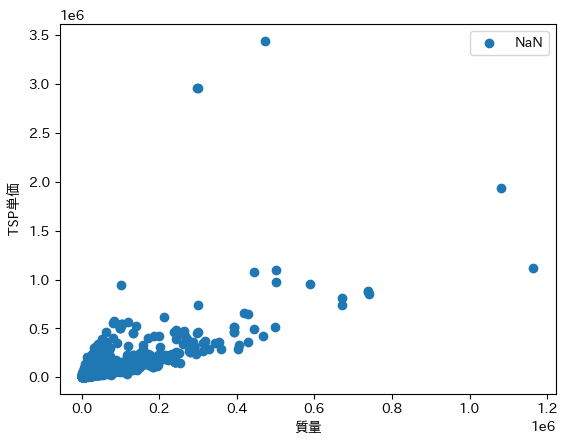

In [ ]:
# 散布図を描画
# plt.figure(figsize=(10, 6))

# タイプごとにデータをプロット
plt.scatter(df_groupB_A_4["質量"], df_groupB_A_4["TSP単価"], label="NaN")
# plt.scatter(df_groupB_A_1["質量"], df_groupB_A_1["TSP単価"], label="G31")
# plt.scatter(df_groupB_A_2["質量"], df_groupB_A_2["TSP単価"], label="G39")
# plt.scatter(df_groupB_A_3["質量"], df_groupB_A_3["TSP単価"], label="G71")

plt.title('')
plt.xlabel('質量')
plt.ylabel('TSP単価')
plt.legend()  # 凡例を追加
plt.show()


In [ ]:
print(len(df_groupB_A))

5357


In [ ]:
print(len(df_groupB_A_1))
print(len(df_groupB_A_2))
print(len(df_groupB_A_3))
print(len(df_groupB_A_4))

330
478
5
4544


In [ ]:
df_groupB_A=df_groupB_A_4

In [ ]:
#割引あり
df_groupB_A_AR = df_groupB_A[df_groupB_A["見積番号"].str.contains("AR")]
#割引なし
df_groupB_A_R = df_groupB_A[~df_groupB_A["見積番号"].str.contains("AR")]

#割引なし修正
# df_B_AR_changed_rate3 = df_B_AR
# df_B_AR_changed_rate3["TSP単価"] = df_B_AR_changed_rate3["TSP単価"]/0.97
#割引修正
# df_B_changed_rate3 = pd.concat([df_B_R, df_B_AR_changed_rate3], axis=0)

df_groupB_A["売上月"] = pd.to_datetime(df_groupB_A["売上月"], format="%Y/%m/%d")
df_groupB_A_price_1=df_groupB_A[df_groupB_A["売上月"]<"2021-09-01"]
df_groupB_A_price_2=df_groupB_A[(df_groupB_A["売上月"]>="2021-09-01")&(df_groupB_A["売上月"]<"2022-10-01")]
# （価格改定は21/9と22/10の時点、10％程度上昇）
#価格改定修正
# df_B_price_2["TSP単価"]=df_B_price_2["TSP単価"]*0.9
# df_B_price=pd.concat([df_B_price_1,df_B_price_2],axis=0)

#割引あり
df_groupB_A_price_1_AR = df_groupB_A_price_1[df_groupB_A_price_1["見積番号"].str.contains("AR")]
#割引なし
df_groupB_A_price_1_R = df_groupB_A_price_1[~df_groupB_A_price_1["見積番号"].str.contains("AR")]
#割引あり
df_groupB_A_price_2_AR = df_groupB_A_price_2[df_groupB_A_price_2["見積番号"].str.contains("AR")]
#割引なし
df_groupB_A_price_2_R = df_groupB_A_price_2[~df_groupB_A_price_2["見積番号"].str.contains("AR")]

<ipython-input-207-61e0df4cdc84>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_groupB_A["売上月"] = pd.to_datetime(df_groupB_A["売上月"], format="%Y/%m/%d")


In [ ]:
len(df_groupB_A)

4544

In [ ]:
len(df_groupB_A_AR)

1810

In [ ]:
len(df_groupB_A_R)

2734

5980.206919901512 1.3816448907943337 0.4848626676918957
0.0 65.38399097338053


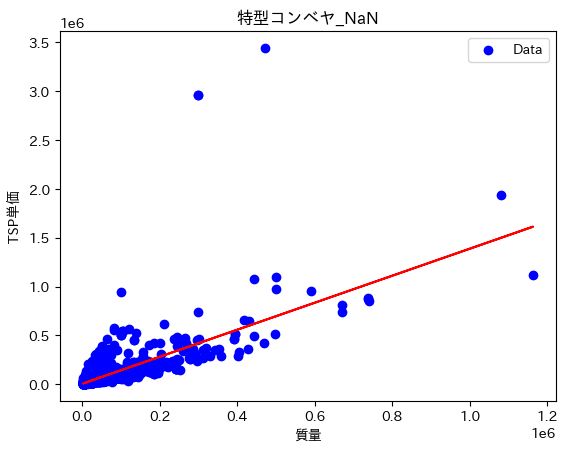

In [ ]:
regression_plot(df_groupB_A,"特型コンベヤ_NaN")

In [ ]:
print(len(df_groupB_A_AR))
print(len(df_groupB_A_R))

1810
2734


In [ ]:
regression_plot_double(df_groupB_A_AR,df_groupB_A_R,"特型コンベヤ_NaN_割引有無","割引あり","割引なし")

In [ ]:
len(df_groupB_A_price_1)

3548

In [ ]:
len(df_groupB_A_price_2)

996

In [ ]:
regression_plot_double(df_groupB_A_price_1,df_groupB_A_price_2,"特型コンベヤ_NaN_価格改定","改定前","改定後")

Text(0, 0.5, '頻度')

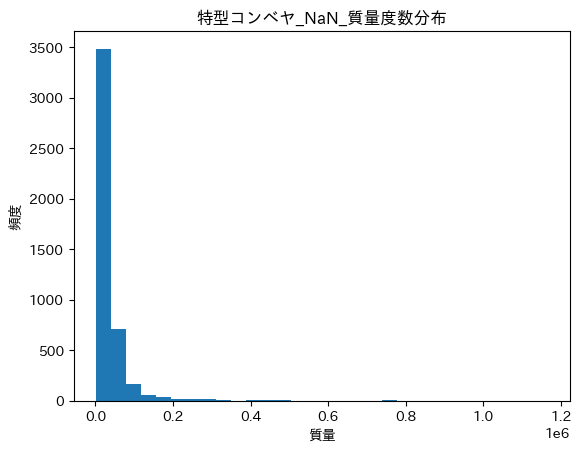

In [ ]:
plt.hist(df_groupB_A["質量"], bins=30)
plt.title("特型コンベヤ_NaN_質量度数分布")
plt.xlabel('質量')
plt.ylabel('頻度')

Text(0, 0.5, '頻度')

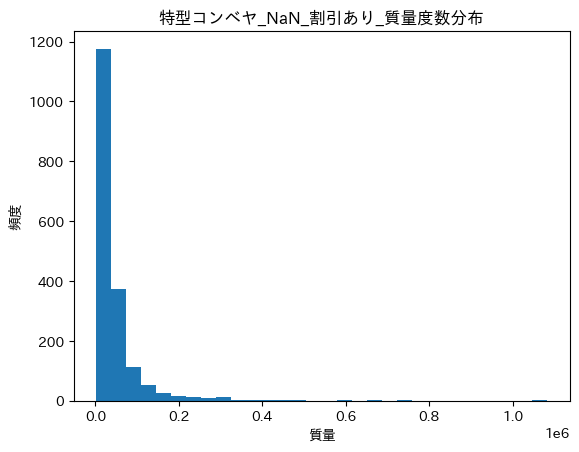

In [ ]:
plt.hist(df_groupB_A_AR["質量"], bins=30)
plt.title("特型コンベヤ_NaN_割引あり_質量度数分布")
plt.xlabel('質量')
plt.ylabel('頻度')

Text(0, 0.5, '頻度')

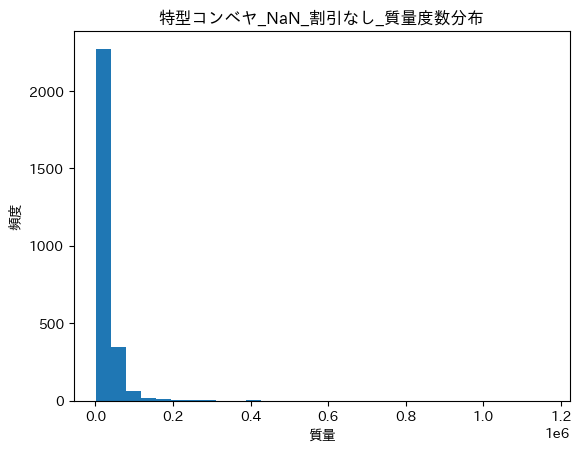

In [ ]:
plt.hist(df_groupB_A_R["質量"], bins=30)
plt.title("特型コンベヤ_NaN_割引なし_質量度数分布")
plt.xlabel('質量')
plt.ylabel('頻度')

Text(0, 0.5, '頻度')

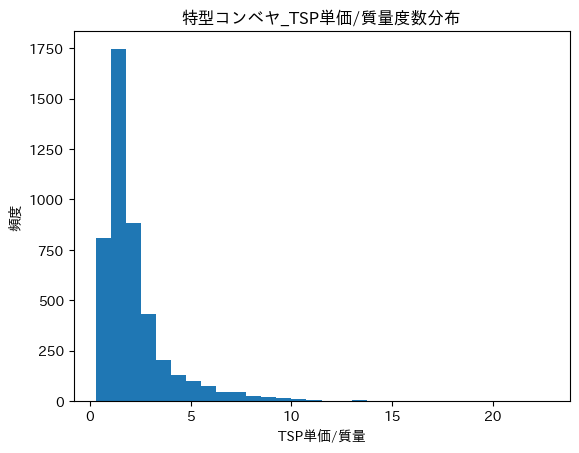

In [ ]:
plt.hist(df_groupB_A["TSP単価/質量"], bins=30)
plt.title("特型コンベヤ_TSP単価/質量度数分布")
plt.xlabel('TSP単価/質量')
plt.ylabel('頻度')

Text(0, 0.5, '頻度')

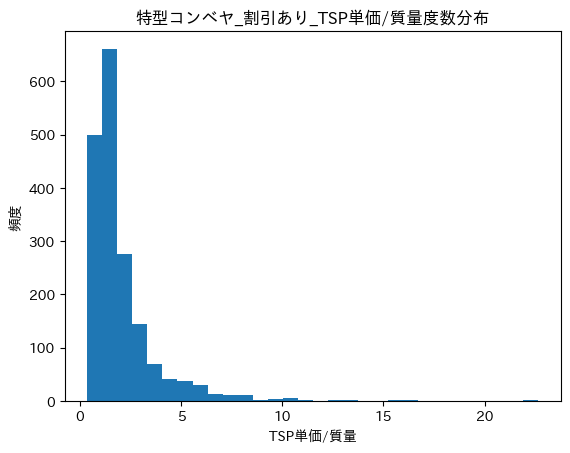

In [ ]:
plt.hist(df_groupB_A_AR["TSP単価/質量"], bins=30)
plt.title("特型コンベヤ_割引あり_TSP単価/質量度数分布")
plt.xlabel('TSP単価/質量')
plt.ylabel('頻度')

Text(0, 0.5, '頻度')

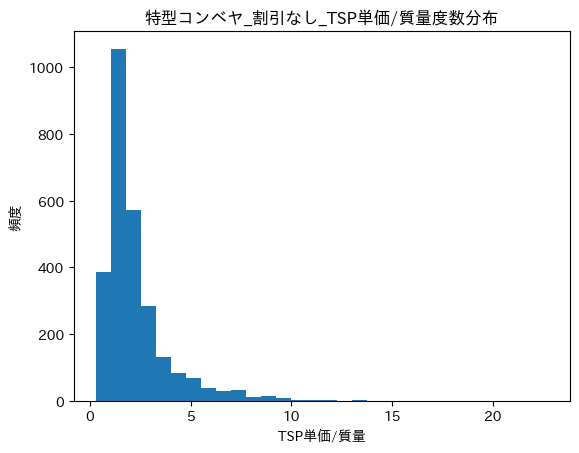

In [ ]:
plt.hist(df_groupB_A_R["TSP単価/質量"], bins=30)
plt.title("特型コンベヤ_割引なし_TSP単価/質量度数分布")
plt.xlabel('TSP単価/質量')
plt.ylabel('頻度')

In [ ]:
#ALL
# df_groupB_A["(TSP単価-切片)/質量"]=(df_groupB_A["TSP単価"]-7197.993774350758)/df_groupB_A["質量"]
# df_groupB_A_AR["(TSP単価-切片)/質量"]=(df_groupB_A_AR["TSP単価"]-1626.4779475066443)/df_groupB_A_AR["質量"]
# df_groupB_A_R["(TSP単価-切片)/質量"]=(df_groupB_A_R["TSP単価"]-14084.538684488638)/df_groupB_A_R["質量"]

df_groupB_A["(TSP単価-切片)/質量"]=(df_groupB_A["TSP単価"]-5980.206919901512)/df_groupB_A["質量"]
df_groupB_A_AR["(TSP単価-切片)/質量"]=(df_groupB_A_AR["TSP単価"]-(-427.59916612566104))/df_groupB_A_AR["質量"]
df_groupB_A_R["(TSP単価-切片)/質量"]=(df_groupB_A_R["TSP単価"]-13495.1713713025)/df_groupB_A_R["質量"]

<ipython-input-223-679874fdc158>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_groupB_A_AR["(TSP単価-切片)/質量"]=(df_groupB_A_AR["TSP単価"]-(-427.59916612566104))/df_groupB_A_AR["質量"]
<ipython-input-223-679874fdc158>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_groupB_A_R["(TSP単価-切片)/質量"]=(df_groupB_A_R["TSP単価"]-13495.1713713025)/df_groupB_A_R["質量"]


Text(0, 0.5, '頻度')

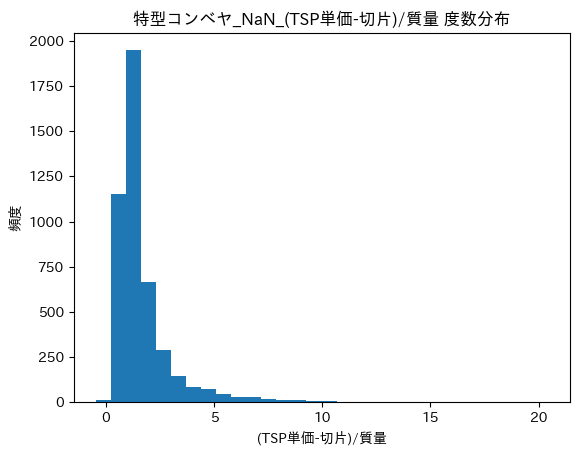

In [ ]:
plt.hist(df_groupB_A["(TSP単価-切片)/質量"], bins=30)
plt.title("特型コンベヤ_NaN_(TSP単価-切片)/質量 度数分布")
plt.xlabel('(TSP単価-切片)/質量')
plt.ylabel('頻度')

Text(0, 0.5, '頻度')

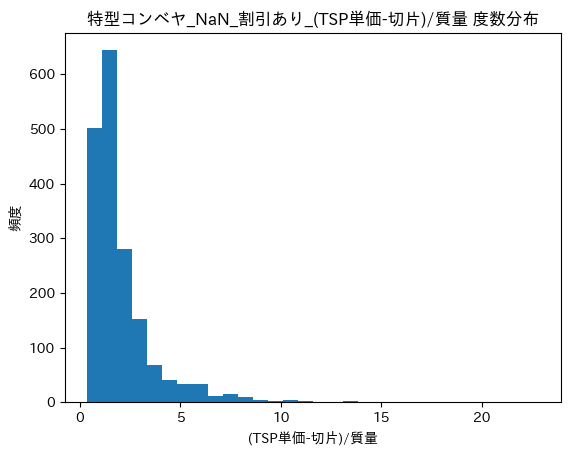

In [ ]:
plt.hist(df_groupB_A_AR["(TSP単価-切片)/質量"], bins=30)
plt.title("特型コンベヤ_NaN_割引あり_(TSP単価-切片)/質量 度数分布")
plt.xlabel('(TSP単価-切片)/質量')
plt.ylabel('頻度')

Text(0, 0.5, '頻度')

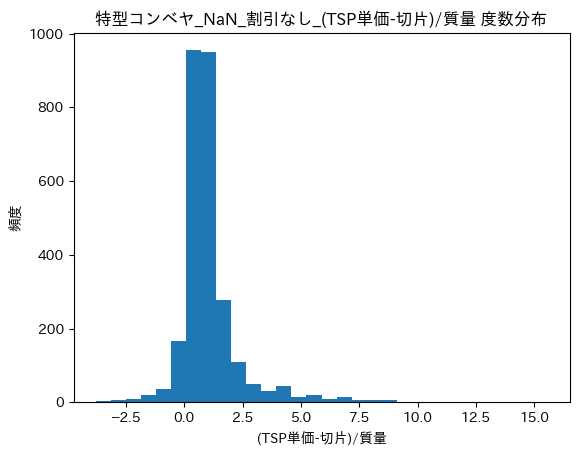

In [ ]:
plt.hist(df_groupB_A_R["(TSP単価-切片)/質量"], bins=30)
plt.title("特型コンベヤ_NaN_割引なし_(TSP単価-切片)/質量 度数分布")
plt.xlabel('(TSP単価-切片)/質量')
plt.ylabel('頻度')

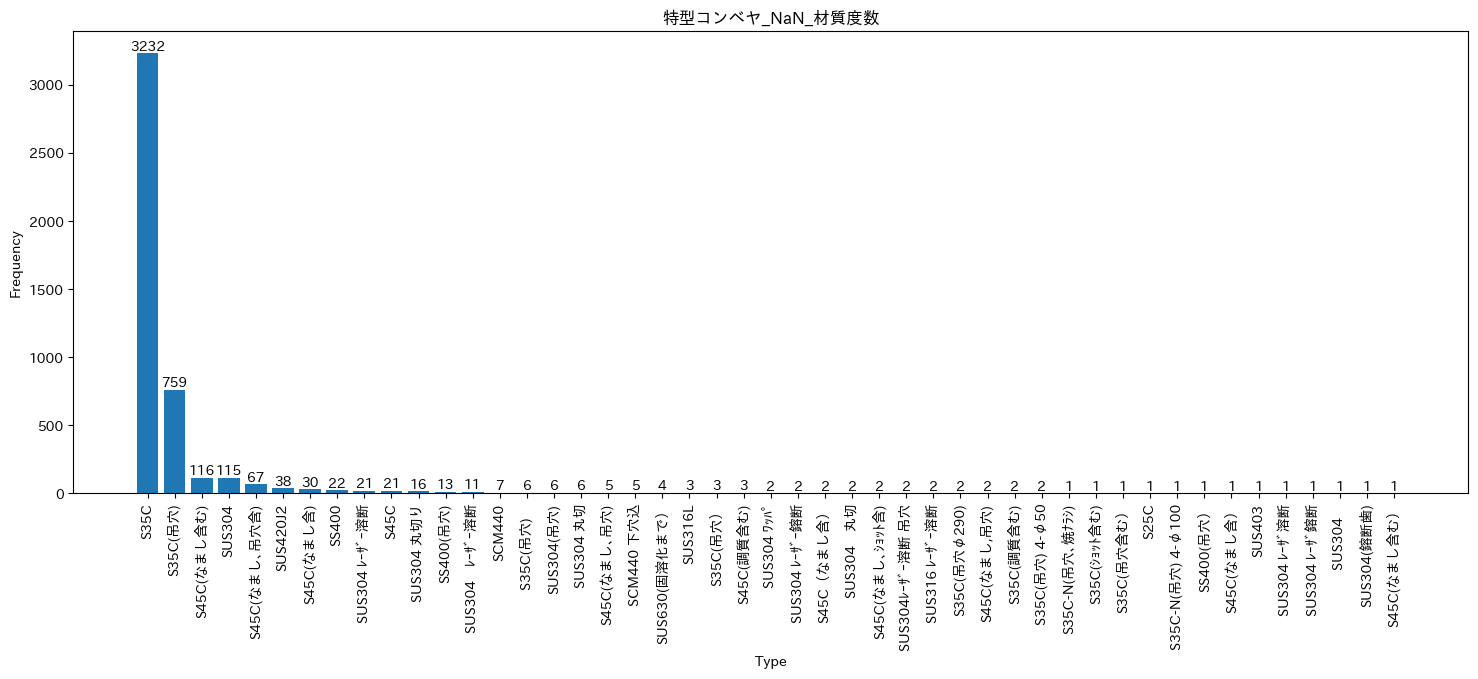

In [ ]:
# "type" 列から重複を削除してユニークな値を取得
unique_types = df_groupB_A["材質"].drop_duplicates()

plt.figure(figsize=(18, 6))
# バーを描画
type_counts = df_groupB_A["材質"].value_counts()
plt.bar(type_counts.index, type_counts.values)

# バーの上に数字を描画
for i, v in enumerate(type_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.xlabel("Type")
plt.xticks(rotation='vertical')
plt.ylabel("Frequency")
plt.title("特型コンベヤ_NaN_材質度数")
plt.show()


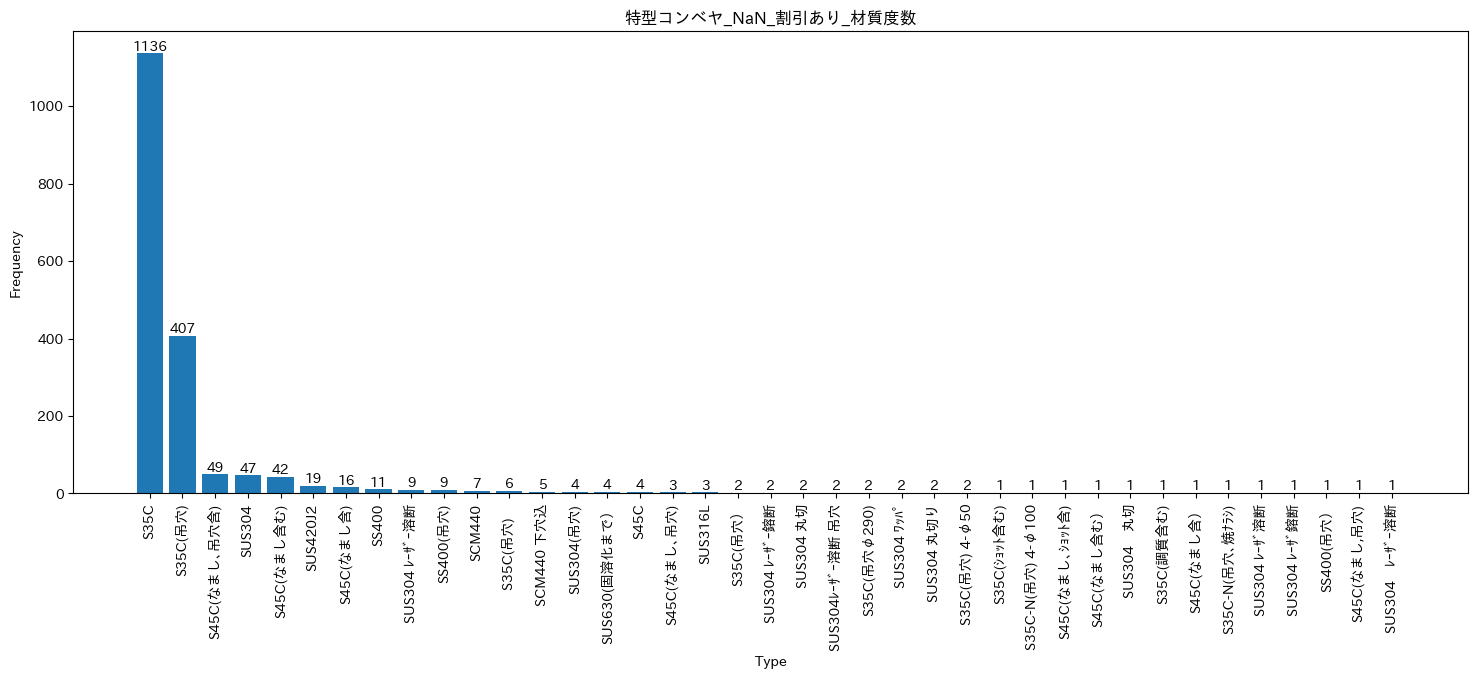

In [ ]:
# "type" 列から重複を削除してユニークな値を取得
unique_types = df_groupB_A_AR["材質"].drop_duplicates()

plt.figure(figsize=(18, 6))
# バーを描画
type_counts = df_groupB_A_AR["材質"].value_counts()
plt.bar(type_counts.index, type_counts.values)

# バーの上に数字を描画
for i, v in enumerate(type_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.xlabel("Type")
plt.xticks(rotation='vertical')
plt.ylabel("Frequency")
plt.title("特型コンベヤ_NaN_割引あり_材質度数")
plt.show()


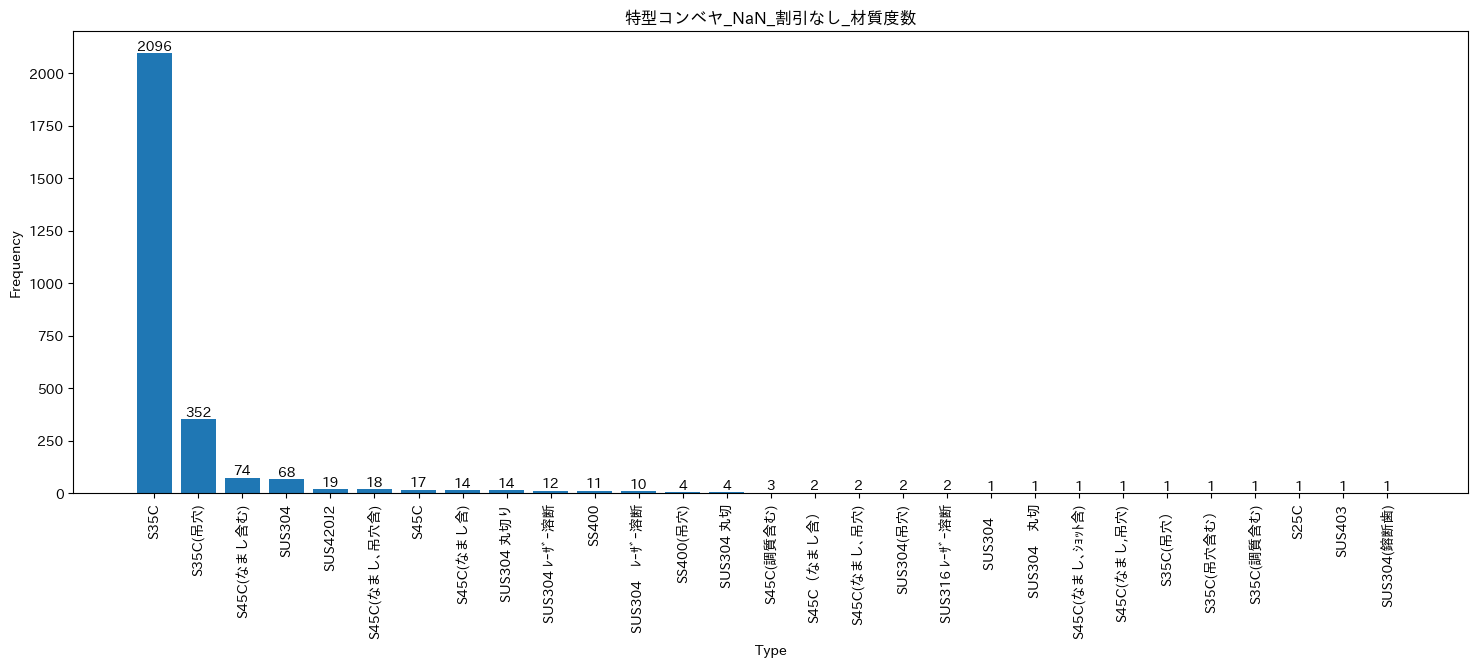

In [ ]:
# "type" 列から重複を削除してユニークな値を取得
unique_types = df_groupB_A_R["材質"].drop_duplicates()

plt.figure(figsize=(18, 6))
# バーを描画
type_counts = df_groupB_A_R["材質"].value_counts()
plt.bar(type_counts.index, type_counts.values)

# バーの上に数字を描画
for i, v in enumerate(type_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

plt.xlabel("Type")
plt.xticks(rotation='vertical')
plt.ylabel("Frequency")
plt.title("特型コンベヤ_NaN_割引なし_材質度数")
plt.show()


In [ ]:
df_groupB_A_R

,売上月,注番,生産計画番号,見積番号,契約インデント番号,受注番号,受注品名,納品書番号,分類,品番,...,ZD,ZIT,ZK,ZKN,ZKNK,ZKNS,ZS,ZT,TSP単価/質量,(TSP単価-切片)/質量
4,2019/10/31,QT5-5D270D,25958400,R19040908,NaN,3937371,RF05100S8T-CQ-SS-TK,422284,NaN,NaN,...,0,0,0,0,0,0,0,0,9.555888,8.314382
5,2019/10/31,DT2-24917,26472800,R19080946,NaN,4181221,RF10150F7T-BW1Q-TK,420578,NaN,NaN,...,1,0,0,0,0,0,0,0,1.904757,0.989210
7,2019/10/31,NRK1901160B,26189900,R19063972,NaN,4048221,B12006S12T-BW1Q-TK,415369,NaN,NaN,...,1,0,0,0,0,0,0,0,1.563404,1.392838
8,2019/10/31,KWUA90275,26051000,R19073562,NaN,4072631,RF212R10T-BW1Q-TK,413388,NaN,NaN,...,1,0,0,0,0,0,0,0,1.542447,1.323937
9,2019/10/31,BNFAU17055,26436400,R19080681,NaN,4097391,RFP150R7T-BWN-TK,416382,NaN,NaN,...,1,0,0,0,0,0,0,0,1.652368,0.942096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,2022/3/31,KWFV11255C,45747900,R21111654,NaN,7260151,RF36300F8T-BW1N-TK,731998,NaN,NaN,...,1,0,0,0,0,0,0,0,0.890755,0.821175
4539,2021/12/31,KLF4345,44654000,R21102736,NaN,7077331,RF05100VR-6T-CW1N-TK,706511,NaN,NaN,...,0,0,0,0,0,0,0,0,10.080000,7.920773
4540,2022/1/31,KLF4377,44934200,R21110749,NaN,7123331,RF05100VR-6T-CW1N-TK,715776,NaN,NaN,...,0,0,0,0,0,0,0,0,7.516800,5.357573
4552,2021/12/31,TS1 3477D,44724600,R21110913,NaN,6986011,NF30150-10(5)T-CW1Q-TK,705913,NaN,NaN,...,0,0,0,0,0,0,0,0,3.227614,2.911271


In [ ]:
df_result_b=pd.DataFrame(columns=["intercept","度数","start","end"],index=range(30000))

df_simulation=df_groupB_A_R
#B割引なし全体シミュレーション

intercept=14084.538684488638

k=0

for i in np.arange(intercept - 90000, intercept+90000, 10):
  # 計算
  df_simulation["(TSP単価-切片)/質量"] = (df_simulation["TSP単価"] - i) / df_simulation["質量"]

  # ビンの幅を指定
  bin_width = 1

  # データ範囲を計算
  data_min = min(df_simulation["(TSP単価-切片)/質量"])
  data_max = max(df_simulation["(TSP単価-切片)/質量"])

  # ビンの境界を生成
  bins = np.arange(data_min, data_max + bin_width, bin_width)
  # ヒストグラムの計算
  hist, bin_edges = np.histogram(df_simulation["(TSP単価-切片)/質量"], bins=bins)
  # 最大のデータ数とそのデータ範囲を取得
  max_count = max(hist)
  max_bin_index = np.argmax(hist)

  # データ範囲の開始と終了を取得
  bin_start = bin_edges[max_bin_index]
  bin_end = bin_edges[max_bin_index + 1]

  # DataFrameに保存
  df_result_b.loc[k, "intercept"] = i
  df_result_b.loc[k, "度数"] = max_count
  df_result_b.loc[k, "start"] = bin_start
  df_result_b.loc[k, "end"] = bin_end

  k+=1

  # print(i)
  # print(max_count)
  # print(bin_start)
  # print(bin_end)
# 結果を表示
print(df_result_b)


<ipython-input-231-f8a040b22a77>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simulation["(TSP単価-切片)/質量"] = (df_simulation["TSP単価"] - i) / df_simulation["質量"]


          intercept   度数     start       end
0     -75915.461316  336  3.959022  4.959022
1     -75905.461316  336  3.958937  4.958937
2     -75895.461316  336  3.958851  4.958851
3     -75885.461316  336  3.958766  4.958766
4     -75875.461316  336   3.95868   4.95868
...             ...  ...       ...       ...
29995           NaN  NaN       NaN       NaN
29996           NaN  NaN       NaN       NaN
29997           NaN  NaN       NaN       NaN
29998           NaN  NaN       NaN       NaN
29999           NaN  NaN       NaN       NaN

[30000 rows x 4 columns]


In [ ]:
df_result_b.reset_index(drop=False).to_csv('df_result_b.csv',encoding="cp932",index = False)
from google.colab import files
files.download('df_result_b.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, '度数')

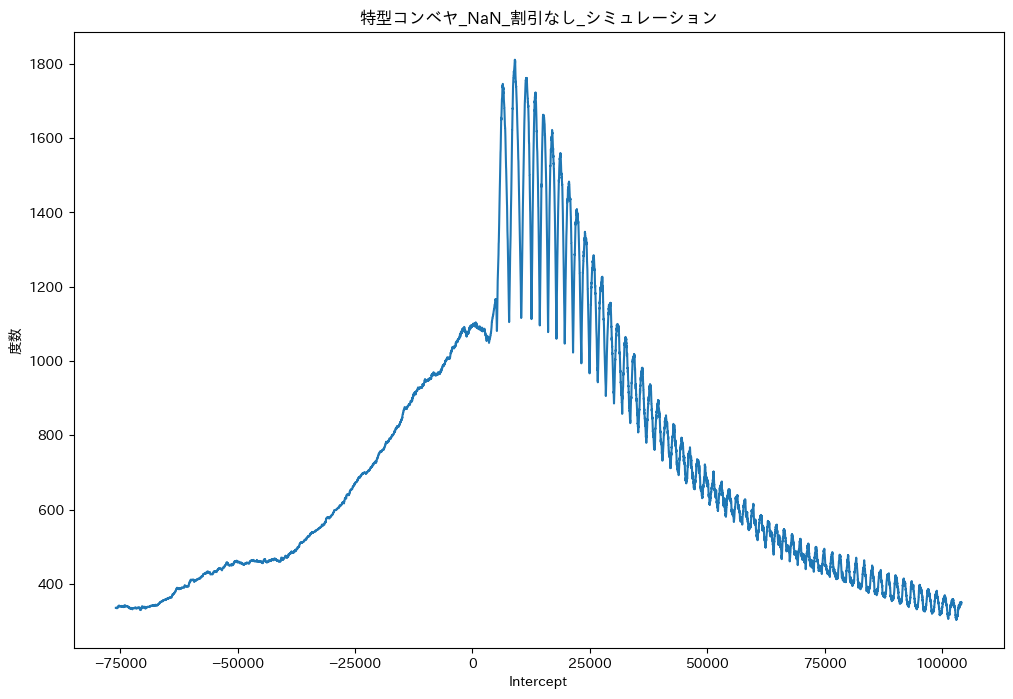

In [ ]:
# 折れ線グラフの描画
plt.figure(figsize=(12, 8))
plt.plot(df_result_b['intercept'], df_result_b['度数'],  linestyle='-')

# グラフの装飾
plt.title('特型コンベヤ_NaN_割引なし_シミュレーション')
plt.xlabel('Intercept')
plt.ylabel('度数')

# **特型コンベヤ分類処理等**

## データ処理

In [ ]:
df_groupB_A_new

,売上月,注番,生産計画番号,見積番号,契約インデント番号,受注番号,受注品名,納品書番号,分類new,品番,...,ZB,ZC,ZD,ZIT,ZK,ZKN,ZKNK,ZKNS,ZS,ZT
0,2019/10/31,YT10SE624,26280300,AR19073097,NaN,4055161,RF214S8T-BWQ-TK,419089,G39,NaN,...,0,0,0,0,0,0,0,0,0,0
4392,2022/3/31,T H218247C,46377400,R22011487,NaN,7363581,RF03100R6T-CWN-TK,735734,G31,NaN,...,0,0,1,0,0,0,0,0,0,0
570,2020/1/31,STY-36880,28639000,AR19112418,NaN,4509771,RF05075S8T-BWQ-TK,456323,G31,NaN,...,0,0,1,0,0,0,0,0,0,0
3396,2021/8/31,EEC3797002,41090600,AR21060670,NaN,6543941,RF05100F6T-BWQ-TK,660953,G39,NaN,...,0,0,1,0,0,0,0,0,0,0
3395,2021/8/31,EEC3797003,41090700,AR21060671,NaN,6543951,RF05100F8T-BWQ-TK,660954,G39,NaN,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,2021/11/30,FNKAT00499Y,43765200,R21091953,NaN,6938081,RF6205M10T-CW1N-TK,695622,G39,NaN,...,0,0,1,0,0,0,0,0,0,0
1576,2020/7/31,NT5-7N128,32528200,AR20043480,NaN,5119431,RF6205M8T-CW1Q-TK,520806,G39,NaN,...,0,0,1,0,0,0,0,0,0,0
1571,2020/7/31,JT113T014A,33035400,R20052636,NaN,5214741,RF6205M11T-CW1Q-TK,521857,G39,NaN,...,0,0,1,0,0,0,0,0,0,0
3898,2021/11/30,NT5-39410,43965800,AR21093104,NaN,6967001,RF450S12T-CWQ-TK,698061,G39,NaN,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
#先方データ除外条件：

# 特形コンベヤスプロケットのみ
#--「集計名」列が特形コンベヤスプロケットのみ

# 特形のみ
#--「品名」列が-TKで終わるもののみ

# ドライブスプロケットを除く
#--「品名コード」列がTSTで始まるもの以外

# ゲージを除く
#--「品名」列にGAUGEを含むもの以外

# 社内生産のみ
#--「生産区分」列が純生産のみ

#★ 売上数1のみ
#--「売上数」列が1のみ
#　⇒この条件を無視

# TSP金額0を除く
#--「TSP金額」が1以上のみ

#★ バルクシステム、メイフランを除く
#--「納入先」列がバルク、メイフランを含むもの以外
#　⇒「納入先」が見当たらない


# 同じ見積番号、品名コードがあれば最新1件のみ
#--「見積番号」列、「品名コード」列の重複削除

# 見積番号にRを含むもののみ
#--「見積番号」列にRを含むもののみ

# 契約価格でないもののみ
#--「契約インデント番号」列が空白のみ

In [ ]:
# df_pre=df_groupB_A
df_pre=df_groupB_A_new

In [ ]:
len(df_pre)

4867

In [ ]:
#まずデータ処理で残りデータ数集計⇒分類によりグループ分け
#グループ分け後にデータを処理？
df_pre = df_pre[df_pre["集計名"].str.contains("特形ｺﾝﾍﾞﾔｽﾌﾟﾛｹｯﾄ")]
print(len(df_pre))
df_pre = df_pre[df_pre["品名"].str.endswith("-TK")]
print(len(df_pre))
df_pre = df_pre[~df_pre["品名コード"].str.startswith("TST")]
print(len(df_pre))
df_pre = df_pre[~df_pre["品名"].str.contains("GAUGE")]
print(len(df_pre))
df_pre = df_pre[df_pre["生産区分"].str.contains("純生産")]
print(len(df_pre))
df_pre = df_pre[df_pre["TSP金額"]>=1]
print(len(df_pre))
# df_pre = df_pre[df_pre["納入先"].str.contains("純生産")]
# print(len(df_pre))
df_pre = df_pre.drop_duplicates(subset=['見積番号', '品名コード'], keep='first')
print(len(df_pre))
df_pre = df_pre[df_pre["見積番号"].str.contains("R")]
print(len(df_pre))
df_pre = df_pre[df_pre["契約インデント番号"].isna()]
print(len(df_pre))
df_pre = df_pre[df_pre["売上数"]==1]
print(len(df_pre))
# df_pre = df_pre.drop_duplicates(subset=['DC金額', '質量(g)'], keep='first')
#df_pre = df_pre.drop_duplicates(subset=['TSP金額', '質量(g)'], keep='first')

4867
4858
4858
4858
4858
4858
4858
4858
4858
1103


In [ ]:
# データ処理結果メモ
# 5357
# 5348
# 5348
# 5348
# 5348
# 5341
# 4859
# 4859
# 4859

In [ ]:
df=df_pre

## grouping to 10

In [ ]:
#first:グループ分けをする
#工程の差異によるブレ？
#　⇒　グループごとに工程の分布をみる？⇒工程が使われた％
#工程差異と質量と価格の関係？
#　⇒　各工程にて、["価格/質量"]の分布？
#工程組み合わせる差異？
#


#SVM&重回帰で試す？パラメータの選定はどうする？
#交差検定の確認

In [ ]:
# todo
# 1.2σ計算仕組みを組む
# 2.現時点アプローチベースでを2σ計算し、分類方法検討（残差閾値、工程分類）
# 3.先方データの分類方法アプローチ（グループplot、分類方法検討、SVM？⇒データ結果次第）

In [ ]:
# todo:
# 1.各groupの散布図
# 2.改善可能性のあるグループとないグループを分けていく
# 3.改善方法を考える⇒工程からアプローチ？

In [ ]:
dataframes_list_name=["下穴　（焼入ありなし統合）","下穴　MC歯切　（焼入ありなし統合）","仕上旋削　（キー、ドリル、焼入ありなし統合）",
                      "仕上旋削　MC歯切　（キー、ドリル、焼入ありなし統合）","下穴　ステンレス　（焼入ありなし統合）","下穴　ステンレス　MC歯切　（焼入ありなし統合）",
                      "仕上旋削　ステンレス　（キー、ドリル、焼入ありなし統合）","仕上旋削　ステンレス　MC歯切　（キー、ドリル、焼入ありなし統合）","下穴　（焼入ありなし統合）",
                      "下穴　MC歯切　（焼入ありなし統合）","仕上旋削　（キー、ドリル、焼入ありなし統合）","仕上旋削　MC歯切　（キー、ドリル、焼入ありなし統合）",
                      "下穴　ステンレス　（焼入ありなし統合）","下穴　ステンレス　MC歯切　（焼入ありなし統合）","仕上旋削　ステンレス　（キー、ドリル、焼入ありなし統合）",
                      "仕上旋削　ステンレス　MC歯切　（キー、ドリル、焼入ありなし統合）","下穴　溶接　（焼入ありなし統合）","下穴　溶接　　MC歯切　（焼入ありなし統合）",
                      "仕上旋削　溶接　（キー、ドリル、焼入ありなし統合）","仕上旋削　溶接　MC歯切　（キー、ドリル、焼入ありなし統合）","下穴　溶接　ステンレス　（焼入ありなし統合）",
                      "下穴　溶接　ステンレス　MC歯切　（焼入ありなし統合）","仕上旋削　溶接　ステンレス　（キー、ドリル、焼入ありなし統合）","仕上旋削　溶接　ステンレス　MC歯切　（キー、ドリル、焼入ありなし統合）"]

In [ ]:
len(dataframes_list_name)

24

In [ ]:
#df共通
condition = (
    (df['A'] == 0) & (df['A2'] == 0) & (df['A3'] == 0) &
    (df['AB'] == 0) & (df['AB2'] == 0) & (df['AB3'] == 0) &
    (df['AFS'] == 0) & (df['AFT'] == 0) & (df['AFT2'] == 0) &
    (df['AL'] == 0) & (df['AR'] == 0) & (df['AR2'] == 0) &
    (df['BR'] == 0) & (df['DEC'] == 0) & (df['DEC2'] == 0) &
    (df['EWC'] == 0) & (df['F'] == 0) & (df['F2'] == 0) &
    (df['F3'] == 0) & (df['F4'] == 0) & (df['F5'] == 0) &
    (df['FA'] == 0) & (df['FBC'] == 0) & (df['FPC'] == 0) &
    (df['GE'] == 0) & (df['GI'] == 0) & (df['GS'] == 0) &
    (df['HAL'] == 0) & (df['HB'] == 0) & (df['HC'] == 0) &
    (df['HN'] == 0) & (df['HNT'] == 0) & (df['HQ2'] == 0) &
    (df['HQT'] == 0) & (df['HSB'] == 0) & (df['HTR'] == 0) &
    (df['HTS'] == 0) & (df['KS'] == 0) & (df['KW'] == 0) &
    (df['LD'] == 0) & (df['LK'] == 0) & (df['LKD'] == 0) &
    (df['LR'] == 0) & (df['LT'] == 0) & (df['LTD'] == 0) &
    (df['MKDT'] == 0) & (df['NEP'] == 0) & (df['NEP2'] == 0) &
    (df['NEP3'] == 0) & (df['SCH'] == 0) & (df['SD'] == 0) &
    (df['SLE'] == 0) & (df['SLL'] == 0) & (df['SLL2'] == 0) &
    (df['SLT'] == 0) & (df['SLT2'] == 0) & (df['SOB'] == 0) &
    (df['SPK'] == 0) & (df['SPL'] == 0) & (df['SPM'] == 0) &
    (df['SRD'] == 0) & (df['ST'] == 0) & (df['STE'] == 0) &
    (df['SWC'] == 0) & (df['SWC2'] == 0) & (df['T'] == 0) &
    (df['WM'] == 0) & (df['WT'] == 0)
)
df=df[condition]
print(len(df))

#下穴（焼入ありなし統合）
condition =  (
  (df['品名'].str.contains('-A')) &
  ((df['材質'].str.contains('S..C')) | (df['材質'].str.contains('SS')))
    &
  (df['DSR'] == 0) & (df['L2'] == 0) & (df['L3'] == 0) & (df['LA'] == 0) &
  (df['KB'] == 0) & (df['KC'] == 0) &
  (df['DR'] == 0) & (df['DT'] == 0) & (df['DT2'] == 0) &
  (df['MD'] == 0) & (df['MD2'] == 0) & (df['MDR'] == 0) & (df['MDT'] == 0) &
  (df['MT'] == 0) &
  (df['HS'] == 0) & (df['WA'] == 0) & (df['WA2'] == 0) & (df['WAT'] == 0)
)

df_group1=df[condition]
print(len(df_group1))

#下穴　MC歯切　（焼入ありなし統合）
condition = (
  (df['品名'].str.contains('-A')) &
  ((df['材質'].str.contains('S??C')) | (df['材質'].str.contains('SS'))) &
  (df['DSR'] == 0) &
  (df['L2'] == 0) &
  (df['L3'] == 0) &
  (df['LA'] == 0) &
  (df['KB'] == 0) &
  (df['KC'] == 0) &
  (df['DR'] == 0) &
  (df['DT'] == 0) &
  (df['DT2'] == 0) &
  (df['MD'] == 0) &
  (df['MD2'] == 0) &
  (df['MDR'] == 0) &
  (df['MDT'] == 0) &
  (df['MT'] == 1) &
  (df['HS'] == 0) &
  (df['WA'] == 0) &
  (df['WA2'] == 0) &
  (df['WAT'] == 0))
df_group2=df[condition]
print(len(df_group2))
#仕上旋削　（キー、ドリル、焼入ありなし統合）
condition = (
  (df['品名'].str.contains('-A')) &
  ((df['材質'].str.contains('S??C')) | (df['材質'].str.contains('SS'))) &
  ((df['L2'] == 1) | (df['L3'] == 1) | (df['LA'] == 1)) &  # 仕上旋削関係
  (df['MT'] == 0) &  # MC歯切
  (df['HS'] == 0) &
  (df['WA'] == 0) &
  (df['WA2'] == 0) &
  (df['WAT'] == 0)  # 溶接関係
)
df_group3=df[condition]
print(len(df_group3))
#仕上旋削　MC歯切　（キー、ドリル、焼入ありなし統合）
condition = (
  (df['品名'].str.contains('-A')) &
  ((df['材質'].str.contains('S??C')) | (df['材質'].str.contains('SS'))) &
  ((df['L2'] == 1) | (df['L3'] == 1) | (df['LA'] == 1)) &  # 仕上旋削関係
  (df['MT'] == 1) &  # MC歯切
  (df['HS'] == 0) &
  (df['WA'] == 0) &
  (df['WA2'] == 0) &
  (df['WAT'] == 0)  # 溶接関係
)
df_group4=df[condition]
print(len(df_group4))
#下穴　ステンレス　（焼入ありなし統合）
condition = (
  (df['品名'].str.contains('-A')) &
  (df['材質'].str.contains('SUS')) &
  (df['DSR'] == 0) &
  (df['L2'] == 0) &
  (df['L3'] == 0) &
  (df['LA'] == 0) &  # 仕上旋削関係
  (df['KB'] == 0) &
  (df['KC'] == 0) &  # キー関係
  (df['DR'] == 0) &
  (df['DT'] == 0) &
  (df['DT2'] == 0) &
  (df['MD'] == 0) &
  (df['MD2'] == 0) &
  (df['MDR'] == 0) &
  (df['MDT'] == 0) &  # ドリル関係
  (df['MT'] == 0) &  # MC歯切
  (df['WA'] == 0) &
  (df['WA2'] == 0) &
  (df['WAT'] == 0)  # 溶接関係
)
df_group5=df[condition]
print(len(df_group5))
#下穴　ステンレス　MC歯切　（焼入ありなし統合）
condition = (
  (df['品名'].str.contains('-A')) &
  (df['材質'].str.contains('SUS')) &
  (df['DSR'] == 0) &
  (df['L2'] == 0) &
  (df['L3'] == 0) &
  (df['LA'] == 0) &  # 仕上旋削関係
  (df['KB'] == 0) &
  (df['KC'] == 0) &  # キー関係
  (df['DR'] == 0) &
  (df['DT'] == 0) &
  (df['DT2'] == 0) &
  (df['MD'] == 0) &
  (df['MD2'] == 0) &
  (df['MDR'] == 0) &
  (df['MDT'] == 0) &  # ドリル関係
  (df['MT'] == 1) &  # MC歯切
  (df['WA'] == 0) &
  (df['WA2'] == 0) &
  (df['WAT'] == 0)  # 溶接関係
)

# 条件に合致する行を抽出
df_group6 = df[condition]
print(len(df_group6))

#仕上旋削　ステンレス　（キー、ドリル、焼入ありなし統合）
condition = (
  (df['品名'].str.contains('-A')) &
  (df['材質'].str.contains('SUS')) &
  ((df['L2'] == 1) | (df['L3'] == 1) | (df['LA'] == 1)) &  # 仕上旋削関係
  (df['MT'] == 0) &  # MC歯切
  (df['WA'] == 0) &
  (df['WA2'] == 0) &
  (df['WAT'] == 0)  # 溶接関係
)

# 条件に合致する行を抽出
df_group7 = df[condition]
print(len(df_group7))

#仕上旋削　ステンレス　MC歯切　（キー、ドリル、焼入ありなし統合）
condition = (
  (df['品名'].str.contains('-A')) &
  (df['材質'].str.contains('SUS')) &
  ((df['L2'] == 1) | (df['L3'] == 1) | (df['LA'] == 1)) &  # 仕上旋削関係
  (df['MT'] == 1) &  # MC歯切
  (df['WA'] == 0) &
  (df['WA2'] == 0) &
  (df['WAT'] == 0)  # 溶接関係
)

# 条件に合致する行を抽出
df_group8 = df[condition]
print(len(df_group8))

#------BC------
#下穴　（焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  ((df['材質'].str.contains('S??C')) | (df['材質'].str.contains('SS'))) &
  (df['DSR'] == 0) &
  (df['L2'] == 0) &
  (df['L3'] == 0) &
  (df['LA'] == 0) &  # 仕上旋削関係
  (df['KB'] == 0) &
  (df['KC'] == 0) &  # キー関係
  (df['DR'] == 0) &
  (df['DT'] == 0) &
  (df['DT2'] == 0) &
  (df['MD'] == 0) &
  (df['MD2'] == 0) &
  (df['MDR'] == 0) &
  (df['MDT'] == 0) &  # ドリル関係
  (df['MT'] == 0) &  # MC歯切
  (df['HS'] == 0) &
  (df['WA'] == 0) &
  (df['WA2'] == 0) &
  (df['WAT'] == 0)  # 溶接関係
)

# 条件に合致する行を抽出
df_group9 = df[condition]
print(len(df_group9))

#下穴　MC歯切　（焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  ((df['材質'].str.contains('S??C')) | (df['材質'].str.contains('SS'))) &
  (df['DSR'] == 0) &
  (df['L2'] == 0) &
  (df['L3'] == 0) &
  (df['LA'] == 0) &  # 仕上旋削関係
  (df['KB'] == 0) &
  (df['KC'] == 0) &  # キー関係
  (df['DR'] == 0) &
  (df['DT'] == 0) &
  (df['DT2'] == 0) &
  (df['MD'] == 0) &
  (df['MD2'] == 0) &
  (df['MDR'] == 0) &
  (df['MDT'] == 0) &  # ドリル関係
  (df['MT'] == 1) &  # MC歯切
  (df['HS'] == 0) &
  (df['WA'] == 0) &
  (df['WA2'] == 0) &
  (df['WAT'] == 0)  # 溶接関係
)

# 条件に合致する行を抽出
df_group10 = df[condition]
print(len(df_group10))

#仕上旋削　（キー、ドリル、焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  ((df['材質'].str.contains('S??C')) | (df['材質'].str.contains('SS'))) &
  ((df['L2'] == 1) | (df['L3'] == 1) | (df['LA'] == 1)) &  # 仕上旋削関係
  (df['MT'] == 0) &  # MC歯切
  (df['HS'] == 0) &
  (df['WA'] == 0) &
  (df['WA2'] == 0) &
  (df['WAT'] == 0)  # 溶接関係
)

# 条件に合致する行を抽出
df_group11 = df[condition]
print(len(df_group11))

#仕上旋削　MC歯切　（キー、ドリル、焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  ((df['材質'].str.contains('S??C')) | (df['材質'].str.contains('SS'))) &
  ((df['L2'] == 1) | (df['L3'] == 1) | (df['LA'] == 1)) &  # 仕上旋削関係
  (df['MT'] == 1) &  # MC歯切
  (df['HS'] == 0) &
  (df['WA'] == 0) &
  (df['WA2'] == 0) &
  (df['WAT'] == 0)  # 溶接関係
)

# 条件に合致する行を抽出
df_group12 = df[condition]
print(len(df_group12))

#下穴　ステンレス　（焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  (df['材質'].str.contains('SUS')) &
  (df['DSR'] == 0) &
  (df['L2'] == 0) &
  (df['L3'] == 0) &
  (df['LA'] == 0) &  # 仕上旋削関係
  (df['KB'] == 0) &
  (df['KC'] == 0) &  # キー関係
  (df['DR'] == 0) &
  (df['DT'] == 0) &
  (df['DT2'] == 0) &
  (df['MD'] == 0) &
  (df['MD2'] == 0) &
  (df['MDR'] == 0) &
  (df['MDT'] == 0) &  # ドリル関係
  (df['MT'] == 0) &  # MC歯切
  (df['HS'] == 0) &
  (df['WA'] == 0) &
  (df['WA2'] == 0) &
  (df['WAT'] == 0)  # 溶接関係
)

# 条件に合致する行を抽出
df_group13 = df[condition]
print(len(df_group13))

#下穴　ステンレス　MC歯切　（焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  (df['材質'].str.contains('SUS')) &
  (df['DSR'] == 0) &
  (df['L2'] == 0) &
  (df['L3'] == 0) &
  (df['LA'] == 0) &  # 仕上旋削関係
  (df['KB'] == 0) &
  (df['KC'] == 0) &  # キー関係
  (df['DR'] == 0) &
  (df['DT'] == 0) &
  (df['DT2'] == 0) &
  (df['MD'] == 0) &
  (df['MD2'] == 0) &
  (df['MDR'] == 0) &
  (df['MDT'] == 0) &  # ドリル関係
  (df['MT'] == 1) &  # MC歯切
  (df['HS'] == 0) &
  (df['WA'] == 0) &
  (df['WA2'] == 0) &
  (df['WAT'] == 0)  # 溶接関係
)

# 条件に合致する行を抽出
df_group14 = df[condition]
print(len(df_group14))

#仕上旋削　ステンレス　（キー、ドリル、焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  (df['材質'].str.contains('SUS')) &
  ((df['L2'] == 1) | (df['L3'] == 1) | (df['LA'] == 1)) &  # 仕上旋削関係
  (df['MT'] == 0) &  # MC歯切
  (df['HS'] == 0) &
  (df['WA'] == 0) &
  (df['WA2'] == 0) &
  (df['WAT'] == 0)  # 溶接関係
)

# 条件に合致する行を抽出
df_group15 = df[condition]
print(len(df_group15))

#仕上旋削　ステンレス　MC歯切　（キー、ドリル、焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  (df['材質'].str.contains('SUS')) &
  ((df['L2'] == 1) | (df['L3'] == 1) | (df['LA'] == 1)) &  # 仕上旋削関係
  (df['MT'] == 1) &  # MC歯切
  (df['HS'] == 0) &
  (df['WA'] == 0) &
  (df['WA2'] == 0) &
  (df['WAT'] == 0)  # 溶接関係
)

# 条件に合致する行を抽出
df_group16 = df[condition]
print(len(df_group16))

#下穴　溶接　（焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  ((df['材質'].str.contains('S??C')) | (df['材質'].str.contains('SS'))) &
  (df['DSR'] == 0) &
  (df['L2'] == 0) &
  (df['L3'] == 0) &
  (df['LA'] == 0) &  # 仕上旋削関係
  (df['KB'] == 0) &
  (df['KC'] == 0) &  # キー関係
  (df['DR'] == 0) &
  (df['DT'] == 0) &
  (df['DT2'] == 0) &
  (df['MD'] == 0) &
  (df['MD2'] == 0) &
  (df['MDR'] == 0) &
  (df['MDT'] == 0) &  # ドリル関係
  (df['MT'] == 0) &  # MC歯切
  (df['HS'] == 0) &
  ((df['WA'] == 1) | (df['WA2'] == 1) | (df['WAT'] == 1))  # 溶接関係
)

# 条件に合致する行を抽出
df_group17 = df[condition]
print(len(df_group17))

#下穴　溶接　MC歯切　（焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  ((df['材質'].str.contains('S??C')) | (df['材質'].str.contains('SS'))) &
  (df['DSR'] == 0) &
  (df['L2'] == 0) &
  (df['L3'] == 0) &
  (df['LA'] == 0) &  # 仕上旋削関係
  (df['KB'] == 0) &
  (df['KC'] == 0) &  # キー関係
  (df['DR'] == 0) &
  (df['DT'] == 0) &
  (df['DT2'] == 0) &
  (df['MD'] == 0) &
  (df['MD2'] == 0) &
  (df['MDR'] == 0) &
  (df['MDT'] == 0) &  # ドリル関係
  (df['MT'] == 1) &  # MC歯切
  (df['HS'] == 0) &
  ((df['WA'] == 1) | (df['WA2'] == 1) | (df['WAT'] == 1))  # 溶接関係
)

# 条件に合致する行を抽出
df_group18 = df[condition]
print(len(df_group18))

#仕上旋削　溶接　（キー、ドリル、焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  ((df['材質'].str.contains('S??C')) | (df['材質'].str.contains('SS'))) &
  ((df['L2'] == 1) | (df['L3'] == 1) | (df['LA'] == 1)) &  # 仕上旋削関係
  (df['MT'] == 0) &  # MC歯切
  (df['HS'] == 0) &
  ((df['WA'] == 1) | (df['WA2'] == 1) | (df['WAT'] == 1))  # 溶接関係
)

# 条件に合致する行を抽出
df_group19 = df[condition]
print(len(df_group19))

#仕上旋削　溶接　MC歯切　（キー、ドリル、焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  ((df['材質'].str.contains('S??C')) | (df['材質'].str.contains('SS'))) &
  ((df['L2'] == 1) | (df['L3'] == 1) | (df['LA'] == 1)) &  # 仕上旋削関係
  (df['MT'] == 1) &  # MC歯切
  (df['HS'] == 0) &
  ((df['WA'] == 1) | (df['WA2'] == 1) | (df['WAT'] == 1))  # 溶接関係
)

# 条件に合致する行を抽出
df_group20 = df[condition]
print(len(df_group20))

#下穴　溶接　ステンレス　（焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  (df['材質'].str.contains('SUS')) &
  (df['DSR'] == 0) &
  (df['L2'] == 0) &
  (df['L3'] == 0) &
  (df['LA'] == 0) &
  (df['KB'] == 0) &
  (df['KC'] == 0) &
  (df['DR'] == 0) &
  (df['DT'] == 0) &
  (df['DT2'] == 0) &
  (df['MD'] == 0) &
  (df['MD2'] == 0) &
  (df['MDR'] == 0) &
  (df['MDT'] == 0) &
  (df['MT'] == 0) &
  (df['HS'] == 1) &
  ((df['WA'] == 1) | (df['WA2'] == 1) | (df['WAT'] == 1))
)

# 条件に合致する行を抽出
df_group21 = df[condition]
print(len(df_group21))

#下穴　溶接　ステンレス　MC歯切　（焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  (df['材質'].str.contains('SUS')) &
  (df['DSR'] == 0) &
  (df['L2'] == 0) &
  (df['L3'] == 0) &
  (df['LA'] == 0) &
  (df['KB'] == 0) &
  (df['KC'] == 0) &
  (df['DR'] == 0) &
  (df['DT'] == 0) &
  (df['DT2'] == 0) &
  (df['MD'] == 0) &
  (df['MD2'] == 0) &
  (df['MDR'] == 0) &
  (df['MDT'] == 0) &
  (df['MT'] == 1) &
  (df['HS'] == 1) &
  ((df['WA'] == 1) | (df['WA2'] == 1) | (df['WAT'] == 1))
)

# 条件に合致する行を抽出
df_group22 = df[condition]
print(len(df_group22))

#仕上旋削　溶接　ステンレス　（キー、ドリル、焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  (df['材質'].str.contains('SUS')) &
  ((df['L2'] == 1) | (df['L3'] == 1) | (df['LA'] == 1)) &
  (df['MT'] == 0) &
  (df['HS'] == 1) &
  ((df['WA'] == 1) | (df['WA2'] == 1) | (df['WAT'] == 1))
)

# 条件に合致する行を抽出
df_group23 = df[condition]
print(len(df_group23))

#仕上旋削　溶接　ステンレス　MC歯切　（キー、ドリル、焼入ありなし統合）
condition = (
  ((df['品名'].str.contains('-B')) | (df['品名'].str.contains('-C'))) &
  (df['材質'].str.contains('SUS')) &
  ((df['L2'] == 1) | (df['L3'] == 1) | (df['LA'] == 1)) &
  (df['MT'] == 1) &
  (df['HS'] == 1) &
  ((df['WA'] == 1) | (df['WA2'] == 1) | (df['WAT'] == 1))
)

# 条件に合致する行を抽出
df_group24 = df[condition]
print(len(df_group24))

dataframes_list=[df_group1,df_group2,df_group3,df_group4,df_group5,df_group6,
                  df_group7,df_group8,df_group9,df_group10,df_group11,df_group12,
                  df_group13,df_group14,df_group15,df_group16,df_group17,df_group18,
                  df_group19,df_group20,df_group21,df_group22,df_group23,df_group24]

1061
15
0
5
0
1
0
0
4
0
0
3
3
1
1
3
14
105
0
798
40
1
6
7
30


In [ ]:
len(dataframes_list_name)

24

In [ ]:
len(dataframes_list)

24

## plot分類

In [ ]:
# df["分類_add"]=np.nan
# for i in range(len(df)):
#   if df.loc[i,"分類"] != df.loc[i,"分類new"]:
#     df.loc[i,"分類_add"] = df.loc[i,"分類new"]
#   # else:
#   #   df.loc[i,"分類_add"] = np.nan

In [ ]:
# df_G1=df[df["分類"]=="G31"]
# df_G2=df[df["分類"]=="G39"]
# df_G3=df[df["分類"]=="G71"]
# df_G4=df[df["分類"].isna()]

# df_G1_new=df[df["分類new"]=="G31"]
# df_G2_new=df[df["分類new"]=="G39"]
# df_G3_new=df[df["分類new"]=="G71"]
# # df_G4=df_groupB_A[df_groupB_A["分類"].isna()]

# df_G1_add=df[df["分類_add"]=="G31"]
# df_G2_add=df[df["分類_add"]=="G39"]
# df_G3_add=df[df["分類_add"]=="G71"]

In [ ]:
df_G31=df[df["分類"]=="G31"]
df_G39=df[df["分類"]=="G39"]
df_G71=df[df["分類"]=="G71"]

df_G31_AR=df_G31[df_G31["見積番号"].str.contains("AR")]
df_G31_R=df_G31[~df_G31["見積番号"].str.contains("AR")]
df_G39_AR=df_G39[df_G39["見積番号"].str.contains("AR")]
df_G39_R=df_G39[~df_G39["見積番号"].str.contains("AR")]
df_G71_AR=df_G71[df_G71["見積番号"].str.contains("AR")]
df_G71_R=df_G71[~df_G71["見積番号"].str.contains("AR")]

KeyError: '分類'

In [ ]:
print(len(df_G31))
print(len(df_G39))
print(len(df_G71))

NameError: name 'df_G31' is not defined

In [ ]:
print(len(df_G31))
print(len(df_G31_AR))
print(len(df_G31_R))

NameError: name 'df_G31' is not defined

In [ ]:
len(df_G31_AR)

NameError: name 'df_G31_AR' is not defined

In [ ]:
# 散布図を描画
# plt.figure(figsize=(10, 6))

# タイプごとにデータをプロット
# plt.scatter(df_G31["質量"], df_G31["TSP単価"], label="G31")
# plt.scatter(df_G39["質量"], df_G39["TSP単価"], label="G39")
plt.scatter(df_G71["質量"], df_G71["TSP単価"], label="G71")
plt.title('G71')
plt.xlabel('質量')
# plt.xlim(0,280000)
plt.ylabel('TSP単価')
# plt.ylim(0,200000)
plt.legend()  # 凡例を追加
plt.show()


NameError: name 'df_G71' is not defined

In [ ]:
# 散布図を描画
# plt.figure(figsize=(10, 6))

# タイプごとにデータをプロット
plt.scatter(df_G31_AR["質量"], df_G31_AR["TSP単価"], label="G31_AR")
plt.scatter(df_G31_R["質量"], df_G31_R["TSP単価"], label="G31_R")

plt.title('G31_AR')
plt.xlabel('質量')
plt.xlim(0,280000)
plt.ylabel('TSP単価')
plt.ylim(0,200000)
plt.legend()  # 凡例を追加
plt.show()


NameError: name 'df_G31_AR' is not defined

In [ ]:
regression_plot_double(df_G31_AR,df_G31_R,"G31回帰分析","G31_AR","G31_R")
#新しいのみ

NameError: name 'df_G31_AR' is not defined

In [ ]:
regression_plot(df_G31,"G31")

NameError: name 'df_G31' is not defined

In [ ]:
df_G31=df_G31.reset_index(drop=True)

NameError: name 'df_G31' is not defined

In [ ]:
from statsmodels.api import add_constant, OLS

In [ ]:
from scipy.stats import zscore
X = df_G31["質量"]
y = df_G31["TSP単価"]

# モデルの構築と予測
model = OLS(y, add_constant(X))  # add_constant を使って定数項を追加
results = model.fit()
predicted_y = results.fittedvalues

# 残差の計算
residuals = y - predicted_y

# Zスコアの計算と外れ値の抽出
z_scores = zscore(residuals)
threshold = 2.0
outliers = (np.abs(z_scores) > threshold)

# DataFrameに格納
df = pd.DataFrame({'質量': X.squeeze(), 'TSP単価': y, 'Residuals': residuals, 'Outlier': outliers})

# 上側の外れ値
upper_outliers = df[df['Outlier'] & (df['Residuals'] > 0)]

# 下側の外れ値
lower_outliers = df[df['Outlier'] & (df['Residuals'] < 0)]

non_outliers = df[~df['Outlier']]
# 結果の表示
# print("Upper Outliers:")
# print(upper_outliers)

# print("\nLower Outliers:")
# print(lower_outliers)

NameError: name 'df_G31' is not defined

In [ ]:
upper_outliers = pd.merge(upper_outliers, df_G31, left_index=True, right_index=True)
lower_outliers = pd.merge(lower_outliers, df_G31, left_index=True, right_index=True)

NameError: name 'upper_outliers' is not defined

In [ ]:
non_outliers

NameError: name 'non_outliers' is not defined

In [ ]:
len(non_outliers)

NameError: name 'non_outliers' is not defined

In [ ]:
regression_plot(non_outliers,"G31_はずれ排除")

NameError: name 'non_outliers' is not defined

In [ ]:
# グラフのプロット
plt.scatter(X, y, label='Data')
plt.plot(X, predicted_y, color='red', label='Regression Line')

# 外れ値をプロット
plt.scatter(df['X'][df['Outlier']], df['y'][df['Outlier']], color='red', label='Outliers')

# グラフの装飾
plt.title('G31')
plt.xlabel('質量')
plt.ylabel('TSP単価')
plt.legend()
plt.show()

In [ ]:
# upper_outliers = pd.merge(upper_outliers, df_G31, left_index=True, right_index=True)
# lower_outliers = pd.merge(lower_outliers, df_G31, left_index=True, right_index=True)

upper_outliers.reset_index(drop=False).to_csv('upper_outliers.csv',encoding="cp932",index = False)
from google.colab import files
files.download('upper_outliers.csv')

lower_outliers.reset_index(drop=False).to_csv('lower_outliers.csv',encoding="cp932",index = False)
from google.colab import files
files.download('lower_outliers.csv')

NameError: name 'upper_outliers' is not defined

In [ ]:
df1=df_G31[["TSP単価","質量","売上数","L","DSR","L2","L3","LA","KB","KC","DR","DT","DT2",
       "MD","MD2","MDR","MDT","MT","HS","WA","WA2","WAT"]]

NameError: name 'df_G31' is not defined

In [ ]:
df1

NameError: name 'df1' is not defined

In [ ]:
df2=df1.iloc[:,3:]
# データの標準化
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)

# 主成分分析の実行
pca = PCA(n_components=7)  # 2つの主成分を取得
principal_components = pca.fit_transform(df_scaled)

# 結果をDataFrameに格納
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2',"PC3","PC4","PC5","PC6","PC7"])

# 主成分の寄与率を表示
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# グラフで可視化
plt.scatter(pc_df['PC1'], pc_df['PC2'])
plt.title('主成分分析_G31')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.show()


NameError: name 'df1' is not defined

In [ ]:
# 累積寄与率を計算
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# 累積寄与率を折れ線グラフで表示
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('主成分')
plt.ylabel('累積寄与率')
plt.title('累積寄与率')
plt.show()


NameError: name 'pca' is not defined

In [ ]:
# 説明変数に定数項を追加
X = sm.add_constant(df1.iloc[:,1:])
Y = df1.iloc[:,0]
# モデルの適合
model = sm.OLS(Y, X).fit()

# 回帰係数の表示
print(model.summary())

NameError: name 'df1' is not defined

In [ ]:
# regression_plot_third(df_G1_new,df_G1,df_G1_add,"","all","old","new")

# #分類の方法など

In [ ]:
# regression_plot(df_G1_add,"G31_add")

In [ ]:
# def regression_plot_third(df1,df2,df3,title,data1,data2,data3):
# #回帰モデルで切片計算
#   y = df1["TSP単価"]
#   x = sm.add_constant(df1["質量"])

#   model = sm.OLS(y, x)
#   results = model.fit()

#   results.params[0]#切片b
#   results.params[1]#係数a
#   y_pred = results.predict(x)
#   r2 = r2_score(y, y_pred)
#   print(results.params[0],results.params[1],r2)
#   print(results.pvalues["質量"],results.tvalues["質量"])#P-valueT-value

#   plt.scatter(x["質量"], y, color='blue', label=data1)
#   plt.plot(x, x * results.params[1] + results.params[0], color='blue')

#   y = df2["TSP単価"]
#   x = sm.add_constant(df2["質量"])

#   model = sm.OLS(y, x)
#   results = model.fit()

#   results.params[0]#切片b
#   results.params[1]#係数a
#   y_pred = results.predict(x)
#   r2 = r2_score(y, y_pred)
#   print(results.params[0],results.params[1],r2)
#   print(results.pvalues["質量"],results.tvalues["質量"])#P-valueT-value

#   plt.scatter(x["質量"], y, color='red', label=data2)
#   plt.plot(x, x * results.params[1] + results.params[0], color='red')

#   plt.title(title)
#   plt.xlabel('質量')
#   plt.ylabel('TSP単価')
#   plt.legend()

#   y = df3["TSP単価"]
#   x = sm.add_constant(df3["質量"])

#   model = sm.OLS(y, x)
#   results = model.fit()

#   results.params[0]#切片b
#   results.params[1]#係数a
#   y_pred = results.predict(x)
#   r2 = r2_score(y, y_pred)
#   print(results.params[0],results.params[1],r2)
#   print(results.pvalues["質量"],results.tvalues["質量"])#P-valueT-value

#   # plt.scatter(x["質量"], y, color='red', label=data3)
#   plt.plot(x, x * results.params[1] + results.params[0], color='green')

#   plt.title(title)
#   plt.xlabel('質量')
#   plt.ylabel('TSP単価')
#   plt.legend()

In [ ]:
# 散布図を描画
# plt.figure(figsize=(10, 6))

# タイプごとにデータをプロット
plt.scatter(df_G39_AR["質量"], df_G39_AR["TSP単価"], label="G39_AR")
plt.scatter(df_G39_R["質量"], df_G39_R["TSP単価"], label="G39_R")

plt.title('G39')
plt.xlabel('質量')
plt.ylabel('TSP単価')
plt.legend()  # 凡例を追加
plt.show()


NameError: name 'df_G39_AR' is not defined

In [ ]:
regression_plot_double(df_G39_AR,df_G39_R,"G39回帰分析","G39_AR","G39_R")
#新しいのみ

NameError: name 'df_G39_AR' is not defined

In [ ]:
len(df_G39)

NameError: name 'df_G39' is not defined

In [ ]:
regression_plot(df_G39,"G39")

NameError: name 'df_G39' is not defined

In [ ]:
df_G39

NameError: name 'df_G39' is not defined

In [ ]:
df_result_b=pd.DataFrame(columns=["intercept","度数","start","end"],index=range(30000))

df_simulation=df_G39
#B割引なし全体シミュレーション

intercept=12884.603740705315

k=0

for i in np.arange(intercept - 90000, intercept+90000, 10):
  # 計算
  df_simulation["(TSP単価-切片)/質量"] = (df_simulation["TSP単価"] - i) / df_simulation["質量"]

  # ビンの幅を指定
  bin_width = 1

  # データ範囲を計算
  data_min = min(df_simulation["(TSP単価-切片)/質量"])
  data_max = max(df_simulation["(TSP単価-切片)/質量"])

  # ビンの境界を生成
  bins = np.arange(data_min, data_max + bin_width, bin_width)
  # ヒストグラムの計算
  hist, bin_edges = np.histogram(df_simulation["(TSP単価-切片)/質量"], bins=bins)
  # 最大のデータ数とそのデータ範囲を取得
  max_count = max(hist)
  max_bin_index = np.argmax(hist)

  # データ範囲の開始と終了を取得
  bin_start = bin_edges[max_bin_index]
  bin_end = bin_edges[max_bin_index + 1]

  # DataFrameに保存
  df_result_b.loc[k, "intercept"] = i
  df_result_b.loc[k, "度数"] = max_count
  df_result_b.loc[k, "start"] = bin_start
  df_result_b.loc[k, "end"] = bin_end

  k+=1

  # print(i)
  # print(max_count)
  # print(bin_start)
  # print(bin_end)
# 結果を表示
print(df_result_b)


NameError: name 'df_G39' is not defined

ValueError: array of sample points is empty

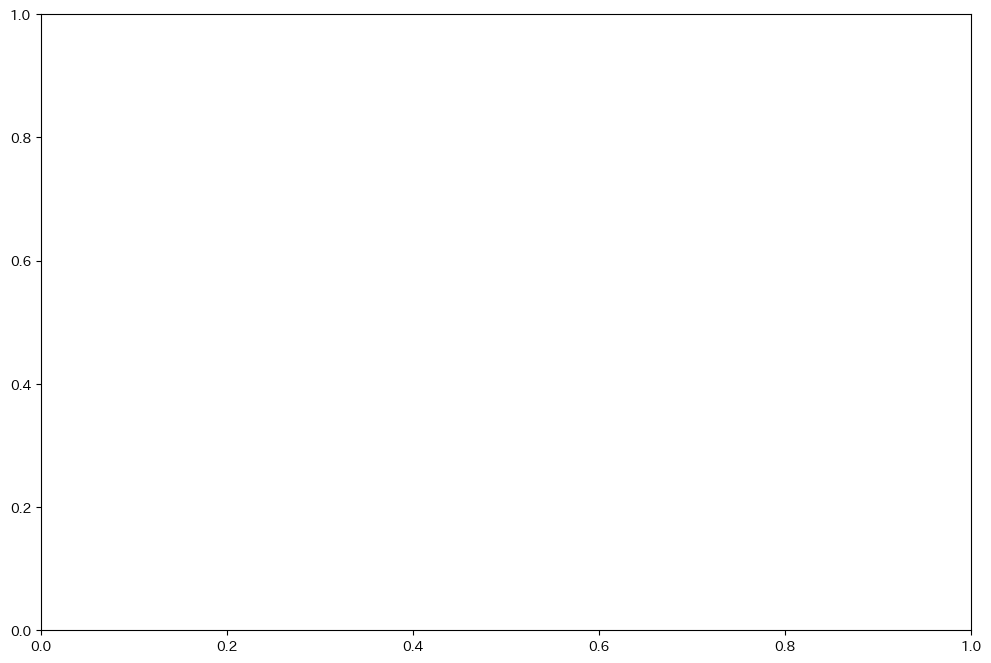

In [ ]:
# 折れ線グラフの描画
plt.figure(figsize=(12, 8))
plt.plot(df_result_b['intercept'], df_result_b['度数'],  linestyle='-')

# グラフの装飾
plt.title('G39シミュレーション')
plt.xlabel('Intercept')
plt.ylabel('度数')

In [ ]:
df_peak=df_result_b[df_result_b["度数"]==df_result_b["度数"].max()]
# df_peak=df_peak.reset_index(drop=True)
# df_peak=df_peak.iloc[212:,]
df_peak=df_peak.reset_index(drop=True)
df_peak

,intercept,度数,start,end


In [ ]:
intercept_list=df_peak["intercept"].tolist()
df_list=[]
for i in range(len(df_peak)):
  df_simulation["(TSP単価-切片)/質量"] = (df_simulation["TSP単価"] - df_peak.loc[i,"intercept"]) / df_simulation["質量"]

  most_frequent_data = df_simulation[(df_simulation["(TSP単価-切片)/質量"] >= df_peak.loc[i,"start"]) & (df_simulation["(TSP単価-切片)/質量"]  < df_peak.loc[i,"end"])]
  most_frequent_data = most_frequent_data#.reset_index(drop=True)
  df_list.append(most_frequent_data)

In [ ]:
df_list[0]

IndexError: list index out of range

In [ ]:
df_result=pd.DataFrame(columns=["peak","切片b","係数a","TSP調整切片b","TSP調整係数a","P-value","T-value","Adj. R-squared",
                                "Mean Absolute Error","Mean Squared Error","R2","intercept_","valuenum_"],index=range(len(df_peak)))

dataframes_list=df_list

for df_count in range(len(dataframes_list)):
  x = dataframes_list[df_count]["質量"]
  df_result.iloc[df_count,0]="peak"+str(df_count+1)
  if len(x)>=2:
    y = dataframes_list[df_count]["TSP単価"]
    x = sm.add_constant(x)

    model = sm.OLS(y, x)
    results = model.fit()

    # print(results.summary())

    # TSP_cost = dataframes_list[df_count]["TSP金額"].sum()
    # D_cost = dataframes_list[df_count]["DC金額"].sum()
    df_result.iloc[df_count,1]=results.params[0]#切片b
    df_result.iloc[df_count,2]=results.params[1]#係数a
    # df_result.iloc[df_count,3]=results.params[0]/(TSP_cost / D_cost)#TSP調整切片
    # df_result.iloc[df_count,4]=results.params[1]/(TSP_cost / D_cost)#TSP調整係数
    df_result.iloc[df_count,5]=results.pvalues["質量"]#P-value
    df_result.iloc[df_count,6]=results.tvalues["質量"]#T-value
    df_result.iloc[df_count,7]=results.rsquared_adj#Adj. R-squared

    # モデルの結果を使用して予測値を計算
    y_pred = results.predict(x)

    # 評価指標を計算
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    df_result.iloc[df_count,8]=mae
    df_result.iloc[df_count,9]=mse
    df_result.iloc[df_count,10]=r2
    df_result.iloc[df_count,11]=df_peak.loc[df_count,"intercept"]
    df_result.iloc[df_count,12]=df_peak.loc[df_count,"度数"]

df_result

,peak,切片b,係数a,TSP調整切片b,TSP調整係数a,P-value,T-value,Adj. R-squared,Mean Absolute Error,Mean Squared Error,R2,intercept_,valuenum_


In [ ]:
df_simulation

,売上月,注番,生産計画番号,見積番号,契約インデント番号,受注番号,受注品名,納品書番号,分類,品番,...,ZD,ZIT,ZK,ZKN,ZKNK,ZKNS,ZS,ZT,TSP単価/質量,(TSP単価-切片)/質量
4,2019/10/31,QT5-5D270D,25958400,R19040908,NaN,3937371,RF05100S8T-CQ-SS-TK,422284,NaN,NaN,...,0,0,0,0,0,0,0,0,9.555888,-0.018587
5,2019/10/31,DT2-24917,26472800,R19080946,NaN,4181221,RF10150F7T-BW1Q-TK,420578,NaN,NaN,...,1,0,0,0,0,0,0,0,1.904757,-5.155931
7,2019/10/31,NRK1901160B,26189900,R19063972,NaN,4048221,B12006S12T-BW1Q-TK,415369,NaN,NaN,...,1,0,0,0,0,0,0,0,1.563404,0.248003
8,2019/10/31,KWUA90275,26051000,R19073562,NaN,4072631,RF212R10T-BW1Q-TK,413388,NaN,NaN,...,1,0,0,0,0,0,0,0,1.542447,-0.142698
9,2019/10/31,BNFAU17055,26436400,R19080681,NaN,4097391,RFP150R7T-BWN-TK,416382,NaN,NaN,...,1,0,0,0,0,0,0,0,1.652368,-3.825239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,2022/3/31,KWFV11255C,45747900,R21111654,NaN,7260151,RF36300F8T-BW1N-TK,731998,NaN,NaN,...,1,0,0,0,0,0,0,0,0.890755,0.354150
4539,2021/12/31,KLF4345,44654000,R21102736,NaN,7077331,RF05100VR-6T-CW1N-TK,706511,NaN,NaN,...,0,0,0,0,0,0,0,0,10.080000,-6.571926
4540,2022/1/31,KLF4377,44934200,R21110749,NaN,7123331,RF05100VR-6T-CW1N-TK,715776,NaN,NaN,...,0,0,0,0,0,0,0,0,7.516800,-9.135126
4552,2021/12/31,TS1 3477D,44724600,R21110913,NaN,6986011,NF30150-10(5)T-CW1Q-TK,705913,NaN,NaN,...,0,0,0,0,0,0,0,0,3.227614,0.787985


In [ ]:
df_list[0]

IndexError: list index out of range

In [ ]:
len(df_simulation)

2734

In [ ]:
#17876.43729289389 0.9489897509183529

df_simulation=df_simulation.reset_index(drop=True)
df_simulation["(TSP単価-切片)/質量"]=(df_simulation["TSP単価"]-df_result.loc[0,"intercept_"])/df_simulation["質量"]
df_simulation=df_simulation.drop(columns=["(TSP単価-切片)/質量"])

# df_list[0]=df_list[0].drop(columns=["(TSP単価-切片)/質量"])

df_dropped=df_simulation.drop(df_list[0].index)
df_not_drop=df_list[0]

df_list=[df_dropped,df_not_drop]

regression_plot_double(df_list[0],df_list[1],"G39_シミュレーション","dropped","not_dropped")

KeyError: 0

In [ ]:
len(df_not_drop)

75

In [ ]:
#todo:
#1.工程の数をカウント
#2.ずれてたところの工程の確認およびずれていない所の工程の確認
#3.G39を分ける&回帰直線

In [ ]:
regression_plot_double(df_G2_new,df_G2,"","G39_new","G39")

NameError: name 'df_G2_new' is not defined

In [ ]:
regression_plot(df_G2_add,"G39_add")

NameError: name 'df_G2_add' is not defined

In [ ]:
# 散布図を描画
# plt.figure(figsize=(10, 6))

# タイプごとにデータをプロット
plt.scatter(df_G3_new["質量"], df_G3_new["TSP単価"], label="G71_new")
plt.scatter(df_G3["質量"], df_G3["TSP単価"], label="G71")

plt.title('')
plt.xlabel('質量')
plt.ylabel('TSP単価')
plt.legend()  # 凡例を追加
plt.show()


NameError: name 'df_G3_new' is not defined

In [ ]:
regression_plot(df_G3_add,"G71_add")

NameError: name 'df_G3_add' is not defined

## plot group

In [ ]:
df_list

[]

In [ ]:
output_directory = "output_images"
os.makedirs(output_directory, exist_ok=True)

#回帰、分布
df_result=pd.DataFrame(columns=["group","切片b","係数a","TSP調整切片b","TSP調整係数a","P-value","T-value","Adj. R-squared",
                                "Mean Absolute Error","Mean Squared Error","R2","データ数"],index=range(len(dataframes_list)))

dataframes_list=dataframes_list
# type_list[0]


for df_count in range(len(dataframes_list)):
  x = dataframes_list[df_count]["質量"]
  df_result.iloc[df_count,0]=dataframes_list_name[df_count]
  y = dataframes_list[df_count]["TSP単価"]
  x = sm.add_constant(x)
  if len(x)>=2:


    model = sm.OLS(y, x)
    results = model.fit()

    # print(results.summary())

    TSP_cost = dataframes_list[df_count]["TSP単価"].sum()
    D_cost = dataframes_list[df_count]["DC金額"].sum()
    df_result.iloc[df_count,1]=results.params[0]#切片b
    df_result.iloc[df_count,2]=results.params[1]#係数a
    df_result.iloc[df_count,3]=results.params[0]/(TSP_cost / D_cost)#TSP調整切片
    df_result.iloc[df_count,4]=results.params[1]/(TSP_cost / D_cost)#TSP調整係数
    df_result.iloc[df_count,5]=results.pvalues["質量"]#P-value
    df_result.iloc[df_count,6]=results.tvalues["質量"]#T-value
    df_result.iloc[df_count,7]=results.rsquared_adj#Adj. R-squared
    df_result.iloc[df_count,7]=len(dataframes_list[df_count])
    # モデルの結果を使用して予測値を計算
    y_pred = results.predict(x)

    # 評価指標を計算
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    df_result.iloc[df_count,8]=mae
    df_result.iloc[df_count,9]=mse
    df_result.iloc[df_count,10]=r2

    plt.scatter(x["質量"], y, color='blue', label='Data')
    plt.plot(x, x * df_result.iloc[df_count,2] + df_result.iloc[df_count,1], color='red')

    plt.title(dataframes_list_name[df_count])
    plt.xlabel('質量')
    # plt.xlim(0,100000)
    plt.ylabel('TSP単価')
    # plt.ylim(0,800000)
    plt.legend()

    #アウトプット
    image_filename = os.path.join(output_directory, f"{dataframes_list_name[df_count]}.png")
    plt.savefig(image_filename)
    plt.close()

    # plt.show()
  else:
    plt.scatter(x, y, color='blue', label='Data')

    plt.title(dataframes_list_name[df_count])
    plt.xlabel('質量')
    # plt.xlim(0,100000)
    plt.ylabel('TSP単価')
    # plt.ylim(0,800000)
    plt.legend()

    #アウトプット
    image_filename = os.path.join(output_directory, f"{dataframes_list_name[df_count]}.png")
    plt.savefig(image_filename)
    plt.close()

# Zipファイルにまとめてダウンロード
shutil.make_archive(output_directory, 'zip', output_directory)
# ダウンロード用のリンクを表示
zip_filename = f"{output_directory}.zip"
files.download(zip_filename)
# 画像保存ディレクトリを削除
shutil.rmtree(output_directory)

# df_result.to_csv('reslut.csv',encoding="cp932",index = False)
# files.download('reslut.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_result.to_csv('reslut.csv',encoding="cp932",index = False)
files.download('reslut.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
len(dataframes_list[16])

IndexError: list index out of range

In [ ]:
len(dataframes_list[18])

IndexError: list index out of range

In [ ]:
#散布図

# output_directory = "output_images"
# os.makedirs(output_directory, exist_ok=True)

dataframes_list=dataframes_list

df_AR = dataframes_list[18][dataframes_list[18]["見積番号"].str.contains("AR")]
df_R = dataframes_list[18][~dataframes_list[18]["見積番号"].str.contains("AR")]

plt.scatter(df_AR["質量"], df_AR["TSP単価"], label='割引あり')
plt.scatter(df_R["質量"], df_R["TSP単価"], label='割引なし')

plt.title(dataframes_list_name[18])
plt.xlabel('質量')
plt.ylabel('TSP単価')
plt.legend()

IndexError: list index out of range

In [ ]:
dataframes_list[16]["見積番号"]

IndexError: list index out of range

In [ ]:
#散布図

# output_directory = "output_images"
# os.makedirs(output_directory, exist_ok=True)

dataframes_list=dataframes_list

df_AR = dataframes_list[16][dataframes_list[16]["見積番号"].str.contains("AR")]
df_R = dataframes_list[16][~dataframes_list[16]["見積番号"].str.contains("AR")]

plt.scatter(df_AR["質量"], df_AR["TSP単価"], label='割引あり')
plt.scatter(df_R["質量"], df_R["TSP単価"], label='割引なし')

plt.title(dataframes_list_name[16])
plt.xlabel('質量')
plt.ylabel('TSP単価')
plt.legend()

IndexError: list index out of range

In [ ]:
dataframes_list[18][dataframes_list[18]["分類"]=="G31"]

IndexError: list index out of range

In [ ]:
#散布図

# output_directory = "output_images"
# os.makedirs(output_directory, exist_ok=True)

dataframes_list=dataframes_list

df_G31 = dataframes_list[18][dataframes_list[18]["分類"]=="G31"]
df_G39 = dataframes_list[18][dataframes_list[18]["分類"]=="G39"]
df_G71 = dataframes_list[18][dataframes_list[18]["分類"]=="G71"]

# plt.scatter(df_G31["質量"], df_G31["TSP単価"], label='G31')
# plt.scatter(df_G39["質量"], df_G39["TSP単価"], label='G39')
plt.scatter(df_G71["質量"], df_G71["TSP単価"], label='G71')

plt.title(dataframes_list_name[18])
plt.xlabel('質量')
plt.xlim(0,450000)
plt.ylabel('TSP単価')
plt.ylim(0,550000)
plt.legend()

IndexError: list index out of range

In [ ]:
print(len(df_G31))
print(len(df_G39))
print(len(df_G71))

NameError: name 'df_G31' is not defined

In [ ]:
df_list=[dataframes_list[16],dataframes_list[18],df_G31,df_G39]
df_list_name=[dataframes_list_name[16],dataframes_list_name[18],dataframes_list_name[18],dataframes_list_name[18]]

IndexError: list index out of range

In [ ]:
for i in range(len(df_list)):
  columns_to_drop = [col for col in df_list[i].columns if df_list[i][col].nunique() == 1]
  df_list[i].drop(columns=columns_to_drop, inplace=True)

In [ ]:
df_list[3]

# **AI trial**

In [ ]:
df_list=[dataframes_list[16],dataframes_list[18],df_G31,df_G39]
df_list_name=[dataframes_list_name[16],dataframes_list_name[18],dataframes_list_name[18]+"G31",dataframes_list_name[18]+"G39"]

IndexError: list index out of range

In [ ]:
# df_list[0].to_csv('df16.csv',encoding="cp932",index = False)
# files.download('df16.csv')

In [ ]:
dataframes_list_name[18]

In [ ]:
for i in range(len(df_list)):
  df_list[i]=df_list[i].reset_index(drop=True)
  for j in range(len(df_list[i])):
    if "AR" in df_list[i].loc[j, "見積番号"]:
      df_list[i].loc[j,"割引"]=1
    else:
      df_list[i].loc[j,"割引"]=0
  df_list[i]["割引"]=df_list[i]["割引"].astype(int)

In [ ]:
df1=df_list[0].loc[:, ["TSP単価","質量","材質"] + df_list[0].iloc[:,32:].columns.tolist()].reset_index(drop=True)
df2=df_list[1].loc[:, ["TSP単価","質量","材質","分類"] + df_list[1].iloc[:,37:].columns.tolist()].reset_index(drop=True)
df2_1=df_list[2].loc[:, ["TSP単価","質量","材質"] + df_list[2].iloc[:,36:].columns.tolist()].reset_index(drop=True)
df2_2=df_list[3].loc[:, ["TSP単価","質量","材質"] + df_list[3].iloc[:,35:].columns.tolist()].reset_index(drop=True)

In [ ]:
df1 = pd.get_dummies(df1, columns=df1.iloc[:,2:].columns.tolist(), drop_first=True)
df2 = pd.get_dummies(df2, columns=df2.iloc[:,2:].columns.tolist(), drop_first=True)
df2_1 = pd.get_dummies(df2_1, columns=df2_1.iloc[:,2:].columns.tolist(), drop_first=True)
df2_2 = pd.get_dummies(df2_2, columns=df2_2.iloc[:,2:].columns.tolist(), drop_first=True)

In [ ]:
df_list_AI=[df1,df2,df2_1,df2_2]

In [ ]:
for i in range(len(df_list_AI)):
# 説明変数に定数項を追加
  X = sm.add_constant(df_list_AI[i].iloc[:,1:])
  Y = df_list_AI[i].iloc[:,0]
  # モデルの適合
  model = sm.OLS(Y, X).fit()

  # 回帰係数の表示
  print(model.summary())
  df_list_AI[i]["predicted"]=model.predict(sm.add_constant(df_list_AI[i].iloc[:, 1:]))

  plt.scatter(df_list_AI[i]["predicted"], df_list_AI[i]["TSP単価"])
  plt.title(df_list_name[i])
  plt.xlabel('TSP単価予測')
  plt.xlim(0,200000)#180000,200000
  plt.ylabel('TSP単価実績')
  plt.ylim(0,200000)#
  # plt.legend()  # Add legend to distinguish bins

  plt.show()


In [ ]:
y = df_list_AI[0]["TSP単価"]
x = sm.add_constant(df_list_AI[0]["predicted"])

model = sm.OLS(y, x)
results = model.fit()

results.params[0]#切片b
results.params[1]#係数a
y_pred = results.predict(x)
r2 = r2_score(y, y_pred)
print(results.params[0],results.params[1],r2)
print(results.pvalues["predicted"],results.tvalues["predicted"])#P-valueT-value

plt.scatter(x["predicted"], y, color='blue', label='Data')
plt.plot(x, x * results.params[1] + results.params[0], color='red')

plt.title(df_list_name[0])
plt.xlabel('predicted')
plt.ylabel('TSP単価')
plt.legend()

In [ ]:
y = df_list_AI[1]["TSP単価"]
x = sm.add_constant(df_list_AI[1]["predicted"])

model = sm.OLS(y, x)
results = model.fit()

results.params[0]#切片b
results.params[1]#係数a
y_pred = results.predict(x)
r2 = r2_score(y, y_pred)
print(results.params[0],results.params[1],r2)
print(results.pvalues["predicted"],results.tvalues["predicted"])#P-valueT-value

plt.scatter(x["predicted"], y, color='blue', label='Data')
plt.plot(x, x * results.params[1] + results.params[0], color='red')

plt.title(df_list_name[1])
plt.xlabel('predicted')
plt.ylabel('TSP単価')
plt.legend()

NameError: name 'df_list_AI' is not defined

In [ ]:
y = df_list_AI[2]["TSP単価"]
x = sm.add_constant(df_list_AI[2]["predicted"])

model = sm.OLS(y, x)
results = model.fit()

results.params[0]#切片b
results.params[1]#係数a
y_pred = results.predict(x)
r2 = r2_score(y, y_pred)
print(results.params[0],results.params[1],r2)
print(results.pvalues["predicted"],results.tvalues["predicted"])#P-valueT-value

plt.scatter(x["predicted"], y, color='blue', label='Data')
plt.plot(x, x * results.params[1] + results.params[0], color='red')

plt.title(df_list_name[2])
plt.xlabel('predicted')
plt.ylabel('TSP単価')
plt.legend()

In [ ]:
y = df_list_AI[3]["TSP単価"]
x = sm.add_constant(df_list_AI[3]["predicted"])

model = sm.OLS(y, x)
results = model.fit()

results.params[0]#切片b
results.params[1]#係数a
y_pred = results.predict(x)
r2 = r2_score(y, y_pred)
print(results.params[0],results.params[1],r2)
print(results.pvalues["predicted"],results.tvalues["predicted"])#P-valueT-value

plt.scatter(x["predicted"], y, color='blue', label='Data')
plt.plot(x, x * results.params[1] + results.params[0], color='red')

plt.title(df_list_name[3])
plt.xlabel('predicted')
plt.ylabel('TSP単価')
plt.legend()

交差検定

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import statsmodels.api as sm

# データの読み込みや生成
df = df_list_AI[0]

# 説明変数と目的変数の設定
X = sm.add_constant(df.iloc[:, 1:])
Y = df.iloc[:, 0]

# k分割交差検定の準備
k = 5  # 例として5分割
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 各分割でのモデルの評価
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    model = sm.OLS(Y_train, X_train).fit()

    predictions = model.predict(X_test)
    predictions2 = model.predict(X_train)

    mse = ((Y_test - predictions) ** 2).mean()
    mse_scores.append(mse)
    # print(model.summary())
    # print(predictions)
    print(model.summary())
    comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
    comparison2 = pd.DataFrame({'Actual': Y_train, 'Predicted': predictions2})

    plt.scatter(predictions, Y_test,label="test")
    plt.scatter(predictions2, Y_train,label="train")
    # Customize the plot
    # plt.title('散布図 費用',fontsize=16)

    y = pd.concat([predictions, predictions2])
    x = sm.add_constant(pd.concat([Y_test, Y_train]))

    model = sm.OLS(y, x)
    results = model.fit()

    results.params[0]#切片b
    results.params[1]#係数a
    y_pred = results.predict(x)
    r2 = r2_score(y, y_pred)
    print(r2)

    plt.title("")
    plt.xlabel('予測工数')
    plt.ylabel('工数実績')
    plt.legend()

    plt.show()

    df_sigma = pd.concat([comparison,comparison2])
    df_sigma['Difference'] = df_sigma['Actual'] - df_sigma['Predicted']
    # 差の平均と標準偏差を計算
    mean_difference = df_sigma['Difference'].mean()
    std_dev_difference = df_sigma['Difference'].std()
    # 差が2σの範囲に入るデータポイントの割合を計算
    within_2_sigma = ((df_sigma['Difference'] >= mean_difference - 2 * std_dev_difference) &
                      (df_sigma['Difference'] <= mean_difference + 2 * std_dev_difference)).mean()
    print("2σの範囲に入るデータポイントの割合:", within_2_sigma)
    df_sigma = comparison
    df_sigma['Difference'] = df_sigma['Actual'] - df_sigma['Predicted']
    # 差の平均と標準偏差を計算
    mean_difference = df_sigma['Difference'].mean()
    std_dev_difference = df_sigma['Difference'].std()
    print(std_dev_difference)
    # 差が2σの範囲に入るデータポイントの割合を計算
    within_2_sigma = ((df_sigma['Difference'] >= mean_difference - 2 * std_dev_difference) &
                      (df_sigma['Difference'] <= mean_difference + 2 * std_dev_difference)).mean()
    print("2σの範囲に入るデータポイントの割合_comparison:", within_2_sigma)

    #元のTSP単価に割って、%の偏差
    #標準偏差/TSP単価実績
# 各分割のMSEを表示
for i, mse in enumerate(mse_scores):
    print(f"Fold {i+1}: MSE = {mse}")

# 平均MSEを表示
average_mse = np.mean(mse_scores)
print(f"Average MSE: {average_mse}")

NameError: name 'df_list_AI' is not defined

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import statsmodels.api as sm

# データの読み込みや生成
df = df_list_AI[1]

# 説明変数と目的変数の設定
X = sm.add_constant(df.iloc[:, 1:])
Y = df.iloc[:, 0]

# k分割交差検定の準備
k = 5  # 例として5分割
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 各分割でのモデルの評価
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    model = sm.OLS(Y_train, X_train).fit()

    predictions = model.predict(X_test)
    predictions2 = model.predict(X_train)

    mse = ((Y_test - predictions) ** 2).mean()
    mse_scores.append(mse)
    # print(model.summary())
    # print(predictions)
    print(model.summary())
    comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
    comparison2 = pd.DataFrame({'Actual': Y_train, 'Predicted': predictions2})

    plt.scatter(predictions, Y_test,label="test")
    plt.scatter(predictions2, Y_train,label="train")
    # Customize the plot
    # plt.title('散布図 費用',fontsize=16)

    y = pd.concat([predictions, predictions2])
    x = sm.add_constant(pd.concat([Y_test, Y_train]))

    model = sm.OLS(y, x)
    results = model.fit()

    results.params[0]#切片b
    results.params[1]#係数a
    y_pred = results.predict(x)
    r2 = r2_score(y, y_pred)
    print(r2)

    plt.title("")
    plt.xlabel('予測工数')
    plt.ylabel('工数実績')
    plt.legend()

    plt.show()

    df_sigma = pd.concat([comparison,comparison2])
    df_sigma['Difference'] = df_sigma['Actual'] - df_sigma['Predicted']
    # 差の平均と標準偏差を計算
    mean_difference = df_sigma['Difference'].mean()
    std_dev_difference = df_sigma['Difference'].std()
    # 差が2σの範囲に入るデータポイントの割合を計算
    within_2_sigma = ((df_sigma['Difference'] >= mean_difference - 2 * std_dev_difference) &
                      (df_sigma['Difference'] <= mean_difference + 2 * std_dev_difference)).mean()
    print("2σの範囲に入るデータポイントの割合:", within_2_sigma)
    df_sigma = comparison
    df_sigma['Difference'] = df_sigma['Actual'] - df_sigma['Predicted']
    # 差の平均と標準偏差を計算
    mean_difference = df_sigma['Difference'].mean()
    std_dev_difference = df_sigma['Difference'].std()
    # 差が2σの範囲に入るデータポイントの割合を計算
    within_2_sigma = ((df_sigma['Difference'] >= mean_difference - 2 * std_dev_difference) &
                      (df_sigma['Difference'] <= mean_difference + 2 * std_dev_difference)).mean()
    print("2σの範囲に入るデータポイントの割合_comparison:", within_2_sigma)
# 各分割のMSEを表示
for i, mse in enumerate(mse_scores):
    print(f"Fold {i+1}: MSE = {mse}")

# 平均MSEを表示
average_mse = np.mean(mse_scores)
print(f"Average MSE: {average_mse}")

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import statsmodels.api as sm

# データの読み込みや生成
df = df_list_AI[2]

# 説明変数と目的変数の設定
X = sm.add_constant(df.iloc[:, 1:])
Y = df.iloc[:, 0]

# k分割交差検定の準備
k = 5  # 例として5分割
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 各分割でのモデルの評価
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    model = sm.OLS(Y_train, X_train).fit()

    predictions = model.predict(X_test)
    predictions2 = model.predict(X_train)

    mse = ((Y_test - predictions) ** 2).mean()
    mse_scores.append(mse)
    # print(model.summary())
    # print(predictions)
    print(model.summary())
    comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
    comparison2 = pd.DataFrame({'Actual': Y_train, 'Predicted': predictions2})

    plt.scatter(predictions, Y_test,label="test")
    plt.scatter(predictions2, Y_train,label="train")
    # Customize the plot
    # plt.title('散布図 費用',fontsize=16)

    y = pd.concat([predictions, predictions2])
    x = sm.add_constant(pd.concat([Y_test, Y_train]))

    model = sm.OLS(y, x)
    results = model.fit()

    results.params[0]#切片b
    results.params[1]#係数a
    y_pred = results.predict(x)
    r2 = r2_score(y, y_pred)
    print(r2)

    plt.title("")
    plt.xlabel('予測工数')
    plt.ylabel('工数実績')
    plt.legend()

    plt.show()

    df_sigma = pd.concat([comparison,comparison2])
    df_sigma['Difference'] = df_sigma['Actual'] - df_sigma['Predicted']
    # 差の平均と標準偏差を計算
    mean_difference = df_sigma['Difference'].mean()
    std_dev_difference = df_sigma['Difference'].std()
    # 差が2σの範囲に入るデータポイントの割合を計算
    within_2_sigma = ((df_sigma['Difference'] >= mean_difference - 2 * std_dev_difference) &
                      (df_sigma['Difference'] <= mean_difference + 2 * std_dev_difference)).mean()
    print("2σの範囲に入るデータポイントの割合:", within_2_sigma)
    df_sigma = comparison
    df_sigma['Difference'] = df_sigma['Actual'] - df_sigma['Predicted']
    # 差の平均と標準偏差を計算
    mean_difference = df_sigma['Difference'].mean()
    std_dev_difference = df_sigma['Difference'].std()
    # 差が2σの範囲に入るデータポイントの割合を計算
    within_2_sigma = ((df_sigma['Difference'] >= mean_difference - 2 * std_dev_difference) &
                      (df_sigma['Difference'] <= mean_difference + 2 * std_dev_difference)).mean()
    print("2σの範囲に入るデータポイントの割合_comparison:", within_2_sigma)
# 各分割のMSEを表示
for i, mse in enumerate(mse_scores):
    print(f"Fold {i+1}: MSE = {mse}")

# 平均MSEを表示
average_mse = np.mean(mse_scores)
print(f"Average MSE: {average_mse}")

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import statsmodels.api as sm

# データの読み込みや生成
df = df_list_AI[3]

# 説明変数と目的変数の設定
X = sm.add_constant(df.iloc[:, 1:])
Y = df.iloc[:, 0]

# k分割交差検定の準備
k = 5  # 例として5分割
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# 各分割でのモデルの評価
mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    model = sm.OLS(Y_train, X_train).fit()

    predictions = model.predict(X_test)
    predictions2 = model.predict(X_train)

    mse = ((Y_test - predictions) ** 2).mean()
    mse_scores.append(mse)
    # print(model.summary())
    # print(predictions)
    print(model.summary())
    comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})
    comparison2 = pd.DataFrame({'Actual': Y_train, 'Predicted': predictions2})

    plt.scatter(predictions, Y_test,label="test")
    plt.scatter(predictions2, Y_train,label="train")
    # Customize the plot
    # plt.title('散布図 費用',fontsize=16)

    y = pd.concat([predictions, predictions2])
    x = sm.add_constant(pd.concat([Y_test, Y_train]))

    model = sm.OLS(y, x)
    results = model.fit()

    results.params[0]#切片b
    results.params[1]#係数a
    y_pred = results.predict(x)
    r2 = r2_score(y, y_pred)
    print(r2)

    plt.title("")
    plt.xlabel('予測工数')
    plt.ylabel('工数実績')
    plt.legend()

    plt.show()

    df_sigma = pd.concat([comparison,comparison2])
    df_sigma['Difference'] = df_sigma['Actual'] - df_sigma['Predicted']
    # 差の平均と標準偏差を計算
    mean_difference = df_sigma['Difference'].mean()
    std_dev_difference = df_sigma['Difference'].std()
    # 差が2σの範囲に入るデータポイントの割合を計算
    within_2_sigma = ((df_sigma['Difference'] >= mean_difference - 2 * std_dev_difference) &
                      (df_sigma['Difference'] <= mean_difference + 2 * std_dev_difference)).mean()
    print("2σの範囲に入るデータポイントの割合:", within_2_sigma)
    df_sigma = comparison
    df_sigma['Difference'] = df_sigma['Actual'] - df_sigma['Predicted']
    # 差の平均と標準偏差を計算
    mean_difference = df_sigma['Difference'].mean()
    std_dev_difference = df_sigma['Difference'].std()
    # 差が2σの範囲に入るデータポイントの割合を計算
    within_2_sigma = ((df_sigma['Difference'] >= mean_difference - 2 * std_dev_difference) &
                      (df_sigma['Difference'] <= mean_difference + 2 * std_dev_difference)).mean()
    print("2σの範囲に入るデータポイントの割合_comparison:", within_2_sigma)
# 各分割のMSEを表示
for i, mse in enumerate(mse_scores):
    print(f"Fold {i+1}: MSE = {mse}")

# 平均MSEを表示
average_mse = np.mean(mse_scores)
print(f"Average MSE: {average_mse}")